## NYC Bike Share Project

Using citi bike data in New York City to predict demand

### Data Visualization

In [2]:
import geopandas
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, MultiPolygon
import numpy as np
import seaborn as sns
from geodatasets import get_path

In [3]:
#read shape data of the five NYC boroughs
path_to_data = get_path('nybb')
gdf = geopandas.read_file(path_to_data)
gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [4]:
gdf = gdf.set_index('BoroName')
gdf

,BoroCode,Shape_Leng,Shape_Area,geometry
BoroName,,,,
Staten Island,5,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
Queens,4,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
Brooklyn,3,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
Manhattan,1,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
Bronx,2,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


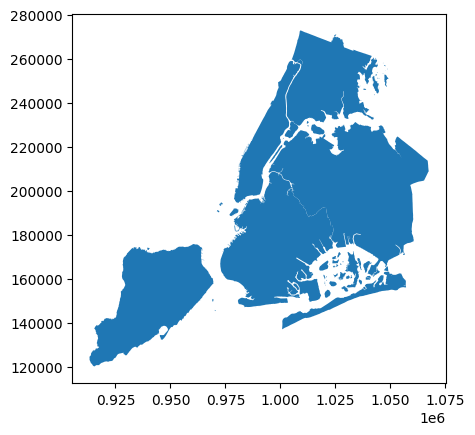

In [5]:
gdf.plot()
plt.show()

In [6]:
gdf.bounds

,minx,miny,maxx,maxy
BoroName,,,,
Staten Island,9.131751e+05,120121.881254,9.705701e+05,175708.962036
Queens,9.946086e+05,136681.776184,1.067383e+06,231157.996399
Brooklyn,9.726197e+05,146772.031799,1.030453e+06,208564.104004
Manhattan,9.710135e+05,188082.322388,1.010066e+06,259547.770386
Bronx,1.002623e+06,225426.884583,1.049167e+06,272844.293640


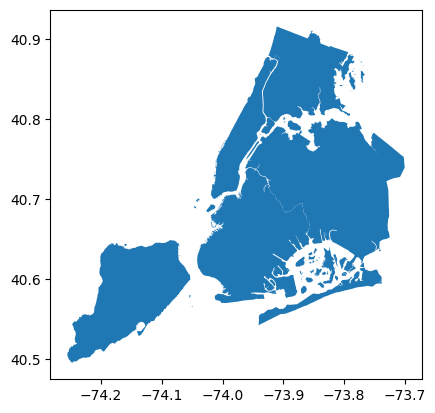

In [8]:
gdf = gdf.to_crs(4326) #change coordinate reference system to latitude and longitude
gdf.plot()
plt.show()

In [25]:
import pandas as pd

In [31]:
city_bike_data = pd.read_csv('201306-citibike-tripdata.csv')

In [32]:
city_bike_data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,695,2013-06-01 00:00:01,2013-06-01 00:11:36,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,19678,Subscriber,1983.0,1
1,693,2013-06-01 00:00:08,2013-06-01 00:11:41,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,16649,Subscriber,1984.0,1
2,2059,2013-06-01 00:00:44,2013-06-01 00:35:03,406,Hicks St & Montague St,40.695128,-73.995951,406.0,Hicks St & Montague St,40.695128,-73.995951,19599,Customer,NaN,0
3,123,2013-06-01 00:01:04,2013-06-01 00:03:07,475,E 15 St & Irving Pl,40.735243,-73.987586,262.0,Washington Park,40.691782,-73.973730,16352,Subscriber,1960.0,1
4,1521,2013-06-01 00:01:22,2013-06-01 00:26:43,2008,Little West St & 1 Pl,40.705693,-74.016777,310.0,State St & Smith St,40.689269,-73.989129,15567,Subscriber,1983.0,1


In [33]:
city_bike_data.count()

tripduration               577703
starttime                  577703
stoptime                   577703
start station id           577703
start station name         577703
start station latitude     577703
start station longitude    577703
end station id             559644
end station name           559644
end station latitude       559644
end station longitude      559644
bikeid                     577703
usertype                   577703
birth year                 337382
gender                     577703
dtype: int64

In [35]:
print(city_bike_data['start station latitude'].min(),city_bike_data['start station latitude'].max())

40.6466068 40.771522


In [36]:
print(city_bike_data['start station longitude'].min(),city_bike_data['start station longitude'].max())

-74.01713445 -73.9500479759


Data appears to be restricted to manhattan based off of the start and stop latitudes and longitudes.

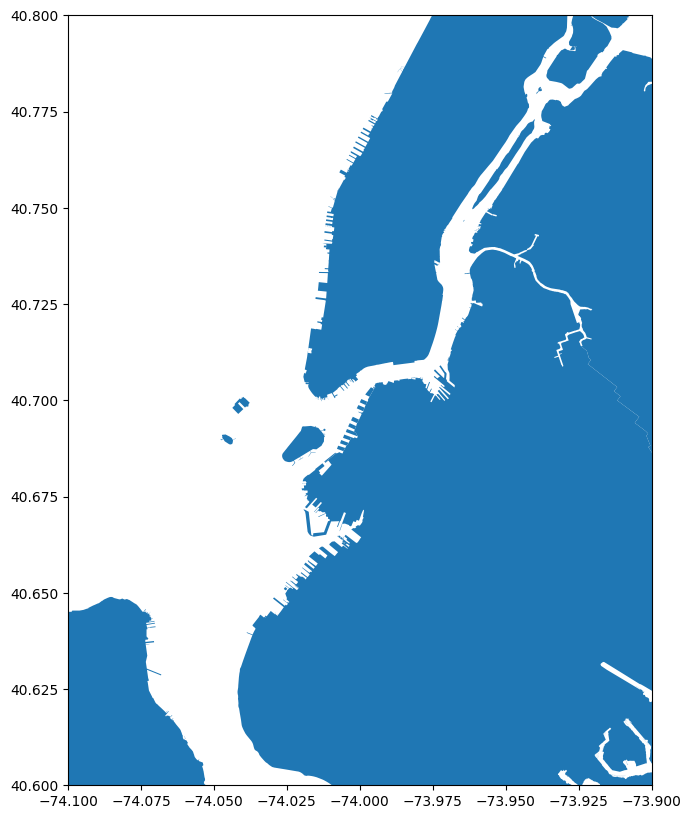

In [46]:
fig, ax = plt.subplots(figsize = (10,10))
gdf.plot(ax = ax)
ax.set_xlim(-74.1,-73.9)
ax.set_ylim(40.6,40.8)
plt.show()

In [51]:
gdf[gdf.loc['Manhattan']]

KeyError: "None of [Index([                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  1,\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             359299.096471,\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             636471539.774,\n       MULTIPOLYGON (((-74.01092841268031 40.684491472543144, -74.0119325991106 40.68388774915516, -74.01217596614636 40.68409518562868, -74.0087859013092 40.686146602299075, -74.00869559889547 40.686193318012826, -74.00859803329713 40.68625256408517, -74.00835446532174 40.68640020025089, -74.0081641459391 40.68617471716166, -74.00842516151928 40.686015532445325, -74.0085129425734 40.68596254858386, -74.00860072436832 40.685909564654985, -74.01092841268031 40.684491472543144)), ((-74.00500373315074 40.687605985401035, -74.00562986330395 40.68678420554125, -74.00783293766683 40.6873850551629, -74.00742012154097 40.6882062904361, -74.00500373315074 40.687605985401035)), ((-74.00382038919733 40.68892964469949, -74.00459270521772 40.68821522298678, -74.0067843843981 40.68882687995844, -74.00636461225267 40.68966966863716, -74.00382038919733 40.68892964469949)), ((-74.00297565436566 40.69042657592089, -74.00340921624519 40.68961326065771, -74.00575900670344 40.690236400016374, -74.00534209624915 40.69109160297805, -74.00297565436566 40.69042657592089)), ((-74.0438776157395 40.69018767637684, -74.0435059601254 40.68968735963655, -74.04273533893009 40.6900501914204, -74.04278433313979 40.6901209766916, -74.04270428426766 40.6901552046445, -74.04255372037308 40.68996275928979, -74.04263929305132 40.6899281759112, -74.0426938081918 40.68999725910737, -74.04346752310265 40.68963699010366, -74.04351637245855 40.689191033742546, -74.04364078627414 40.688766559570354, -74.04397458556184 40.68858240705612, -74.04438521711256 40.68851617840313, -74.04478399106388 40.688595660115816, -74.04627538937642 40.689327425897204, -74.04680284898575 40.689953256266215, -74.04747651462345 40.689611369998474, -74.04772962697038 40.68991531846649, -74.04758571924786 40.68998250682634, -74.04743126057485 40.689803890471374, -74.04689205500591 40.69005909832281, -74.04720029366251 40.69042481562394, -74.04711050632582 40.690470412850544, -74.04711581976335 40.690655806118656, -74.04718321412064 40.690747355049275, -74.04719492447708 40.690763263848645, -74.04721324519817 40.69079048733767, -74.04722568393224 40.690819572483434, -74.04723192808555 40.69084978837492, -74.04723182073359 40.69088037568444, -74.04722536456546 40.69091056574953, -74.04721272181716 40.690939599889504, -74.04719421019539 40.690966748471254, -74.04717029489426 40.69099132924525, -74.04714091043213 40.691010516674595, -74.04710814040003 40.69102620865719, -74.04707269644432 40.691038064418976, -74.0470353482809 40.6910458264949, -74.04699690697936 40.69104932632006, -74.04617166999421 40.69109798148681, -74.04614707208665 40.691122646033364, -74.04609551063218 40.69112006338475, -74.04604442453585 40.691114152328545, -74.04599418395532 40.69110495569492, -74.04592592766836 40.69108260358448, -74.04586027427413 40.691056116583574, -74.04460616482923 40.69057348495099, -74.0438776157395 40.69018767637684)), ((-74.00132562399813 40.69146310033226, -74.00069905841879 40.69061185791665, -74.00479415294552 40.69176162037459, -74.00440941259976 40.692528800389496, -74.00196938526081 40.691843208317685, -74.00132562399813 40.69146310033226)), ((-74.0167475609607 40.693343368217775, -74.01540359141647 40.69306649730931, -74.01535466389981 40.69322485341738, -74.01540916665948 40.693238673173276, -74.01538919768244 40.6932981346657, -74.01517482202624 40.69325668033564, -74.01518934209341 40.69319860354316, -74.01525474322263 40.69320689118409, -74.01530915985035 40.69304704289174, -74.01525951035647 40.693036814232066, -74.01512637564146 40.69317743151614, -74.01516538149541 40.693197288094986, -74.01512878294328 40.69324379583458, -74.01504789862958 40.69319974589811, -74.01494315033483 40.693141021931005, -74.01498417980069 40.69310651818327, -74.01503973872529 40.69313829976104, -74.01515612159491 40.69301551489183, -74.01422123084906 40.69282290634422, -74.01347809785598 40.69213847009194, -74.0134718371012 40.692131853030446, -74.01346424244922 40.69212610169879, -74.01345551724054 40.69212137008385, -74.01344589508521 40.69211778487052, -74.0134356336081 40.69211544204969, -74.0134250075512 40.69211440434835, -74.01341430141785 40.692114699550025, -74.01340380185523 40.692116319751, -74.01250258675188 40.692303580965714, -74.01252289827046 40.69233903241489, -74.01240888894324 40.692493527480295, -74.01240098903898 40.69250535824527, -74.01239161593858 40.692516548611785, -74.01237260144906 40.6925337723697, -74.0123501258611 40.69254838267889, -74.0123248006758 40.692559982030346, -74.01229731492555 40.69256825483529, -74.0121181561438 40.692606365717694, -74.01211726765075 40.69260655461462, -74.01210359185659 40.692609464999535, -74.0120436917983 40.69260181662171, -74.0118492003856 40.69251819825323, -74.01184889307429 40.69251787328169, -74.01181185647236 40.69247933506454, -74.0117988123054 40.69244459473716, -74.01178374501724 40.69240476697557, -74.01175097032225 40.6923181135931, -74.01175033086638 40.69231641141243, -74.01175034252037 40.69231634875596, -74.01175749051254 40.692263739561724, -74.01183446726395 40.69215905602329, -74.01183833471082 40.69215379727518, -74.01183900825667 40.692152877647935, -74.01186468706692 40.69211796262611, -74.01190309722561 40.69209058350805, -74.01191118868006 40.6920888440714, -74.0119689325871 40.6920764745574, -74.01213630770874 40.692040643855755, -74.01213732516261 40.69204041808902, -74.01214293316178 40.69203921967644, -74.01214885984388 40.69203794936068, -74.0122011411637 40.692044905096274, -74.01232430689473 40.69209118800516, -74.01235951844643 40.69210777028033, -74.01239001029667 40.69212308503796, -74.01240858613579 40.69213424052967, -74.01242927059356 40.69215423889253, -74.01246140165127 40.69221262441604, -74.01253982481629 40.69219697386336, -74.01255899015494 40.692193153823816, -74.01282826026981 40.69213943594431, -74.01322338051702 40.692059190656984, -74.01324195439302 40.692055416139034, -74.01324784563474 40.69205421764, -74.01328515792896 40.69204736900629, -74.01330314021662 40.69204264868697, -74.01331123156663 40.69203949572309, -74.01331804474167 40.69203590247699, -74.01332367657388 40.69203182253258, -74.01332606546663 40.692029579231466, -74.01332818317647 40.69202720143718, -74.01333064247271 40.69202372579615, -74.01333264149608 40.69201997010254, -74.01333505303282 40.69201209955277, -74.01333539494105 40.69200820902404, -74.0133351582511 40.69200446297095, -74.01333432977003 40.69200092455292, -74.01333293283658 40.69199763698928, -74.01332546520501 40.69198520246177, -74.01331621036003 40.69197249741629, -74.01327481959483 40.691935346795375, -74.01326620460148 40.69192718049224, -74.0132647611729 40.691925802745615, -74.01325528699358 40.69191681749916, -74.01318656537065 40.69195792941799, -74.01291228751684 40.69169073083398, -74.01292800393824 40.69167610442832, -74.01285987108902 40.691602990865796, -74.01289688430353 40.69157689550048, -74.01289518355665 40.69157528340713, -74.0128751983543 40.69155633025193, -74.01286547266726 40.69154710124868, -74.0128159518588 40.691500126723625, -74.01275436836775 40.69147646763613, -74.01265071760992 40.69139945918063, -74.01262511694804 40.691408737147945, -74.01260856859405 40.69136410462994, -74.01258434696003 40.69137064972974, -74.01258434935939 40.69138336238074, -74.0125450515152 40.69139159327309, -74.01255488211353 40.69142300124807, -74.01253228594769 40.691428986617915, -74.01251950752713 40.69139683145439, -74.01203417616576 40.69150307668587, -74.01201746659373 40.69145820805411, -74.01259753152567 40.69133433554468, -74.01252783209975 40.69114633733814, -74.01218355071057 40.69113621594082, -74.01218682075256 40.69107802427082, -74.01182575354973 40.69106481621634, -74.01182847957557 40.69101135776457, -74.01219500090085 40.69102884756899, -74.01219552958612 40.69102057366805, -74.01221017410677 40.69079169680143, -74.01208414396388 40.690780622300714, -74.01208232424358 40.69075988192469, -74.01205325498766 40.69073914390324, -74.01199875966581 40.69075021210498, -74.0119878628144 40.690772336076634, -74.01197151318823 40.69077095550969, -74.01198603276984 40.69069766811448, -74.01199329167372 40.6906506537973, -74.01198056761248 40.69060640727196, -74.01204959850618 40.690610548546836, -74.01205685428488 40.69055385448973, -74.01209863431934 40.69054693658234, -74.01210771369429 40.69052895959763, -74.01212769712372 40.69052895749344, -74.01214221600917 40.69045428780739, -74.012231311469 40.69046133077529, -74.01230688304491 40.68928018293774, -74.0127032092405 40.688790539817184, -74.01275451203065 40.68872055623809, -74.01316926402762 40.68815477120335, -74.0132648670562 40.68812243009685, -74.01333019977949 40.68809316604816, -74.01341858951315 40.68805219831801, -74.01347243916628 40.68801205796631, -74.0148809797501 40.68725457048872, -74.01604730539523 40.68733800629791, -74.01609789228397 40.68731459228834, -74.01651927578648 40.687119551147646, -74.01698146864119 40.68690738448168, -74.0170498660923 40.68687598791919, -74.0167158267198 40.686445593709784, -74.01664664084757 40.68641634723353, -74.0151516167432 40.68652480204195, -74.01514391021995 40.68643703404318, -74.01661971233223 40.68631980484112, -74.01667351529993 40.68630516855368, -74.01727291238652 40.68569069768133, -74.01753032434097 40.685362987932635, -74.0176225750659 40.68540978372089, -74.01736132076934 40.685746272027174, -74.01678113957146 40.68634903791936, -74.01677346463232 40.6863987754499, -74.01712099101073 40.686843337636745, -74.02015656652381 40.68544978729525, -74.02054367293081 40.68527206792615, -74.02020686710532 40.68483383307725, -74.02016278941753 40.684833017411044, -74.01945957389425 40.6851549579226, -74.01939842391928 40.68508740404738, -74.02095255010296 40.68438443164739, -74.021008778993 40.68445353908451, -74.02028899992278 40.68478444841873, -74.02027819846491 40.684809135174675, -74.02061267235811 40.68524039019823, -74.02106226329637 40.68504102470058, -74.02183909525702 40.684696540547094, -74.02224078898536 40.68451840810208, -74.02233552903563 40.68447639360439, -74.02239732580516 40.68444898932659, -74.02259359581042 40.684359695950114, -74.02213250186881 40.68376767238542, -74.02305574749595 40.68291694544532, -74.02319462834663 40.683000498062334, -74.0223682355767 40.68377991679415, -74.0227589902996 40.68428444833245, -74.02301704456366 40.684167044269294, -74.02313509710332 40.684124156652885, -74.0232567831563 40.684085414321, -74.02339776854572 40.68404096982185, -74.02341479373861 40.684035603130674, -74.02354160370125 40.68400298359273, -74.02378267336752 40.683968915869215, -74.0239473535509 40.68394921598682, -74.02421537269676 40.683944243464516, -74.02443173023707 40.68395403059466, -74.02464809241233 40.68397856661324, -74.02484185637276 40.68401294114259, -74.02499306057527 40.684052112535795, -74.02521646935898 40.68409398087151, -74.02546836768583 40.684152922578484, -74.02567183758212 40.684236456205234, -74.02588501823529 40.684376526840225, -74.02604653184775 40.68451415115511, -74.02612578192957 40.68459351143994, -74.02623238290333 40.68470026105397, -74.02633404242411 40.684801697724346, -74.0264406662461 40.68495162452013, -74.02651822912097 40.685108933148655, -74.02657640943092 40.68524166303828, -74.02660875559283 40.68537685801008, -74.02662819083865 40.68552680474983, -74.0266217834019 40.685654634111614, -74.02660890959801 40.68576279806968, -74.02657021545328 40.68590538468152, -74.02649600144055 40.68605535251659, -74.02642577243203 40.68617533982978, -74.02637621613823 40.68623131880024, -74.02631270370256 40.68629511626824, -74.02622025384308 40.68638456809369, -74.02617488097594 40.68642907222921, -74.02606584987552 40.68653056622804, -74.0257838705966 40.686794706417466, -74.02557971866322 40.686997456600125, -74.02538699246998 40.687166904282435, -74.02518794246524 40.687356227481914, -74.0251542677043 40.68738749447709, -74.02498452676967 40.6875450999612, -74.02495996488949 40.6875682036496, -74.02474903514573 40.687787029412405, -74.02456390211564 40.68796465845397, -74.02445685221294 40.68806055942211, -74.02433922808906 40.68816581005829, -74.0243230857736 40.68818025702215, -74.02419511436455 40.688294765590086, -74.02411997621054 40.6883682435104, -74.02397192277753 40.68851302540452, -74.023969248803 40.688515550098195, -74.02381144169387 40.688664515802905, -74.02367436482537 40.68879230976013, -74.02353644452158 40.68891577045858, -74.02339034096943 40.68904924761359, -74.02313394750364 40.6892954542648, -74.02268465939613 40.68971747085402, -74.02256537904927 40.68982575842622, -74.02243973951957 40.6899398194396, -74.02225114057582 40.69012221857831, -74.02189942193758 40.69044347236076, -74.02149639768453 40.69082705033496, -74.02147636060462 40.690846622621386, -74.02121292061632 40.6911039656511, -74.02097996202463 40.69132439086234, -74.02071969701758 40.69158098499567, -74.02071619151157 40.69158423214072, -74.02046388462902 40.69181799110422, -74.02020527434277 40.6920339238544, -74.01985623976927 40.692906232799075, -74.01979706616885 40.69304156274466, -74.01979424538106 40.693045945076385, -74.01976764190428 40.69308055729049, -74.01973308197167 40.69311410749356, -74.01969271829377 40.69314366580558, -74.01964733810604 40.693168655728975, -74.01959782648782 40.6931885898663, -74.01954514909961 40.69320307942651, -74.01952625786079 40.69320679085209, -74.0194356527521 40.69322117749493, -74.01934366784617 40.69322898888315, -74.01925112489695 40.6932301552331, -74.01915885064417 40.69322466612513, -74.01901238427722 40.693219829042356, -74.01886580645925 40.69321771373443, -74.0188507475579 40.69321765036376, -74.01879710616208 40.6932176591376, -74.01819162214262 40.69325480093352, -74.0179603944228 40.6932689837668, -74.01735898628607 40.69330587025964, -74.0167475609607 40.693343368217775)), ((-74.00154172920257 40.69278596275033, -74.00174362045013 40.69240674970567, -74.00400795971098 40.69320819963255, -74.00374561906433 40.69361620298129, -74.00345348490625 40.69405163067153, -74.00127014902641 40.69329606167394, -74.00154172920257 40.69278596275033)), ((-74.00078295275675 40.6942865156648, -74.00095868416989 40.6940690835824, -74.00301393829082 40.69477784447932, -74.00263556890172 40.695362037037754, -74.00239802583795 40.695711654864674, -74.00026872377788 40.6949658025781, -74.00070104745139 40.69438785634242, -74.00078295275675 40.6942865156648)), ((-74.00043147340433 40.697052466178725, -73.9995933351521 40.69678226147458, -73.99953135202674 40.69687661261959, -73.99958770006693 40.69689805716833, -73.99955389083671 40.696945232397, -73.99940738376925 40.69688518944622, -73.99950317795836 40.69672650719393, -73.99947406820606 40.69670413446219, -73.99952373903514 40.69657482604103, -74.00048933405957 40.696926195088245, -74.00043147340433 40.697052466178725)), ((-73.99837760685773 40.698063295643685, -73.99887117097656 40.69715757729601, -74.00104903057525 40.69790823669759, -74.00048768562517 40.69875777763471, -73.99837760685773 40.698063295643685)), ((-73.99799957540132 40.698797685544484, -73.99802102725111 40.69876173657397, -74.0000184043362 40.69946604807383, -73.99947463838926 40.7003227780185, -73.9974989831 40.69963886932144, -73.99799957540132 40.698797685544484)), ((-74.03995040788514 40.70089063064292, -74.03945262913307 40.700533159823905, -74.03938278118848 40.70057769456149, -74.03771124796636 40.69934404034792, -74.03809786214774 40.6990395052444, -74.03822954445391 40.6983685916979, -74.03900043878028 40.69836989039119, -74.0393403767015 40.69811551483617, -74.03993272132956 40.69854442229125, -74.0402555501724 40.69880482330773, -74.04124261832222 40.69953674143506, -74.04174768868015 40.69914786356684, -74.03991248872623 40.697702040398596, -74.04166051914841 40.696452971639935, -74.04367371230778 40.69802040433027, -74.04363686211164 40.69804823219588, -74.04365651062231 40.69806409108808, -74.04270395810723 40.69880060058688, -74.04296505227546 40.69899936232494, -74.0410986123707 40.70049294338983, -74.04080080646241 40.7002685499267, -74.04031250907492 40.70062574919264, -74.0403910438396 40.700687376209025, -74.04041179161338 40.70067848411881, -74.04053637732214 40.70078209477521, -74.04048062485343 40.700820614670235, -74.04034955330646 40.70071601865479, -74.04036511101013 40.700704166845746, -74.04028808737911 40.70064361346755, -74.03995040788514 40.70089063064292)), ((-73.99538448382651 40.70264301006602, -73.99669768997464 40.70087697691724, -73.9968218908586 40.70099078282805, -73.99752763273973 40.7012288169589, -73.9977601103362 40.7013594148769, -73.99780162786313 40.70131939476642, -73.99813879899455 40.70151878824857, -73.99619227228733 40.703377140864326, -73.99513826840686 40.70297411472302, -73.99526015117384 40.70281020903634, -73.99538448382651 40.70264301006602)), ((-73.99502134649177 40.703147869246926, -73.99504592748325 40.70313183979975, -73.99544564312069 40.703275305471955, -73.99529346700933 40.703554065898174, -73.99498203312825 40.703381715535386, -73.99480038274869 40.70329195814219, -73.99502134649177 40.703147869246926)), ((-73.99476934191567 40.70395289495375, -73.99488239902435 40.70378802583759, -73.99491043069519 40.70379731595893, -73.99492964609252 40.70377131508396, -73.99502925916447 40.70380820086819, -73.99488204726408 40.70400865389535, -73.99483637435264 40.703986339081176, -73.99476934191567 40.70395289495375)), ((-73.98237340505965 40.70554335043772, -73.98245898641551 40.70554241497258, -73.98242287179863 40.70582205595472, -73.9810239061828 40.70589891389374, -73.98101733900947 40.705797506467945, -73.98230205183879 40.70573697939983, -73.98232944150563 40.70555203366411, -73.98237340505965 40.70554335043772)), ((-73.96715101172607 40.718316125932624, -73.96656241897496 40.71801586680643, -73.96659690332694 40.71796798088784, -73.96718343223795 40.71827592102774, -73.96719282626931 40.71826514452479, -73.96730741474416 40.718313066681766, -73.9672301330496 40.7184146688432, -73.96718243631241 40.71848305630176, -73.96706867689133 40.71843903629406, -73.96709096267308 40.71840576680846, -73.96715101172607 40.718316125932624)), ((-73.96636503305282 40.71905633078435, -73.96585847175177 40.71877322834665, -73.96587893532671 40.71875507768661, -73.96634259840091 40.71901874243034, -73.96637067848117 40.71898970835105, -73.96662993360907 40.71913242786108, -73.96654344630548 40.719222942469656, -73.96631897740721 40.7191084200085, -73.96636503305282 40.71905633078435)), ((-73.9643509064015 40.720404032372095, -73.96439765915947 40.72029673502938, -73.96468283641279 40.720470457360136, -73.96459313964766 40.720544844211716, -73.9643509064015 40.720404032372095)), ((-73.96399793724463 40.720938438072935, -73.96408769147868 40.72075552952242, -73.96504914549368 40.72135734425197, -73.9648942203191 40.72147512088221, -73.96399793724463 40.720938438072935)), ((-73.96236596889439 40.724209061614424, -73.96200744799015 40.72399190160795, -73.96207271943885 40.72388030040312, -73.96246790011057 40.724131579601455, -73.96247195112905 40.724174989273685, -73.96244340911427 40.72419978548155, -73.96239043044633 40.72419356718696, -73.96236596889439 40.724209061614424)), ((-73.96230391870556 40.73311366098238, -73.96226340423296 40.73291555162368, -73.96236043096485 40.73291330082996, -73.96285045581645 40.732875574169434, -73.96332992178779 40.73283805163742, -73.96334075230226 40.732845876564106, -73.96352590820298 40.73283580335522, -73.9635354646893 40.73285896993899, -73.96356164299127 40.732857926996644, -73.96356976262945 40.73290341284883, -73.96357846233342 40.73290422810435, -73.96358173415437 40.732921376148674, -73.96359229359368 40.73292116924189, -73.96359022934655 40.73293091461211, -73.9636811054038 40.73293004419474, -73.9636665073152 40.732808028683415, -73.96403778642195 40.73276995353901, -73.96405605413275 40.73277369106334, -73.9640717037467 40.73279135408034, -73.9640932101716 40.73293196144254, -73.964083712379 40.73294579633871, -73.96406507805823 40.73295776213786, -73.96372429971946 40.73299052365922, -73.96365485419992 40.73299726698519, -73.96365611652263 40.73300217121985, -73.96357983122218 40.73300707675364, -73.96357714332609 40.73300424922854, -73.96354131486406 40.73300586004989, -73.96353984846807 40.73300968086551, -73.9627548646985 40.73307663827345, -73.96235726653528 40.733110097721685, -73.9623563368034 40.73310801020489, -73.96230391870556 40.73311366098238)), ((-73.96124698011518 40.74042359711552, -73.96126287410718 40.74032050741767, -73.96145013844342 40.74033783468059, -73.96164163979047 40.7403561129246, -73.9616298256384 40.7404589294577, -73.96129339923257 40.74043279936816, -73.9612468228547 40.74042473171857, -73.96124698011518 40.74042359711552)), ((-73.96421230395677 40.74660431847685, -73.96427364752437 40.746541845055184, -73.96433729322393 40.746545726593375, -73.96437765404313 40.74649508803904, -73.96444522752624 40.74641042576337, -73.96458318426947 40.746454400673514, -73.96458702399427 40.74651589854479, -73.96454518192589 40.74656415047313, -73.96447543657699 40.74664083319802, -73.96437443772187 40.746704530643214, -73.96433758671752 40.746734848181575, -73.9642725620221 40.746751308084235, -73.96421616682368 40.746837000831185, -73.9641598028843 40.746865547359754, -73.96412514486175 40.74684576060552, -73.96413382933497 40.74681279616561, -73.96421192462765 40.74666667680318, -73.96421230395677 40.74660431847685)), ((-73.94180032729426 40.76904692662489, -73.94256806142144 40.7685059057317, -73.94285528620705 40.768303494409494, -73.94321923520107 40.76789264385338, -73.94381427322762 40.767220912050064, -73.94422343089225 40.76666497789001, -73.9448402665221 40.76582362839098, -73.94623787959827 40.76428501454992, -73.94657165080055 40.76391755826107, -73.94662141408685 40.763862772081126, -73.9468246022838 40.76361763323464, -73.94708876929523 40.76329892108695, -73.94788268389203 40.76236569759219, -73.94792979664216 40.762310316259956, -73.94832459591146 40.76184623000167, -73.94833197228195 40.761837558821874, -73.94896770106449 40.76109023662212, -73.9494317549711 40.760548617361366, -73.94971226700021 40.76032891738496, -73.95033358814476 40.75985675555376, -73.95126005908772 40.75881011637193, -73.95148626283029 40.758666455854694, -73.95171190411023 40.758462494201545, -73.95177822025997 40.75840254987716, -73.9520923302263 40.75799314034504, -73.95217663423699 40.75783133644015, -73.9522114634206 40.75758363983311, -73.95254079336877 40.75709531453745, -73.95312156546173 40.756523804827296, -73.95322009963134 40.756426842320444, -73.95326888610992 40.75638104410348, -73.95330696035853 40.7563443271277, -73.95334556462879 40.75631137566758, -73.95340583051988 40.75625853187741, -73.95409527736307 40.75565492894556, -73.95507326928161 40.75479868255497, -73.95519503183567 40.754774523476385, -73.9557941523772 40.75416154740885, -73.95692404304644 40.75296115989134, -73.95721003531293 40.75271535683182, -73.95791452493187 40.75210985452549, -73.95860755756425 40.7516133239871, -73.95868495443514 40.75157377742191, -73.95903248609429 40.75138642327397, -73.95902757442488 40.751297369851144, -73.95955875930795 40.75081459776215, -73.95990187081871 40.750558515353774, -73.96039170572536 40.75025618611748, -73.96081504847903 40.74989702039197, -73.96083230004061 40.749884207505744, -73.96084657847362 40.749869429598, -73.96085750277886 40.74985308099792, -73.96087998474127 40.74982455864158, -73.96090826556548 40.74979919575566, -73.96094159259304 40.749777667335906, -73.96096233578801 40.74976399794612, -73.96098576889942 40.749753129384786, -73.96101124496312 40.74974536172119, -73.96103806061208 40.7497409094121, -73.96106547549542 40.749739895380856, -73.96109273271827 40.749742347623815, -73.96111907973855 40.74974819843717, -73.96114378914349 40.74975728628639, -73.96116617873234 40.7497693602658, -73.96133023440605 40.749600717822155, -73.96153855464473 40.749723119840674, -73.96138656171422 40.74988050283608, -73.96140909883448 40.749899745626394, -73.96142702674481 40.749921612384014, -73.96143982782635 40.74994547177248, -73.96144713248066 40.749970634923535, -73.96144427030971 40.74998853288756, -73.96143797784663 40.75000591607088, -73.96142839195069 40.75002240638696, -73.96141572111424 40.75003764516896, -73.96140024092799 40.7500513009709, -73.9613804474517 40.75006351627822, -73.9613634013117 40.75007792978776, -73.96134951969928 40.75009418874145, -73.96111060141877 40.750600469900895, -73.96068557958185 40.75120193696814, -73.96001132395902 40.75183151733524, -73.95989061758658 40.75209747812543, -73.95957156605824 40.75280471590031, -73.95950079995097 40.75295638219592, -73.9590161662748 40.753595059957576, -73.95892671120951 40.7535624923616, -73.95845836805675 40.753949236505065, -73.95768072860075 40.75482196116583, -73.95689476960013 40.75570399532407, -73.95646348773006 40.75618798254584, -73.9559856341003 40.75672422580787, -73.95565513164131 40.757095105725995, -73.95559286273466 40.757222800173764, -73.95556724766547 40.757257666686435, -73.95553464377036 40.757296034468524, -73.95550425524475 40.757333456072736, -73.95546455380817 40.75737736821204, -73.95544589014962 40.757399251442976, -73.95534193818192 40.757521136071055, -73.95499406068451 40.757929019657624, -73.95390795119141 40.75920087485095, -73.95384294876413 40.75923894589053, -73.95378145676383 40.759323082228555, -73.95374760585439 40.75936393842868, -73.95366241810677 40.75947973461627, -73.95361272256534 40.75950214901434, -73.95332321617923 40.75974596468759, -73.95339140733955 40.75979676235789, -73.95312451504947 40.76005275842973, -73.95297788216074 40.759962107877065, -73.9523125704512 40.76063375539485, -73.9520863226655 40.760862154405025, -73.95187667298384 40.76124558279821, -73.9516250497398 40.76167886360594, -73.95097191594412 40.76249450750772, -73.95093734928088 40.762570495238, -73.95073068782703 40.76275822543396, -73.95037548074407 40.76317384558061, -73.94997191750257 40.76364603031721, -73.94920376022777 40.76426964383294, -73.94908628791565 40.764264027275125, -73.94881315316405 40.76461075446888, -73.94770109012802 40.76602239732534, -73.94655273893079 40.76736820556681, -73.94591458905606 40.768213939018864, -73.94585112333094 40.768247750235716, -73.9458445142382 40.768321228251594, -73.94575361333564 40.76830167142723, -73.94570357268658 40.768327934311664, -73.94559658535877 40.768470865005284, -73.94548114289289 40.76862477943799, -73.9456272109345 40.768692953179055, -73.94556302048748 40.76880177602729, -73.94540491850024 40.76873217303875, -73.9453820817897 40.768763203048, -73.94524510341354 40.76877326831059, -73.94515704221519 40.769118317751875, -73.94509065794128 40.769213721318174, -73.94472353220667 40.76973405888419, -73.94472478497455 40.769786271535025, -73.9446729328337 40.76981996805356, -73.94456161517566 40.76988639592755, -73.94427007063513 40.77014053575743, -73.94400423956336 40.770293982150996, -73.94320414114229 40.77099239974881, -73.94281710960279 40.77141086070248, -73.94257830301011 40.77170185671868, -73.94212674646828 40.772034700509614, -73.94136990742406 40.77230915082787, -73.9408870721167 40.77237251577619, -73.94056957420625 40.772614758964316, -73.94027460921178 40.772947437898296, -73.94017959804104 40.77295931559458, -73.94007665751654 40.77292618635815, -73.94001157258354 40.77284236055276, -73.94018451224514 40.772564906804355, -73.94028207924197 40.77230140699142, -73.94027766722355 40.771713141739696, -73.94020021779653 40.77112830566292, -73.94022870389077 40.77085226166454, -73.94027985829325 40.770670711009956, -73.9403553347751 40.770496574371236, -73.94082605300254 40.76991215726833, -73.94111778718026 40.769414408574825, -73.94121934173002 40.7693343431225, -73.94125975382602 40.769308879392845, -73.94180032729426 40.76904692662489)), ((-73.93804640603439 40.7808295442757, -73.9379013362394 40.78074999617274, -73.93779448726416 40.78078125875563, -73.93779944179563 40.78103133979683, -73.93764631821483 40.78100121589304, -73.93765365963812 40.78079000755299, -73.93759894622623 40.78046784086164, -73.93779269036342 40.78035790421251, -73.93823773509402 40.78025907946553, -73.9383962259169 40.780262433893945, -73.93861200821945 40.78033895586914, -73.93923746178234 40.77973339405857, -73.939318219876 40.779718001827064, -73.93953015793254 40.779527620260666, -73.93958378972476 40.77957647400733, -73.93943238100775 40.77981220027478, -73.93949329752056 40.7798736913156, -73.93937515379676 40.77997877184941, -73.9393052849678 40.779951224552306, -73.9392178962528 40.78001352022164, -73.93872802926595 40.78051074370478, -73.93883951845037 40.780599249800055, -73.93882863410155 40.78076345072781, -73.93874423089275 40.781043876042425, -73.93830097951646 40.78136208436519, -73.93808213268714 40.78141843777737, -73.93796757721645 40.781289334060425, -73.93804948921756 40.781055806042644, -73.93806723089885 40.780944703200845, -73.93804640603439 40.7808295442757)), ((-73.9213375241928 40.80085210750236, -73.92113594709092 40.800475460096756, -73.92103317645142 40.800265281858245, -73.92083898713115 40.80001259800685, -73.92057878116655 40.799668148460455, -73.92035479893738 40.79942285236075, -73.9203146552123 40.799375459290175, -73.91923785764357 40.798881067683006, -73.91914573748248 40.798838987346144, -73.91906560282138 40.79880279731954, -73.91899496843428 40.79877184320466, -73.91898724457856 40.79876971222004, -73.9189107610057 40.798740138368494, -73.9179799205819 40.79838020192766, -73.91790279810945 40.798362653231685, -73.91662985247802 40.79785813943727, -73.91639852914038 40.79768484203918, -73.91545470966419 40.79706346603116, -73.91443827233314 40.79566551786403, -73.91380428276814 40.794511846456075, -73.91378385370594 40.79383628548226, -73.9145920846777 40.79277660195928, -73.91514134426109 40.792012482995055, -73.91535698910364 40.791843049507904, -73.91552117846285 40.79178325024956, -73.91630574681612 40.79111748083704, -73.9161708792398 40.791014293373934, -73.9168654058489 40.79036206346437, -73.91707923528296 40.7904566747252, -73.9171062231295 40.790468616736966, -73.91784071922048 40.790171319937635, -73.91812330871126 40.79004023993442, -73.91843338465667 40.7898039643369, -73.91856299774986 40.78969533382608, -73.91859001366792 40.78947410390881, -73.91850876959093 40.78942508976958, -73.92189248128902 40.785703269643356, -73.92199539273022 40.785756078312694, -73.92219098057298 40.785510671573995, -73.92243512114932 40.78478283756518, -73.92285203280153 40.78355569341787, -73.92306473139385 40.78334288477448, -73.92401145782648 40.782660689825214, -73.92401364738764 40.78265764398273, -73.92406208829178 40.78259027845221, -73.92412113996792 40.782523074010996, -73.92423621875825 40.78249691558946, -73.92424754901673 40.782494339126686, -73.92431077958697 40.78245595655446, -73.92448052280425 40.78232049064601, -73.92467329671872 40.78224486000121, -73.92488394771706 40.78222258277377, -73.92506087908825 40.78221629397302, -73.92514021519158 40.78224376759588, -73.92515351840345 40.782248374808006, -73.92524195308096 40.78227404884878, -73.92538939088001 40.782274144399054, -73.92571808678534 40.782176557944766, -73.92713754068623 40.78119426862376, -73.92732422574863 40.78109062932445, -73.9275441076852 40.78105063540182, -73.92760395474535 40.78103974834917, -73.92769650616518 40.78101478553314, -73.92778746495141 40.78098985883536, -73.92810118987339 40.78092032004232, -73.92849269561364 40.78100835348102, -73.92917352790664 40.78141057854236, -73.93030988129446 40.78207733579083, -73.9306381969117 40.782261413049135, -73.93105352807888 40.782396593566766, -73.93267080610443 40.78269363962499, -73.93502345134512 40.783006382028994, -73.93540566284273 40.78339449926827, -73.93581299798616 40.783710081537734, -73.93598226006591 40.78394236810657, -73.93607064617002 40.784217215620444, -73.93605332741521 40.78451236815369, -73.93600271240744 40.78467537080766, -73.93591823840065 40.78480687996358, -73.93579345348833 40.7852547813042, -73.93576384812955 40.78544603929285, -73.93571265997697 40.78568048949271, -73.93312843469003 40.788710179485655, -73.93269606086271 40.789178224167635, -73.93240145513691 40.78972029017033, -73.9322407328486 40.789694849737664, -73.93210528957358 40.78983395210797, -73.93147595329808 40.790479159258105, -73.93084178739281 40.790991430001746, -73.9307294050381 40.79095511443102, -73.92978443008305 40.79134147572932, -73.92972400781915 40.791366178343196, -73.92966610542626 40.79135578645316, -73.9287194892678 40.790943532512614, -73.9285945984799 40.790966924304065, -73.9280727357566 40.79082339128321, -73.92737326898224 40.79081082533479, -73.92692258257136 40.79078869300429, -73.92680823694626 40.79076444037113, -73.92666714346059 40.79073451378743, -73.92641834042986 40.790693376387296, -73.92625431448674 40.79069453301717, -73.92610410186641 40.79073160762009, -73.9260623804895 40.790827848514866, -73.92606557868457 40.79093651775745, -73.92608587705843 40.791003808536026, -73.92608911503012 40.79109178040544, -73.92604469896472 40.7911771108266, -73.92604793689041 40.79126508269481, -73.9260866061662 40.79135367669394, -73.92611233766557 40.79141262752621, -73.92615293373655 40.79154720955451, -73.92615960449811 40.7916196610714, -73.9261594224972 40.79171538949744, -73.92627168524825 40.791756908418535, -73.92644182323612 40.791795904564644, -73.92654729742374 40.791827065161826, -73.92656766339974 40.79185813478197, -73.92651312185698 40.79189688476344, -73.92627826425162 40.7918785191064, -73.92614555696494 40.79184732590637, -73.92592763081379 40.79187554738963, -73.92576426220221 40.79185725726357, -73.92563556907494 40.79182215770057, -73.9255872987962 40.79182083090712, -73.92558041174094 40.791854466508475, -73.92560756026246 40.791895907466554, -73.92616939779452 40.79189922320509, -73.92642805950204 40.791956490544635, -73.92662898423103 40.7919463977504, -73.92666662369295 40.79194019060845, -73.92673798846978 40.79192842279197, -73.92670074590066 40.79183262165693, -73.9266395461271 40.79179113499688, -73.92657824809356 40.791793644189376, -73.92650678778527 40.791772850157415, -73.92636742573431 40.79166138934031, -73.92633032267321 40.79150347605406, -73.92634451567677 40.79124728911967, -73.92642654337885 40.79111023442169, -73.92648803030961 40.79102232430099, -73.92656584815985 40.79097950171338, -73.92670272262282 40.7909681587678, -73.92673885588233 40.790974120674676, -73.92682874565233 40.790988952153626, -73.92694456117866 40.79099938202561, -73.92701950679624 40.79099942950577, -73.92711487726518 40.791015024460755, -73.92716599667894 40.7909969339072, -73.92724094273477 40.79099698124364, -73.92731587858732 40.791007383923464, -73.92738061590187 40.790997069332114, -73.9274385682008 40.79096085724583, -73.92751010805004 40.79096090226278, -73.92756120565971 40.79096352432768, -73.92765319078313 40.79095840272939, -73.92778409928505 40.790941603654346, -73.92786889241084 40.790954838634605, -73.92789328730942 40.790978846681135, -73.9279020271943 40.791009819336864, -73.92791053566314 40.7910391465827, -73.92789374498597 40.7910911114211, -73.92765982806196 40.791348334530774, -73.92757830229547 40.791460474739324, -73.92732065708601 40.791743160459745, -73.92727664424197 40.791767327512055, -73.92723286052436 40.79179136837822, -73.9271356372808 40.7919293066033, -73.92780141472397 40.791997479262506, -73.9280005357249 40.792133640907075, -73.92826720296155 40.792328523948356, -73.92833773179346 40.792856548772285, -73.92834291141263 40.7929180576969, -73.92834212714125 40.79297968957672, -73.92833538320728 40.79304111086162, -73.9283227160924 40.79310198914038, -73.92829531042938 40.79316116875486, -73.92826520921278 40.793212875066395, -73.92735332146681 40.7944618946101, -73.92726057302956 40.794729833793774, -73.92724376658566 40.79477917673166, -73.92709782821456 40.79510360496115, -73.92705122854385 40.79517849252859, -73.92701158640948 40.79525565925821, -73.92697909335291 40.795334732346184, -73.92695390637914 40.795415329777384, -73.92693614719771 40.79549706217098, -73.9269259016342 40.79557953466151, -73.92692321921518 40.795662348806495, -73.92690492728316 40.795983851536214, -73.9268906696186 40.79623452472495, -73.92688967827914 40.79625201186294, -73.92695192356013 40.79670843228452, -73.9270384567166 40.796988795415146, -73.92711806944754 40.797203861738296, -73.9271851477837 40.79734989678042, -73.9273548544178 40.797316580786486, -73.92734692252733 40.79729390212061, -73.92767122620867 40.79721701426644, -73.92770694127069 40.797298663882316, -73.92738263624506 40.79737706358062, -73.92736675660669 40.79734682034499, -73.92720299704214 40.797386747799585, -73.92721689257203 40.7974154334979, -73.92727720268904 40.797407453148786, -73.92743922185319 40.79771053821619, -73.92747588603496 40.798122899665096, -73.92726293291275 40.79891864512219, -73.92691995615827 40.799837590980175, -73.92690105444292 40.79988823735231, -73.92688261754358 40.799940768503404, -73.92685410172666 40.79998755904626, -73.92680607643523 40.80003590053787, -73.92669572629558 40.800146977152636, -73.92724770789282 40.80039295736915, -73.92711464230642 40.80056375622973, -73.9270669662849 40.80054301212599, -73.92716933022487 40.800405853696326, -73.92666565480394 40.80018271403597, -73.9265535165366 40.800315172921614, -73.92674263892997 40.800403498972955, -73.92673683953092 40.80041147148207, -73.92672526216779 40.80040733932559, -73.92672091168971 40.80041421094375, -73.92653846390036 40.8003338983081, -73.92650250275526 40.80037491730711, -73.92668470621146 40.80045475725601, -73.92655241808481 40.80060482509246, -73.92684528429615 40.800739646712984, -73.92683162740748 40.80076552901486, -73.9268690867946 40.80078367679945, -73.92699531303133 40.800636176104476, -73.92704640297909 40.80065174303148, -73.92688606022001 40.80084064836908, -73.92650954867304 40.80065703152472, -73.92588046337772 40.801551741926296, -73.92582494638731 40.80164248977841, -73.92577551811746 40.80173060099648, -73.92569826178645 40.80181087185336, -73.9254929349305 40.80195616865086, -73.92527521020125 40.80199852274352, -73.92436044107566 40.801985553419115, -73.92263378594897 40.801868738141245, -73.9221553889881 40.80162646997501, -73.92191092229572 40.801502666253704, -73.9213375241928 40.80085210750236)), ((-73.9293648034539 40.802954547298725, -73.92939023139901 40.80292525692339, -73.9294363209303 40.8029267151369, -73.92951528937482 40.80296893446956, -73.92962649539973 40.80316076387362, -73.92966242771799 40.80321777020435, -73.92972937936808 40.80332359273112, -73.92972365825464 40.80339721053072, -73.92969540694266 40.80342721341378, -73.92965402008649 40.803426474007495, -73.92956846927264 40.80338139127103, -73.9295154700098 40.80329302489183, -73.92948075760978 40.80323288034993, -73.92935532356874 40.80302315965289, -73.9293648034539 40.802954547298725)), ((-73.92829768677129 40.80349503768016, -73.92832264608406 40.803466104581325, -73.92837390796349 40.80346863909648, -73.92845240536147 40.80351157419185, -73.92855938049244 40.803688847764924, -73.92860126877589 40.803761166025915, -73.92866508019151 40.803865875020286, -73.92865700424909 40.80394127862608, -73.92863016714286 40.80396842331062, -73.92858203906505 40.803966844905055, -73.92850369750569 40.803924385936035, -73.92844820661847 40.803839544427326, -73.92840658730071 40.80376446513493, -73.92828866034279 40.80356872957534, -73.92829768677129 40.80349503768016)), ((-73.92640556921116 40.87762147653753, -73.92635080268255 40.877592320462824, -73.92629680992586 40.87756502787587, -73.92631001739214 40.87755063438483, -73.92630253569118 40.87753743140515, -73.92629743588128 40.87752359003239, -73.92629456200271 40.87750609001878, -73.92629548795445 40.87748846858935, -73.92630018892369 40.877471197890294, -73.92630853895055 40.87745474066993, -73.9263203143033 40.877439537880115, -73.92633519947323 40.87742599686141, -73.92635279562852 40.87741448042898, -73.9263726313006 40.87740529715146, -73.92639417501641 40.87739869308341, -73.92642113923336 40.877366966113975, -73.92644105063067 40.87733236743754, -73.92645339373496 40.87729579277678, -73.9264578490096 40.87725818900892, -73.92644013595421 40.877218404834906, -73.92641433057622 40.877181257963585, -73.92638108672394 40.877147689591915, -73.926341246712 40.877118550246394, -73.92629581997875 40.87709457823367, -73.92624595750999 40.877076380934426, -73.92619292267655 40.87706441941456, -73.92613805922498 40.87705899674351, -73.92608275723198 40.87706025031561, -73.9259756560836 40.87705486748618, -73.92586834057437 40.87705644682517, -73.92576159481541 40.87706497679302, -73.92565619875543 40.877080395064645, -73.92555292248268 40.87710258898482, -73.92545252059885 40.87713139639116, -73.92535572670624 40.877166606798916, -73.92526324804798 40.87720796293865, -73.92517576034098 40.877255162635834, -73.92516882144955 40.87728336202705, -73.9251575024618 40.87731073231342, -73.9251380475957 40.877342372610094, -73.92511275426297 40.877371537504146, -73.92508215701338 40.877397610615745, -73.92507323779466 40.87739347790396, -73.92502681080506 40.87737196229752, -73.92496239614445 40.87739363723755, -73.92489567890476 40.87741083753363, -73.92482719737032 40.877423424410914, -73.9247420252133 40.877432390830926, -73.92465607179322 40.8774342276079, -73.92457036990587 40.87742891267151, -73.92448594932448 40.87741650988479, -73.92440382442518 40.87739716827653, -73.92400505009957 40.87731744315943, -73.92386147764297 40.87727006407559, -73.92381973555327 40.87726181172193, -73.92377681206972 40.87725857512512, -73.9237337467805 40.877260432674106, -73.92369158270814 40.8772673393799, -73.92365134104872 40.87727912796504, -73.9236139964395 40.87729551291495, -73.92354823367552 40.87730137973722, -73.92329476733926 40.87726443545996, -73.9231865833819 40.877216745848486, -73.92312291445764 40.877188677911505, -73.9230988966351 40.877166768033234, -73.92307297768274 40.87714216713818, -73.9229989883947 40.87710057903394, -73.9229976135931 40.87709621247505, -73.92296914988849 40.87705947937195, -73.92292375203768 40.87703438615713, -73.92290511691814 40.87702637785124, -73.92285992854842 40.87701252217408, -73.92283147429002 40.87700596909565, -73.92281051453209 40.87700495764849, -73.92280311153733 40.87701337289051, -73.92279447112548 40.877004797654074, -73.9228073501511 40.87699041690651, -73.92281246559956 40.87697908255878, -73.92279410684479 40.87697600612064, -73.92277552540169 40.87697159722247, -73.92275159485156 40.87695376215166, -73.92271506279327 40.87693181801675, -73.92267110341204 40.87691986614634, -73.92264377370492 40.87691635230187, -73.92262222332904 40.87693206371394, -73.9226195590278 40.87691702709958, -73.92260901773838 40.87691449546394, -73.92259596880969 40.87692123368971, -73.92258515626511 40.87691378005282, -73.92258024072251 40.87690617725523, -73.92258384725629 40.876896341736014, -73.92257719528715 40.87689567689909, -73.92258179872627 40.876878090270395, -73.92259148720349 40.87686583293434, -73.92256855100506 40.87685691874138, -73.92253786207058 40.87687131046045, -73.92249234636148 40.87684892935598, -73.9224768908113 40.876832044579814, -73.92242340024212 40.87680146472234, -73.92241708393776 40.876785891418045, -73.92239768169317 40.876780223141395, -73.92238754641627 40.87676323220302, -73.9223766931572 40.8767589349819, -73.92237632196873 40.876747937368684, -73.92237521199621 40.87655685524609, -73.92238115447897 40.87636582450301, -73.9223941446922 40.876174995072425, -73.92241417237986 40.8759845167281, -73.92244122176282 40.875794538966964, -73.92243956683714 40.875743121649876, -73.92244468226001 40.875691835763966, -73.92245651691324 40.875641193650765, -73.92247495255482 40.875591701219435, -73.92249980500063 40.875543852892804, -73.9225508217436 40.87543488925228, -73.9225932861333 40.87532383207573, -73.9226270504778 40.87521106773495, -73.9226519973548 40.875096988539106, -73.92266804001969 40.87498199136965, -73.92267512270656 40.874866476299765, -73.92267322082175 40.8747508452022, -73.92266234102858 40.87463550035141, -73.9226425212237 40.87452084302384, -73.92261383040436 40.87440727210214, -73.92257636842805 40.87429518268741, -73.92253026566426 40.87418496472476, -73.92247568254042 40.87407700164689, -73.92241280898332 40.873971669040245, -73.92234186375781 40.87386933333851, -73.92226309370525 40.873770350548064, -73.9221767728846 40.87367506500954, -73.92208320161838 40.87358380820027, -73.9219827054479 40.87349689758108, -73.9218756340004 40.873414635492296, -73.92176235977269 40.873337308102094, -73.92164327683521 40.87326518441118, -73.92151879946121 40.87319851531716, -73.92138936068558 40.87313753274196, -73.92125541079862 40.87308244882522, -73.92111741577973 40.8730334551864, -73.92108868294103 40.87303639315595, -73.92105969060032 40.8730363733271, -73.9210309647829 40.873033396059704, -73.9209734396513 40.87301804989425, -73.92091406868285 40.87300750581432, -73.9208535453854 40.87300188698445, -73.92079257672629 40.873001259037686, -73.92073187487483 40.87300562930902, -73.9207298414373 40.87300831447581, -73.92072725233673 40.87301070824255, -73.92072417850993 40.8730127450242, -73.92072070417439 40.873014369016424, -73.92071692452093 40.87301553572465, -73.92071294310549 40.87301621318307, -73.920708869012 40.87301638283052, -73.92070481386365 40.87301604001893, -73.92068931274704 40.87301184096076, -73.9206835897841 40.873004396165854, -73.92065921317116 40.873005648561765, -73.920637876355 40.872998790247436, -73.92060389439709 40.872991085113156, -73.92056972286971 40.87299520544251, -73.92055602106612 40.87299877396329, -73.92052553083963 40.8730169898394, -73.92049019600584 40.8730321958374, -73.92045784203485 40.87304447139207, -73.92042553462319 40.873054529805145, -73.92038723144246 40.87307266671435, -73.92035690847123 40.87307978578143, -73.9203284953404 40.873089880359416, -73.92030192340005 40.873105905839985, -73.92029230572714 40.87309841662277, -73.92027634052185 40.87310597879885, -73.92025767981448 40.87312122639762, -73.92022383019845 40.873149805012154, -73.92019427081462 40.8731659007724, -73.92016846718042 40.873168395934734, -73.92015078813229 40.87318212694096, -73.9201340570572 40.87319283447847, -73.92012536070158 40.87320874882374, -73.92010368749649 40.87322176123298, -73.92008500471883 40.873234746057506, -73.92006343503769 40.87325378750973, -73.9200499671979 40.873283329205925, -73.92001877553854 40.873323577230494, -73.91999041526302 40.87335399345236, -73.919981386561 40.87338084897388, -73.9199717090996 40.873398278205734, -73.9199579782898 40.8734097135068, -73.91995560487736 40.87345046563918, -73.91996685684583 40.87347149119097, -73.91996014690889 40.87348738763552, -73.91996152695476 40.87351302125881, -73.9199657961229 40.87353260110346, -73.919952008896 40.873541012242576, -73.91994924637882 40.87355537607778, -73.9199446246653 40.87357803854096, -73.91992890927837 40.873590244239075, -73.91992699169874 40.87359479249311, -73.91991209834835 40.873595675892325, -73.91990536325103 40.87361081913335, -73.91987352155935 40.87360808198681, -73.91982885231022 40.873610731998, -73.91979301672356 40.87360651266057, -73.91979277649074 40.87364631105576, -73.9198322991474 40.87365245042075, -73.91987188079324 40.87364883680254, -73.91989957882096 40.873648932924176, -73.91992525757078 40.87365427378243, -73.9199419807086 40.87366934602092, -73.91995774794785 40.87367916324095, -73.9199536640454 40.87370092413421, -73.91994859388574 40.873721923622014, -73.91995447494176 40.873730205673546, -73.91995934351047 40.8737444858468, -73.9199622400323 40.873755759795436, -73.91996707895035 40.87377304095132, -73.91997384763374 40.87379784119864, -73.91998163534993 40.87381964500153, -73.91997464566956 40.87382938160591, -73.91998543966982 40.87384443330861, -73.91999878749601 40.87384560517096, -73.92012987176471 40.87392339070117, -73.92014481681734 40.87390542651706, -73.92017044204992 40.87391978034526, -73.92015549479686 40.87393774218579, -73.92019591546112 40.87396115934376, -73.920213821777 40.87394395590938, -73.92024139479355 40.87396281843685, -73.92022250884898 40.873978516508416, -73.92029151637325 40.874016296023406, -73.92035164809802 40.87405104424454, -73.9204058454069 40.87408426991452, -73.92044131562395 40.874106910118535, -73.92047377562703 40.874137059289275, -73.92049985349438 40.874160050328285, -73.92054444499217 40.87414518290143, -73.92057687274607 40.87418058319021, -73.92060639037797 40.8742069630455, -73.92062699165687 40.874234811128936, -73.92076966714161 40.87417738586562, -73.92078761461624 40.87417891108459, -73.92080255630357 40.87419405886686, -73.92080751306924 40.87421526010017, -73.92066084429204 40.874278743471656, -73.92066980301335 40.87429691178137, -73.92068572694207 40.87432341511591, -73.92069665918821 40.87434840144956, -73.92071107412377 40.87438739373987, -73.92070010598985 40.874391933609616, -73.92071604571971 40.8744063250528, -73.92072498444598 40.87443055482104, -73.9207429085349 40.87445175558206, -73.92075785117537 40.87446614650202, -73.92075483429569 40.874489612027325, -73.92076677770561 40.874510816885994, -73.92078070500611 40.87453125853123, -73.9207816924167 40.874539588776905, -73.92079265694505 40.87454716950547, -73.92078865109998 40.87456306014493, -73.92080359467644 40.87457669452642, -73.92079957959797 40.87459107343426, -73.92080954431938 40.874600922738566, -73.92081650482747 40.874613794604514, -73.92081649581904 40.8746213590895, -73.92082945415417 40.874628941014954, -73.92084240240092 40.87464333105781, -73.9208394026656 40.8746524144306, -73.92084337428219 40.874664528381764, -73.92085235584503 40.87466377867924, -73.9208687955981 40.87467627994892, -73.92088273221319 40.87468839252255, -73.92088671102694 40.87470429684745, -73.92089167392987 40.874720950673535, -73.92090561548791 40.874739123551684, -73.92091956358946 40.874751244337205, -73.92092254079134 40.874761844705766, -73.92091453517749 40.87478001075038, -73.9209155100289 40.87479817524287, -73.9209234915723 40.87479969361045, -73.92092746229663 40.874813320455935, -73.92093841813042 40.87482770845221, -73.9209473691218 40.874842851606935, -73.92097230770965 40.87484135578933, -73.9209872399264 40.87486407674126, -73.92098721924155 40.87488148351583, -73.92100015808848 40.87489512470705, -73.92101610565855 40.87490270061629, -73.92103202290927 40.87493450766627, -73.92105493692368 40.87496025919671, -73.9210813353079 40.87497806180456, -73.92111420160492 40.87501366259368, -73.92114009384979 40.875048492861154, -73.92115600330547 40.87507727476171, -73.92116695696895 40.87509468853024, -73.92117492688541 40.87510604933742, -73.921174913423 40.87511740519391, -73.92118186508976 40.875137840850826, -73.92116988845746 40.875143892973966, -73.92116987769627 40.875152969685004, -73.92117284868016 40.87516811912269, -73.92116885342614 40.87517568021394, -73.92116984179306 40.87518325291798, -73.92115787665247 40.87518853980366, -73.92115986015381 40.87519611486287, -73.92114389543804 40.87520366727285, -73.92114588498156 40.875206704814865, -73.92113391038936 40.87520972125558, -73.92113190442407 40.875221831110316, -73.92112690618701 40.875234695955314, -73.92111094462025 40.87523846720661, -73.92110394084422 40.87525284290755, -73.92111290364166 40.87526723019355, -73.92110691408513 40.875276311528495, -73.92110491037761 40.875285396760724, -73.92107996422345 40.875292943523895, -73.92106199576546 40.875308834002645, -73.92105700109654 40.87531942020229, -73.92103602209788 40.87534362880282, -73.9210240353177 40.875367844223675, -73.9210110576887 40.875376920771025, -73.92099010857673 40.87538523549435, -73.92097812109442 40.8754003648105, -73.9209691304401 40.875418521973714, -73.92095515364721 40.87542911072845, -73.92093020805643 40.875437423206, -73.92092920057638 40.875446499233654, -73.92091823046646 40.87545330838523, -73.92091322183161 40.87546466031535, -73.92090325515426 40.87546616638274, -73.92089428451293 40.87545783117014, -73.92087559199669 40.875463950023416, -73.92081002773766 40.87545382051721, -73.92066483796152 40.87539434922443, -73.92060056857912 40.875411267876025, -73.92052514633625 40.875409095289335, -73.92048049143372 40.875375138489545, -73.92048053454302 40.87533909247968, -73.91970122194616 40.87499425471065, -73.9195544042211 40.87495155688813, -73.91941080719887 40.87490295653401, -73.91927084240236 40.87484859293039, -73.91913491094206 40.87478862187577, -73.9190034023665 40.87472321523836, -73.91887669354558 40.87465256046337, -73.91886873676603 40.874648041406004, -73.91886187407478 40.87464258579057, -73.91885629444903 40.874636343847975, -73.91885215153414 40.8746294874621, -73.91884955941275 40.87462220543669, -73.91884858946335 40.874614698296206, -73.91884926839481 40.87460717276403, -73.91885157751089 40.87459983606991, -73.91885545322522 40.87459289024349, -73.9188607888123 40.87458652655114, -73.91886743734638 40.874580920229015, -73.91887521574742 40.874576225657535, -73.91894403383256 40.874521253452585, -73.91900697762073 40.87446236458228, -73.9190636616017 40.87439991973677, -73.91911373860907 40.874334301385225, -73.91915690194634 40.87426591143309, -73.91919288726504 40.87419516876038, -73.91922147418343 40.87412250665589, -73.91924248763573 40.874048370163194, -73.91926029161118 40.873929393798775, -73.91926972630647 40.87380986670528, -73.91927076501067 40.87369012785232, -73.91927006009311 40.873683472565595, -73.91927083116308 40.87367682150681, -73.91927305650837 40.87367036195614, -73.91927667346746 40.873664275801204, -73.9192815801939 40.87365873441545, -73.91928763852418 40.87365389383286, -73.91929467786811 40.8736498903541, -73.91928143993447 40.87363277400079, -73.91927373077752 40.87363712365858, -73.91926530439957 40.87364062387095, -73.91925632214706 40.87364320761656, -73.91924695601028 40.873644825422396, -73.91922348853981 40.873640709097565, -73.91920102746391 40.87363410783745, -73.91918002692606 40.87362515511378, -73.91916948292405 40.87361953862637, -73.91916029061511 40.87361268909619, -73.91915269740747 40.8736047908766, -73.9191469076697 40.87359605654614, -73.91914307723033 40.873586721186946, -73.9191413091837 40.87357703605758, -73.91914165111538 40.87356726183047, -73.9191408549129 40.87354636755811, -73.91913593704578 40.873525800580396, -73.91912700889448 40.87350602668513, -73.9191142726613 40.87348749369837, -73.9190980167909 40.87347062134264, -73.91909798935485 40.87346960201899, -73.91909773075793 40.87346860155741, -73.91909724874829 40.87346764993414, -73.91909655776817 40.87346677566217, -73.91909567852099 40.87346600493677, -73.91909463735114 40.87346536085077, -73.9190934654546 40.87346486270254, -73.91909219794424 40.87346452541781, -73.91909087279775 40.87346435910246, -73.91908952971971 40.873464368739675, -73.91908820895202 40.87346455404071, -73.91908695006806 40.87346490945352, -73.91908579078707 40.87346542432904, -73.9190847658439 40.873466083240366, -73.91908169957105 40.87346742606758, -73.91907839452539 40.873468388684735, -73.91907493191249 40.87346894744016, -73.91907139680947 40.8734690886051, -73.9190678760745 40.8734688087111, -73.91906445621272 40.87346811463526, -73.9190612212508 40.873467023431104, -73.9190582506724 40.873465561909754, -73.91905851705712 40.87346442184276, -73.91905852797895 40.87346326401254, -73.91905828312895 40.873462121166895, -73.91905778943244 40.873461025629744, -73.919057060853 40.873460008386985, -73.91905611799763 40.87345909821005, -73.91905498753376 40.87345832084214, -73.91905370143515 40.87345769827013, -73.91905229607748 40.873457248102646, -73.91905081120952 40.87345698307216, -73.91904928882887 40.87345691067468, -73.91904777199413 40.8734570329579, -73.91904630360708 40.873457346463184, -73.91904492519915 40.87345784232345, -73.91904367575687 40.87345850651387, -73.91903629227292 40.87345823690618, -73.91902906127682 40.87345707211422, -73.91902216989422 40.873455042280796, -73.91901579646216 40.873452199934476, -73.91901010591396 40.87344861863029, -73.91900524551097 40.873444391046135, -73.91900013001663 40.87343808276852, -73.9189938304964 40.873432425314206, -73.91898648831257 40.87342754563717, -73.91897826822482 40.87342355323792, -73.91896935469296 40.87342053770636, -73.91895994773773 40.87341856671134, -73.91895025845223 40.873417684482234, -73.91894359567706 40.87341688927801, -73.91893720487059 40.87341525284461, -73.91893126896962 40.87341282202495, -73.91892595788929 40.873409666401216, -73.91892142365916 40.873405876303146, -73.91891779607143 40.87340156022229, -73.9189164750719 40.873394178712715, -73.91891667312134 40.87338673092403, -73.91891838545847 40.87337939589081, -73.91892157092055 40.873372349937, -73.91892615293308 40.87336576243755, -73.91893202135051 40.873359791746694, -73.91893903510403 40.87335458139141, -73.91894702559271 40.87335025662125, -73.91894902081428 40.87334989087134, -73.91895090563429 40.87334927395058, -73.91895262561714 40.87334842367628, -73.91895413108794 40.87334736460526, -73.91895537856713 40.8733461273246, -73.91895633202623 40.87334474756827, -73.91895696392832 40.8733432651851, -73.91895725602349 40.87334172298782, -73.9189571998757 40.873340165516694, -73.9189567971066 40.873338637753115, -73.91895605934863 40.873337183820496, -73.91895500790898 40.8733358457099, -73.91895367315435 40.87333466206737, -73.91894814489916 40.87333294093199, -73.91894301235546 40.87333061864377, -73.91893838819807 40.87332774618401, -73.91893437394118 40.873324386611856, -73.91893105770978 40.87332061368008, -73.91892851230503 40.87331651021591, -73.91891581319177 40.87332441373179, -73.91889712993498 40.87332690205361, -73.9188824798226 40.87332689175663, -73.91887149110988 40.87332771846307, -73.91886415724966 40.87333438574107, -73.91886012067621 40.87334077741665, -73.9188483962036 40.873344105054365, -73.91883850430476 40.873346044042876, -73.91882934850314 40.87334520384211, -73.91882129028238 40.873345754182075, -73.91881139726203 40.87334824934327, -73.91879967618041 40.873348797104704, -73.91878759190432 40.873347120408816, -73.91877587467553 40.87334433346122, -73.91876599252413 40.87333793081894, -73.91875831278342 40.8733281943469, -73.9187477018353 40.873320402928314, -73.91873744949812 40.873316780901796, -73.91872536896742 40.873312046072876, -73.91871988112793 40.87330703813345, -73.9187132918374 40.87330453086874, -73.91871329727512 40.873300082806544, -73.91871355980582 40.8732929396507, -73.9187136757609 40.87328979650161, -73.91870489267862 40.873283395130755, -73.91869757440794 40.87327838590077, -73.91869941400373 40.873271436507245, -73.9187089454231 40.87326504921063, -73.91871701111317 40.87325838145274, -73.9187225109606 40.87325338175471, -73.91872288218919 40.87324921170294, -73.91872032178811 40.87324642952327, -73.91871336287178 40.8732464246217, -73.9187075009716 40.87324808818222, -73.91869577494485 40.873251971979165, -73.91867159931012 40.873253901391614, -73.91865986974125 40.87326139982243, -73.91865289939686 40.87327001328845, -73.9186488600856 40.87327862932285, -73.91864116504259 40.873281959780016, -73.91863200450743 40.87328445594485, -73.9186174577788 40.87328635594989, -73.9186034886986 40.87328601674791, -73.91858681154771 40.87327787258809, -73.91857034760064 40.87326269261759, -73.91856521191309 40.87325127214547, -73.9185657132393 40.87324467863326, -73.91856625786384 40.87323750987821, -73.91855082542601 40.873222173161246, -73.91853126321536 40.87321308866165, -73.9185266692976 40.87321323149829, -73.91851642893576 40.87321354758711, -73.91850799095036 40.87320650533499, -73.91850388053922 40.873198212900185, -73.91849995662199 40.87319171560402, -73.9184811580041 40.87319561130384, -73.91844037849654 40.87319735119594, -73.9184089214903 40.87319732895928, -73.91839143131281 40.87320881468873, -73.91839722808336 40.873231811631086, -73.91841698758448 40.87326985328353, -73.918447259192 40.87328667939749, -73.91849499715504 40.87331147467252, -73.91853226318013 40.87332476661667, -73.91859397285 40.8733566475421, -73.91861259668218 40.873370810661015, -73.91862886553999 40.87340531307244, -73.91862765894807 40.87343980265765, -73.91861247219546 40.873472514683016, -73.91859729866316 40.87349549732529, -73.91857283049315 40.873496364416, -73.91856116377713 40.87350962181278, -73.91852735311106 40.873528169694616, -73.91849587276052 40.87354760457045, -73.91846904628137 40.87357146281525, -73.91845390521418 40.87356791470526, -73.91843877628347 40.87355375403138, -73.9184119825552 40.87355108220005, -73.91840148169129 40.87356257220151, -73.91842475554446 40.873585583172684, -73.91842473601628 40.87360150067432, -73.91841772076695 40.873621836670445, -73.91841071224552 40.873636866050624, -73.91838740472794 40.87364127183696, -73.91837340807159 40.87365452706407, -73.91835241610355 40.87367131575733, -73.9183279207093 40.87369429176772, -73.91829527254023 40.87371460961223, -73.91824631256566 40.87373668459864, -73.91819852325503 40.87375345427652, -73.91817869735209 40.87376935890896, -73.91816235897646 40.87379145631414, -73.91814717650598 40.87382151421554, -73.91812269078608 40.873836531180075, -73.91810403620715 40.873847131183176, -73.9180589342757 40.873849867984205, -73.91805165797437 40.873862545466714, -73.91803715672663 40.87389725829077, -73.91794108366356 40.873983147810485, -73.9179290291799 40.87397889320521, -73.91775468095322 40.874248534566355, -73.91776990325627 40.87425430384269, -73.9175772988473 40.874548678547384, -73.91749921000545 40.87452007854034, -73.9176906605858 40.87422522218338, -73.91770931109484 40.87423249407947, -73.91789032098384 40.87396247775186, -73.91788506630638 40.87396025014772, -73.91787144917505 40.87390499528885, -73.91784685200204 40.873931012835506, -73.91781448198522 40.87394623603773, -73.91780777752835 40.873957244044576, -73.91779327441742 40.87395300141798, -73.91777764915233 40.87396314669136, -73.91778097440168 40.873980088296555, -73.91776812456743 40.87399151458258, -73.9177402156704 40.87400673105876, -73.91770785270614 40.87401602794921, -73.91764347141124 40.874026301426106, -73.91759030095466 40.87403575514326, -73.91755115955178 40.874067775302784, -73.91749486066547 40.874084349307786, -73.91742914539078 40.874117540003375, -73.91739625419058 40.87416024365787, -73.91726640898553 40.87420999319884, -73.91718819114004 40.874241985213274, -73.91711624585024 40.87425735872756, -73.91703722692625 40.87430300216696, -73.91698090690286 40.87432669780223, -73.91685267654526 40.87433728573178, -73.91671349901945 40.874354987850424, -73.91665560146524 40.87438699433434, -73.91658048205609 40.87443560224699, -73.9164482871527 40.87449544308561, -73.91634348667569 40.87452384988985, -73.91621216322862 40.87450358336545, -73.91609852720299 40.87450015889197, -73.91601675124149 40.87451485046111, -73.91589033125022 40.87451963732452, -73.91576604987809 40.8745276775629, -73.91568463084471 40.87452761810526, -73.91557751037355 40.8745194089049, -73.91540183736201 40.87450301630747, -73.91522402146056 40.87448662186832, -73.91506980141536 40.874449102140844, -73.91498198606973 40.87442464214007, -73.91463283278524 40.87432662109696, -73.91422167905834 40.87419960364575, -73.91419784904609 40.874189355312694, -73.91399706226264 40.87412628596044, -73.91390273849241 40.874095699672466, -73.91358513705511 40.87402538028864, -73.91349743189797 40.873988320517356, -73.91334510510109 40.87394421591751, -73.91329373384129 40.87393558642642, -73.91324890693507 40.87392050248751, -73.91319419253576 40.873885381396065, -73.91314256425338 40.87386085272369, -73.91309558920298 40.87384574901564, -73.9130399794851 40.87383382154819, -73.91298019756998 40.873835355219406, -73.91288986719734 40.87382589523746, -73.9127315413297 40.87379508225369, -73.91261073308618 40.87375731562066, -73.91250279259326 40.87371941237045, -73.91228918621248 40.87362890482159, -73.91207818471493 40.87352463417921, -73.9116381573252 40.8733023648454, -73.91157791409435 40.873271587474484, -73.9115151612332 40.87323662962547, -73.91142596184433 40.873181766652586, -73.91135878271294 40.8731277571355, -73.91130503459944 40.87309198539308, -73.911274316958 40.87306352176142, -73.91122441407732 40.873027752434766, -73.91119084409434 40.87298470791035, -73.91118411250112 40.87298835154484, -73.91117450708145 40.872984695839165, -73.91118028522195 40.87297448742364, -73.91116685503187 40.87295625060011, -73.91115342819134 40.872943110157664, -73.9111035404607 40.87288473492092, -73.91109971709048 40.8728679641108, -73.91110454354371 40.87285119879136, -73.91108439239562 40.87282638335102, -73.91105560631763 40.872800839898574, -73.9110364351832 40.87277165671145, -73.91103934599288 40.872748325199495, -73.91101247147321 40.872722053647436, -73.91099234251048 40.87268995213586, -73.9109808474119 40.87266004529712, -73.91096742522559 40.872643995466355, -73.91096169269252 40.8726170101468, -73.91094440549769 40.87260824457543, -73.91091466885949 40.872573946948584, -73.91083211635896 40.87251773773574, -73.9107630311506 40.872452063617345, -73.91069663181793 40.87236327354703, -73.9106688625046 40.8723180825278, -73.91064877277677 40.87229624946594, -73.91064402620886 40.872262052865075, -73.91060004692929 40.872184928629636, -73.91056469338133 40.87211653582054, -73.91054082062277 40.872058327575104, -73.91053797212396 40.87203359781741, -73.91055333016278 40.87201833783452, -73.910544749547 40.871986327947475, -73.91051802379026 40.871906298801555, -73.91049514192565 40.871825552448826, -73.91048468158365 40.871761537526034, -73.91047920100611 40.87172972553649, -73.91047284244398 40.87169568531348, -73.91046075952909 40.8716424063403, -73.9104532583538 40.871576831892625, -73.91044754306458 40.871501871014146, -73.910442654861 40.871490371297014, -73.91042644048507 40.87148543806224, -73.91042903752744 40.8714659538149, -73.91044420430079 40.87146367102522, -73.91044955631057 40.871436228227324, -73.9104510707769 40.87140665306762, -73.91044615186593 40.87139370693391, -73.91043363570449 40.87138081638443, -73.91044770536611 40.87136628313336, -73.9104646861777 40.87135678268446, -73.91047292046964 40.87133220207221, -73.91049367311768 40.87132051317811, -73.91051165045894 40.8713153335757, -73.91052094065151 40.87129867442897, -73.91054357762047 40.87128624754083, -73.91055942169079 40.8712616125128, -73.91055064917796 40.87124436291593, -73.9105580894432 40.87123204888123, -73.91057828495377 40.871177093232156, -73.91058957073513 40.87116834806769, -73.91060159516293 40.871143016696514, -73.91061845542372 40.87112414071185, -73.91065000065666 40.87106549342621, -73.91065177797206 40.87105538177947, -73.91066110163463 40.871042338461095, -73.91068192829819 40.87103640852493, -73.91069406395991 40.871019736153755, -73.91070326135413 40.87099586338322, -73.91071625722232 40.87097197160535, -73.91072355879827 40.87094883664477, -73.91071412003852 40.87092254281957, -73.91069983355028 40.870904243288464, -73.9106779365017 40.87087278982903, -73.91067907069404 40.870847260549986, -73.91069072329452 40.87082906904198, -73.91069182369068 40.870808652535835, -73.9107159481219 40.87079341840999, -73.91071898793236 40.870769359110504, -73.91072680697424 40.87074969009582, -73.9107376520861 40.870709611088905, -73.91074561095417 40.87066878939703, -73.9107255729728 40.87064755845909, -73.91074991771993 40.870599501730354, -73.91075287037893 40.87058856644246, -73.91075680633539 40.87057472689993, -73.91075212343644 40.87055792625739, -73.91076090304617 40.87053680656399, -73.91076400877354 40.87050471911211, -73.91074892704977 40.87045942767704, -73.91075573481265 40.87044851564069, -73.91077222692891 40.87042523148343, -73.91075887769867 40.87040912941079, -73.91076307682722 40.870355892196486, -73.91076811226209 40.87032162692994, -73.9107645322476 40.8702822147273, -73.91074831413553 40.87026464712167, -73.91076966625657 40.87023336147203, -73.91077272650081 40.870206375223844, -73.91077967561583 40.870174302803086, -73.91078077308441 40.87015242130338, -73.91080419957592 40.87009925758252, -73.91080160534257 40.87005474707827, -73.91080176628994 40.8700306761668, -73.91080953728985 40.87001975884022, -73.91080487714844 40.86999785697469, -73.91081280366728 40.86996213816435, -73.91081583350989 40.869939532950156, -73.91080914035342 40.86993513633068, -73.91082662573861 40.8699074832629, -73.91083344968999 40.86989218196482, -73.9108335617768 40.86987541032453, -73.91085003458663 40.86985504254587, -73.91085019100247 40.86983170454287, -73.91084158440086 40.86982510452532, -73.9108406897724 40.86981488593962, -73.91085426331354 40.86979742478842, -73.91086020406853 40.869771922334024, -73.91087677451355 40.86973696991135, -73.91086238292331 40.86973253384416, -73.91087307742401 40.86971507046651, -73.91088289148198 40.86968519379501, -73.91088400870697 40.86966039523057, -73.9108533419753 40.86964860774677, -73.91087643987264 40.869642852412674, -73.91089674542107 40.869623963128795, -73.9109094229351 40.86959629326765, -73.9109239562781 40.86957956676668, -73.91091538027189 40.869568597276775, -73.91091647993143 40.86954816937182, -73.91092519658253 40.86953799707105, -73.91091855656232 40.86952410663782, -73.91094089748741 40.86948917557883, -73.91094691671447 40.86945199565651, -73.91092491224234 40.86943659135432, -73.9109558266559 40.869411177355445, -73.91098662221378 40.86940546027074, -73.9110086359316 40.869419400585265, -73.91103936514556 40.86942170510456, -73.91105771592373 40.86940865229222, -73.91113245415058 40.86944176315858, -73.91118903577511 40.86945876238804, -73.91125611683213 40.86948747131062, -73.91130402042972 40.86951027266768, -73.91134621371631 40.86952428990742, -73.91138177390292 40.869522973352716, -73.9114396221403 40.86949474524992, -73.91146376612693 40.8694766021111, -73.91147448899112 40.869454757638515, -73.9114718867 40.86941316354546, -73.91146347606924 40.869377382230326, -73.91142415779031 40.86936409847766, -73.91141653489676 40.86935458553073, -73.91140021862081 40.869351604329815, -73.91139354527341 40.869344281300435, -73.91135803466575 40.86933612363595, -73.91135530830203 40.86931349706348, -73.91112244509756 40.86921411419713, -73.91111690871274 40.86917907552057, -73.911096730675 40.8691789979929, -73.91106125751293 40.86916719094534, -73.91103057950258 40.86915540299618, -73.91105489313847 40.86911171901879, -73.91107529676344 40.86907824288273, -73.91107925214565 40.86906147637925, -73.91107553160974 40.86904322624051, -73.91109290713959 40.86903162291654, -73.91109202710106 40.869019219005466, -73.91111871768692 40.869006170932714, -73.9111336600876 40.868972692254324, -73.91112035244495 40.86895221036311, -73.91113932222527 40.868933767459424, -73.91112890881764 40.86892004366419, -73.91114259196213 40.868895013202916, -73.91114869895938 40.868880215240566, -73.9111652354321 40.86887685523234, -73.9111998585102 40.868864452849756, -73.91125094701938 40.868861225958135, -73.91128256771995 40.86884767337415, -73.91130374286968 40.86882494757111, -73.91132817758825 40.86880243953597, -73.91133483134591 40.868785349096754, -73.91133742099743 40.8687742739649, -73.9113297074864 40.86875863646909, -73.91133402644324 40.8687403963682, -73.91132547908168 40.86871823689688, -73.91133149891803 40.86870521125056, -73.91132553554417 40.868675895507764, -73.91133500160292 40.86865765936182, -73.91135046077648 40.86864659529005, -73.91134705123683 40.86862379245813, -73.91135909150225 40.86860621531285, -73.91136427055318 40.868583409194606, -73.91139004972898 40.8685632401289, -73.9114098549045 40.86851308940609, -73.91141932680453 40.86849159309244, -73.91144165907032 40.8684766253028, -73.91148208144206 40.868408255175815, -73.91149242138637 40.86837503525797, -73.91149244825749 40.86835484641333, -73.91150538755132 40.86830338506673, -73.91151485871009 40.86828123925729, -73.91152432337296 40.86826496612794, -73.91153547484777 40.86826431698247, -73.91154065941298 40.86824542871939, -73.91158019244973 40.868203767069375, -73.91160166210442 40.86818619712257, -73.9116248556219 40.86817448074019, -73.91165319817416 40.86815430536896, -73.91166781354052 40.8681354248225, -73.91171163037997 40.868100285060706, -73.91172833168766 40.86807448891041, -73.911731920643 40.86806062376721, -73.91173006189783 40.868040163934516, -73.91173383481922 40.86803017993717, -73.9117256975957 40.86803017371246, -73.91172571085144 40.86802018801182, -73.91172510380613 40.86800353710171, -73.9117364014255 40.86799117266283, -73.91173516231122 40.867977385074845, -73.91175522501952 40.86796598305706, -73.9117527627056 40.86793505776857, -73.91176907763847 40.86791318788775, -73.91178038282345 40.867895601925774, -73.91179668040857 40.867895614384594, -73.91180859604 40.86788230457599, -73.91179420262444 40.867868021117296, -73.91179676558265 40.867831400035364, -73.91180556034624 40.86781047911405, -73.91182376049132 40.8677890887766, -73.91184571092018 40.86777625586352, -73.91187101089486 40.86775948971905, -73.91188960227058 40.867747753350514, -73.91189225260952 40.86772591741035, -73.91191159865878 40.86770020567263, -73.91184774646815 40.86767252047266, -73.911992967857 40.86750583452575, -73.91209755267185 40.86737319112132, -73.91222962953464 40.86721546219425, -73.91245215298926 40.866940558770715, -73.91261754676016 40.866739559841946, -73.9127317391952 40.8666052127115, -73.91255219352705 40.86652862429236, -73.91254775130282 40.866514943004496, -73.91282859693645 40.86615711135729, -73.9131201510073 40.86578124232271, -73.91351997708153 40.86526747116972, -73.91384485056732 40.864848338592246, -73.9139186313324 40.86474558440377, -73.91393526952015 40.86473928454518, -73.91403866833014 40.86471050057728, -73.91416821692907 40.86466640191296, -73.91425257819598 40.864645725109696, -73.91431200712508 40.864625022695996, -73.91438922696749 40.864624179746535, -73.91492387927869 40.864580378919314, -73.91492863719179 40.86456956663382, -73.9145403762602 40.86441235162356, -73.91447397606235 40.86431128599514, -73.91441113392617 40.864173627375735, -73.9150440759955 40.86443672160788, -73.91507404941315 40.8644465049088, -73.91508583854333 40.86444814341748, -73.9151683337163 40.86443925417648, -73.91525511928765 40.86443362651948, -73.9154318971828 40.86441830355384, -73.91542869731134 40.86440772916087, -73.91543408398833 40.86438740099799, -73.91545872397369 40.86438416877095, -73.91545342726475 40.864333737086554, -73.91563236347605 40.86430947317962, -73.91563874300478 40.86434851457942, -73.91566444392173 40.86435015331568, -73.91571159105631 40.864342867174344, -73.91575872905099 40.86434209128976, -73.91581658566602 40.864334812253844, -73.91586052063037 40.86432590208444, -73.9158991164586 40.86430803758269, -73.915922708197 40.864280401402425, -73.91593561439072 40.86424218421211, -73.9159313804982 40.8642039650871, -73.91592605810223 40.86417305587684, -73.91589824230836 40.864146193043595, -73.9158714806572 40.86412909053322, -73.91585434906497 40.86412257697185, -73.91583264511726 40.864114309456255, -73.91579009737737 40.86410300812734, -73.9157418999245 40.864096470197275, -73.91572596025574 40.864095625296464, -73.9156672828416 40.86408664892013, -73.91561569079903 40.864075356830774, -73.91558377690818 40.86407065104829, -73.91553872984935 40.86406681856527, -73.91549340827925 40.864066193950066, -73.91543982630395 40.86407835707773, -73.9154055421182 40.86408158223053, -73.91538444080844 40.864080301456056, -73.91537454216345 40.864079701332294, -73.91535981963132 40.86407729015021, -73.91534579095043 40.86407312944327, -73.91533281432892 40.86406732545095, -73.91532122111147 40.86406002637236, -73.9153113073186 40.86405141858206, -73.91530571225341 40.8640429391728, -73.91529828268656 40.86403531492461, -73.91528923924794 40.864028772248126, -73.91527885049292 40.86402350543536, -73.91526742492739 40.864019670890166, -73.91524067177396 40.86399606817495, -73.91521584698259 40.86397595269131, -73.91519574800094 40.86394522473604, -73.91518803106234 40.86389774401895, -73.9151850595423 40.86387946104242, -73.9151819299475 40.86386020413767, -73.91518119486989 40.86384311506692, -73.91517880018044 40.863787451908415, -73.91517693846917 40.863744186522005, -73.91517656557136 40.86373551943933, -73.91517539779066 40.86370838620145, -73.91517556429707 40.86368043375112, -73.91520071079606 40.863652186226254, -73.9152181857278 40.86364108139594, -73.91525443919681 40.86361804378036, -73.91529676393401 40.86359864401941, -73.91530810246223 40.86359047369614, -73.91534455813901 40.86356420568457, -73.91536190015128 40.863547232567335, -73.91537404288232 40.863528730671206, -73.9154165736364 40.86344790631774, -73.91542702548197 40.86342917098915, -73.9154686342927 40.86336249762328, -73.91547682444254 40.86334610729694, -73.91548516464034 40.86330071832338, -73.91547306854314 40.863280330608795, -73.91545987478219 40.86325707392507, -73.91545061536708 40.863232984517396, -73.9154549655414 40.86320845729258, -73.91542295700886 40.863194180631034, -73.91541083335669 40.863195486465145, -73.91534506689362 40.8631645427776, -73.91541096127453 40.863094919070036, -73.91538673051143 40.86308438420089, -73.91544970533428 40.863006510494984, -73.91549965939653 40.862938127791125, -73.91552015328243 40.86291007496567, -73.91556578044948 40.86293107187468, -73.91557595266745 40.86291610425685, -73.91556299694946 40.862909251121124, -73.91557991520052 40.86289599834818, -73.91558892372458 40.86290113918827, -73.91559964505785 40.86289215924712, -73.91559401542851 40.86288915679978, -73.91560361016748 40.86287975337321, -73.9156182725241 40.86287890822134, -73.91567199779993 40.862902427878204, -73.91568204906041 40.86289390578301, -73.91569323361941 40.86287981889362, -73.91571907457939 40.862852864033115, -73.91578014796727 40.862789157360304, -73.91581868929798 40.86275125154484, -73.9158388384917 40.86273143418346, -73.91585768842077 40.862714940200384, -73.91586450572522 40.862708975484345, -73.91586962339933 40.8627044959615, -73.91593363168728 40.86264848769444, -73.91595185469559 40.86263145582474, -73.91595260030212 40.86263075695872, -73.91610517927772 40.862488144808815, -73.91616935439097 40.86244126034407, -73.91620484946901 40.86242128604071, -73.91622522141259 40.86240541779598, -73.91627635012748 40.862365591432315, -73.91639175003208 40.862275702276435, -73.91640019183053 40.862269126575846, -73.91642605482267 40.8622489805493, -73.91649196679447 40.86219763870007, -73.91652512043842 40.86218050396316, -73.91653438522638 40.86217571565014, -73.91656892746097 40.8621578639008, -73.91659639029278 40.86214637960508, -73.91660191778598 40.86214195529322, -73.91661720458559 40.8621297200633, -73.91663823024993 40.862112890466925, -73.91664696334848 40.862105900506286, -73.91666173979021 40.86209363474756, -73.91672483714159 40.86204125761574, -73.91673206785221 40.86203473043587, -73.91674689045284 40.86202134866009, -73.91675431445417 40.86201464538392, -73.91676153411382 40.86200812807807, -73.9167811300425 40.86199043786251, -73.91678584948336 40.86198617595897, -73.91679534822488 40.86197760126743, -73.91685100780673 40.86196360881379, -73.91687889367472 40.861953580029116, -73.91692039865879 40.86193172754336, -73.91695815503745 40.86193325556369, -73.9169843735389 40.861925040834535, -73.91700967075883 40.861912786955685, -73.91701546163455 40.861909981589704, -73.91705129801854 40.86189262297669, -73.91706909419595 40.861878268982196, -73.9170913596197 40.86186030823964, -73.91715278759457 40.86181076114912, -73.91723056919928 40.86173654373133, -73.91727034392633 40.86169469967232, -73.91729467741682 40.86167941823082, -73.91734277917358 40.8616173280706, -73.91737841920235 40.86157097798836, -73.91740810708946 40.86153273761942, -73.91740994469343 40.86148637270646, -73.91746019820951 40.861429469883234, -73.91748061393727 40.861398634589534, -73.91750401182637 40.86136332486982, -73.91751560442538 40.861349924267124, -73.91753292728922 40.861335736044495, -73.91754749618079 40.861323131290646, -73.91756413342195 40.861306835801734, -73.91757176600538 40.86129211697181, -73.91759256564345 40.86127636471458, -73.91761405307712 40.861261125565626, -73.9176563633175 40.861221191772515, -73.9176882562444 40.86119282169416, -73.91772917654824 40.8611449992204, -73.91778534143998 40.86109350426308, -73.91780823442265 40.86106355285206, -73.91782702380148 40.86104278280546, -73.91782221945574 40.86102443659907, -73.91783553765003 40.860996935927595, -73.91782468139057 40.86098042213556, -73.91782136420322 40.86094890179128, -73.91784103780017 40.860931446315654, -73.91786115746805 40.86090065580506, -73.91786536368916 40.860884467849836, -73.91787707054966 40.860883836076866, -73.91788211332283 40.86087367385578, -73.91790472454431 40.86084987200068, -73.91790211673528 40.86083961320215, -73.9179219058387 40.86082542617227, -73.91792234646307 40.860813999225634, -73.91788387387612 40.86080222127082, -73.91792828566334 40.860749897682034, -73.9179506177171 40.86073198472954, -73.9180522105659 40.860621098439054, -73.91826264968338 40.860404824311374, -73.91843439251785 40.86022153339546, -73.91836074527978 40.86019580904427, -73.91837648027335 40.860170138030036, -73.91838738720058 40.86013529739801, -73.91839903543193 40.860096197508575, -73.91839311217645 40.860080469422094, -73.91841071714774 40.860048677421645, -73.91842828384398 40.86005689261724, -73.91843100240952 40.86004561218525, -73.91843508111562 40.8600179156064, -73.91845133777636 40.859991245841485, -73.91846755096886 40.85999228321208, -73.91849190290448 40.85997076061695, -73.9185000296487 40.85995024476277, -73.91852845077696 40.85991845921084, -73.9185595395527 40.8599071983027, -73.91858793825631 40.859893873612144, -73.91861094928483 40.85986311030179, -73.91860422359038 40.8598354076017, -73.91860966058996 40.859811808084416, -73.91862051432193 40.859782064285014, -73.91864215241449 40.85976771710854, -73.9186665028499 40.859739008230704, -73.91867866057473 40.85974824666045, -73.91869488994594 40.859734921573924, -73.91869354554879 40.85972877034613, -73.91870302556352 40.85971645820552, -73.91868681416331 40.85970516392428, -73.91873839393091 40.859648307531685, -73.91872079932342 40.859642224933765, -73.91880140046707 40.85955809573285, -73.91877796600036 40.85954675131671, -73.91888577964981 40.859439163497434, -73.91890338201657 40.859418041641916, -73.91900350576377 40.85931346590123, -73.91913611131909 40.8591729923402, -73.9192321799137 40.859076617503405, -73.91933772085359 40.858963833604456, -73.91940131157715 40.85889924908157, -73.91943853541449 40.85885542134418, -73.91948096295053 40.858813937358605, -73.91950213660927 40.85879113379066, -73.91952342324122 40.85878363321215, -73.9195456419015 40.858791615946636, -73.91954627335295 40.85879857798346, -73.91980771609529 40.858910812450084, -73.92008353369317 40.859024565831305, -73.92027570855173 40.85910140332394, -73.92026652422767 40.85911033099198, -73.92034495747804 40.85914325674776, -73.9203980513709 40.85916150233064, -73.92041299163506 40.859146550801434, -73.92043467150586 40.85912094659188, -73.92044466588784 40.85912449207732, -73.92046134307469 40.85910326112537, -73.92032551794722 40.85904349211006, -73.92026958923756 40.85901867159214, -73.92024228428149 40.859011061403685, -73.92020833439089 40.85899586467861, -73.9201983463336 40.858987258634635, -73.92009647993564 40.858945216186115, -73.9200691729343 40.8589386149477, -73.9199566565892 40.85888644357665, -73.9199353497549 40.8588808636702, -73.9199087158952 40.85886719354699, -73.91984679689206 40.85884388206972, -73.91977223409496 40.85880185829871, -73.91977424610863 40.858794772291326, -73.9198414912715 40.85882719172722, -73.91991539174754 40.858858598542284, -73.91996200375146 40.858878360268626, -73.92007317233627 40.85892634395976, -73.92047868273164 40.859104092099024, -73.92043089498738 40.85915500079325, -73.92044055434958 40.85916101282775, -73.92043350742901 40.85917235515518, -73.92050906689413 40.85920510375527, -73.92050818037748 40.85921245071393, -73.92061976769563 40.85925924508344, -73.92065316209782 40.859263265996624, -73.92067070680031 40.85928997791544, -73.92069792257469 40.859324035337224, -73.92069348890543 40.859351398048496, -73.92074793277065 40.859398152496944, -73.92081547121266 40.85952299932446, -73.92082481039876 40.859537623978596, -73.9209663898829 40.859759363327775, -73.92107166676902 40.85993630055126, -73.92120245201025 40.86009856883894, -73.92127091296314 40.86018804281688, -73.92132187073454 40.860214110517006, -73.9213403221297 40.86021678989992, -73.92134560571338 40.860212785676595, -73.92136406183823 40.86021146544227, -73.92139397626869 40.86019080173562, -73.92143091729884 40.86017480665257, -73.9214590637499 40.86016281389921, -73.92151623522292 40.86013081281611, -73.92151624388411 40.86012347346245, -73.92154265042426 40.860098800678, -73.92155671740977 40.86009947665016, -73.92159014848228 40.86007280002706, -73.92163335462689 40.85996404097681, -73.92166068449616 40.85989065086151, -73.92168799950892 40.85983994521591, -73.92170654327566 40.85976520860346, -73.92171803927076 40.85971182591427, -73.92170136023321 40.85969379563067, -73.921710175143 40.859672442400935, -73.92173654090283 40.85967246028867, -73.92173832622473 40.85964710317363, -73.92172252011011 40.85963373783426, -73.9217040673148 40.85963106018636, -73.92168648450196 40.85963572198366, -73.92169705737565 40.8596116954396, -73.92168123846965 40.859609019072984, -73.92166455789798 40.859592321597496, -73.92167072779482 40.85958097977308, -73.92166897017356 40.859572306404715, -73.92164788416537 40.859570949891, -73.92164878482419 40.859550933989354, -73.92169009920312 40.8595476206199, -73.92173052181315 40.85955566202542, -73.92171996443375 40.85956766728376, -73.92175425140597 40.85956902335638, -73.92174017250262 40.85957969408357, -73.92175862854315 40.85957903969086, -73.9217692081425 40.85955901979765, -73.92180348498401 40.85955904303395, -73.92180349832373 40.85954769753216, -73.92181669341474 40.859542365833796, -73.92181579426183 40.85956039306951, -73.92183337804897 40.859555065348275, -73.92183602852774 40.859540380214725, -73.9218395729169 40.859521697242116, -73.92182640001633 40.85950834308179, -73.92180092710002 40.85949497170521, -73.92178421372903 40.859496968979656, -73.92178423413667 40.85947961643443, -73.92178951542857 40.85947561218877, -73.92179128111253 40.8594669330018, -73.92178337916724 40.8594602558648, -73.92177813999356 40.85943689270558, -73.9217553152327 40.85941085316429, -73.92174475909623 40.85941151174226, -73.92172807855678 40.85939481544803, -73.92173862702762 40.85939148118525, -73.92174216515193 40.85937813885168, -73.92178084462995 40.859376165858635, -73.92180105814842 40.85938351774848, -73.92181422123245 40.85939487385571, -73.92184589125206 40.85938288171909, -73.92182743857516 40.85937152320426, -73.92179318314092 40.859352814615214, -73.92180638758404 40.85932879922507, -73.9218362834467 40.85932347934426, -73.92184158900773 40.859300125005845, -73.92185654400586 40.859290787171524, -73.92185568980084 40.85927076019485, -73.92186363617589 40.859240734188056, -73.92187159464766 40.85920002908467, -73.92186633783652 40.859181340149966, -73.92184878326479 40.85916264288553, -73.92181013137603 40.859141256311524, -73.92182860052966 40.85912859049999, -73.92181807326544 40.8591152381302, -73.92179523134098 40.859103875462594, -73.92175392059856 40.85909383425421, -73.92171348569525 40.85909647245459, -73.92170031211967 40.859083784685794, -73.92168362346402 40.859074434775486, -73.92167133304652 40.85906707886257, -73.9216563779765 40.859075749093066, -73.9216414419969 40.85906840025927, -73.92162299102333 40.8590557000185, -73.92157640358266 40.85905500195374, -73.92156323476758 40.85903830684885, -73.92153688128283 40.859028284441365, -73.92151667805082 40.85901158404437, -73.9214964754598 40.85900556492653, -73.92148241816888 40.85899687380355, -73.92145693841896 40.85898017148021, -73.92143674687571 40.8589648126032, -73.92141478438384 40.858952109435116, -73.92140688831232 40.85893942522698, -73.92139545451538 40.85894008384525, -73.92138491884857 40.85893207207092, -73.9213620792983 40.858919377006295, -73.92134098678983 40.85891268984191, -73.92132253891837 40.85890733762718, -73.92130672674394 40.858899312866015, -73.92129619437267 40.85887995389832, -73.92131378782533 40.858875291664695, -73.92134542016225 40.858885328108784, -73.92137001739772 40.85889669038703, -73.92138847158147 40.85889670296238, -73.92137003870111 40.85887867143309, -73.92133313153477 40.858866633349464, -73.92130940178662 40.858863943161055, -73.92127775129012 40.85886926170846, -73.92125580136796 40.858846553527215, -73.92123913926534 40.85881451204297, -73.92123916377005 40.858793819754865, -73.92124971927124 40.85878448837626, -73.92125502240951 40.85876313160818, -73.92126384154847 40.85873710468058, -73.9212568347568 40.85871508298714, -73.92123928232209 40.85869371179098, -73.92121027761029 40.858689017753306, -73.92118832732737 40.85866631123342, -73.92117253002353 40.858645615841965, -73.92113298285794 40.85863890664758, -73.92110400043433 40.85861619463413, -73.92110930043289 40.85859751288134, -73.92112073232286 40.85858818278357, -73.92110317429258 40.85857215153384, -73.9210891142833 40.8585668017793, -73.92108561693331 40.85855611977928, -73.92107155243096 40.85855344452836, -73.92110236769079 40.85851275393439, -73.92111383643032 40.85847271718318, -73.92112177944222 40.85844535685096, -73.92109189655196 40.85844132909294, -73.92108224017778 40.85843265148402, -73.92106819230465 40.85841728803186, -73.92106558355208 40.85839726855693, -73.92105857633993 40.85837457122845, -73.92107355499476 40.85834521632259, -73.92107885124759 40.858329866103, -73.92105864446825 40.85831717344777, -73.9210788726283 40.85831184831995, -73.9210876764655 40.85829984124819, -73.921063950884 40.85829381914145, -73.9209971288288 40.858303777223675, -73.9209874801556 40.85828975897001, -73.92094165735575 40.85828441491423, -73.92092950082893 40.85825501412311, -73.92091459857788 40.858218966637864, -73.92093869016952 40.85812067446168, -73.92081205174524 40.858082255605694, -73.92066414958991 40.85803608476031, -73.9206600093851 40.85802724891337, -73.92062427494886 40.85801681477252, -73.92060931660876 40.85801869615323, -73.92048438547526 40.858232548062645, -73.92035142875447 40.85819522061932, -73.92036477249769 40.858164937099325, -73.92047278308777 40.858195304332746, -73.92048278543031 40.85817196149796, -73.92042547044447 40.85814731130467, -73.9204312940552 40.858137220871136, -73.92049359805804 40.85816534105886, -73.92050776371408 40.85814200109072, -73.92050777201256 40.85813505809428, -73.92047369719573 40.858125570886905, -73.92047870523533 40.858112949282166, -73.92051858770833 40.85812623254602, -73.92055690666037 40.85805810092004, -73.92052448982926 40.85804987464419, -73.9205311556114 40.85803978528814, -73.92055940739421 40.858049267966855, -73.92058272320148 40.85801141923459, -73.9205436678215 40.858000666666314, -73.92056616182887 40.8579643932626, -73.92053125929233 40.857953013829096, -73.92053626149335 40.85794544354696, -73.92056783382267 40.85795555973851, -73.92059865529563 40.85789878704396, -73.92058121435343 40.85788362925961, -73.92056957361457 40.85788866436687, -73.92056458747457 40.85788297887927, -73.92058288710615 40.85787415680189, -73.92061195368194 40.85789563653869, -73.92061194313837 40.857904469531526, -73.92077315152538 40.8579411858581, -73.92077568813251 40.85790332114008, -73.92072417703403 40.857884988529115, -73.92075084244313 40.8578319951107, -73.92075835110646 40.857810540535425, -73.92071431024065 40.85779473427567, -73.9207184866392 40.8577833817473, -73.92070601599154 40.857778321847476, -73.92068020565321 40.85781995106433, -73.92067272424286 40.85781742469513, -73.92069520768334 40.8577808351415, -73.92063119159806 40.857795938073444, -73.9206287145369 40.85778458097099, -73.92069356299963 40.85776789384228, -73.92069440518277 40.85775716974794, -73.92067862502542 40.857752747676656, -73.9206744727128 40.85774390193758, -73.92068280608281 40.8577275009388, -73.92070610816093 40.85770101410212, -73.92071524126261 40.85770985505438, -73.92072604222558 40.857712383199264, -73.92074102474623 40.85769977831929, -73.92074018031839 40.85771239291283, -73.9207118650148 40.85775592096798, -73.92070770216488 40.85776664378544, -73.9207176690908 40.857772332689784, -73.92072099675325 40.85776665292163, -73.92074591736552 40.8577748728209, -73.92075009406689 40.8577628902365, -73.92085894403364 40.857795779415426, -73.92085476658929 40.857808401104535, -73.92082485064827 40.85780143807855, -73.92081902487516 40.85781341970136, -73.9208580664561 40.85782607154638, -73.92090874735558 40.85784377280348, -73.92091792340267 40.857817277915196, -73.92095947032021 40.85782740083639, -73.9209553090454 40.857834971713125, -73.92100848746325 40.85784763268919, -73.92101432159713 40.85783880318074, -73.92100188046808 40.85781796615785, -73.9209827823833 40.85780154635158, -73.92098779381675 40.857776308380316, -73.92096035984801 40.857787014262335, -73.92095035684841 40.85781035713949, -73.9208240798597 40.857752207481724, -73.92083991421819 40.85772129488862, -73.92096286020842 40.857778813197605, -73.92097118010614 40.85777313684213, -73.92098531723386 40.857764312352046, -73.92098948520308 40.8577497996488, -73.92097620645457 40.857735905051776, -73.92096290445855 40.85774157749219, -73.92092883675438 40.8577264083685, -73.92093134355561 40.8577226274107, -73.92092137657244 40.8577156785821, -73.92091720674985 40.85772134789494, -73.92091056810692 40.85771945284397, -73.92091472483574 40.8577144043637, -73.92090475572977 40.85770998513382, -73.92090225899005 40.85771439581799, -73.9208922874603 40.85771312803347, -73.92089395343793 40.857707455832134, -73.92087484340276 40.85770112994763, -73.92087151368248 40.857707440444024, -73.92086403145025 40.85770616565311, -73.92086987022236 40.85769418520938, -73.92089728099384 40.85770240678396, -73.92090394377358 40.85769420857417, -73.92091142601697 40.85769547347863, -73.92090725459599 40.857703043844296, -73.92091722324945 40.85770747178484, -73.92092388660177 40.85769990379691, -73.92093219665327 40.85770306094037, -73.92092553330018 40.85771063010144, -73.92093550328045 40.857715057538734, -73.92095880812545 40.85768541149876, -73.9208898545143 40.857663906180534, -73.92091400831144 40.857619113275604, -73.9208915753443 40.857613415841065, -73.92088491030913 40.85762351560557, -73.92081427830648 40.85760706042071, -73.92078761914497 40.85765437063249, -73.92077266841041 40.85764993976214, -73.92079765383637 40.857603887677335, -73.92077605235166 40.8575975605685, -73.92078855913654 40.857571698701626, -73.9207835691489 40.85756980360255, -73.92071949545583 40.85763286578205, -73.92069706927523 40.857621486762, -73.9207553213051 40.857557159145905, -73.9207719579765 40.85754896662109, -73.92078857040981 40.85756223330836, -73.92079356302033 40.85755340323284, -73.9209007566253 40.85758249917943, -73.9208940840524 40.85759764155791, -73.92091900484338 40.8576058614202, -73.92092983808878 40.857591992220975, -73.92098217660374 40.85761221698085, -73.92100215706553 40.85758509875898, -73.92094565691806 40.85756423272528, -73.92095148909624 40.857556663495956, -73.92101011202341 40.85757846860807, -73.92101505160254 40.857573581482406, -73.92101050029311 40.857571273916065, -73.9210165717232 40.85756177698923, -73.92102453923815 40.85756407868523, -73.9210319869217 40.85755504439381, -73.92090011378167 40.85749428733884, -73.9209094307288 40.8574787773837, -73.92093729165364 40.85748726226929, -73.92094474783693 40.85747033747454, -73.92099676230845 40.85748447487986, -73.92103583613059 40.85743935946261, -73.92101354984871 40.8574294660285, -73.92104891513684 40.857381521111755, -73.92106933540849 40.8573942331822, -73.92109350791367 40.857382956301514, -73.92116405945616 40.85743662069797, -73.92113244275014 40.857454941382464, -73.92107291328595 40.85751698028278, -73.92112119690329 40.85753677083335, -73.92118439137644 40.857524107212065, -73.92122323658648 40.85752233035397, -73.9213047520937 40.857420651433344, -73.92136378026808 40.85739996536407, -73.92140169782748 40.857389597554075, -73.92145963506647 40.85736725288194, -73.92151967268634 40.8573489063802, -73.9215555046349 40.85732175059641, -73.92158397060004 40.85728979192784, -73.92159242598987 40.85726341560281, -73.92158614447962 40.85723223373993, -73.921579852046 40.85721144384201, -73.92155849622625 40.857152702523045, -73.92155857155751 40.85708883062931, -73.92159160704566 40.857065154233595, -73.92161794209794 40.85705477965252, -73.92164638409345 40.85704360657257, -73.92166323981638 40.85703562380659, -73.921703268055 40.857021261061654, -73.92174434054147 40.85701329471588, -73.92180121504491 40.856998943362385, -73.92183702160173 40.85699257192165, -73.92186334597855 40.8569917904994, -73.92188651896566 40.85698461123271, -73.92190021806313 40.85697502778739, -73.92191814231161 40.8569542531251, -73.92194132896716 40.85693428361958, -73.9219697849263 40.85691111831311, -73.9220449221591 40.85685415958437, -73.92207464948137 40.856779491241205, -73.92215747202285 40.856766247476585, -73.92216865147306 40.856738446819044, -73.92214637159866 40.85672634079134, -73.9221097526086 40.85672027116343, -73.92216714728863 40.856663482471376, -73.92221972249493 40.85664175463918, -73.92224682582719 40.856613964707904, -73.92229299127169 40.85662729498496, -73.92233282523728 40.85660797655024, -73.92237695742354 40.85658356962502, -73.92237142624975 40.85628034165393, -73.92234465187754 40.85625312253764, -73.92237468647139 40.856215053473306, -73.92237580865435 40.855978349455675, -73.92234459374129 40.85568233581504, -73.92234217898556 40.855685461012875, -73.9223363626243 40.85569298743945, -73.92232971276393 40.855701592657496, -73.92232888081013 40.85570267178535, -73.92232785330076 40.85570400173151, -73.92219572192126 40.85587499055063, -73.9221787422939 40.855896965196514, -73.92218117594757 40.855899953109116, -73.9221829564415 40.855903194714, -73.92218404128785 40.85590660873373, -73.92218440300834 40.85591010854024, -73.92218403221781 40.85591360668003, -73.92218293740302 40.85591701537656, -73.92218114624356 40.855920249044054, -73.92217870362477 40.855923225458824, -73.92217567339671 40.85592587095362, -73.92217212888963 40.85592811806594, -73.92216815974797 40.85592991040088, -73.92216386729518 40.85593120413561, -73.92215935791673 40.85593196633981, -73.92215474438098 40.85593217732176, -73.92215014297047 40.85593183112906, -73.92206335132524 40.85605391178461, -73.92207704565459 40.85605913536611, -73.92195201468982 40.85623699044744, -73.92187322153121 40.85634966205625, -73.9218876011372 40.85635513372347, -73.9218175009566 40.85645422436582, -73.92183549330603 40.856462141312676, -73.92176508454413 40.85656586859032, -73.92177019744639 40.856567894901424, -73.92169841904696 40.85667230185515, -73.92151894059089 40.85660117062338, -73.92159078705228 40.85649666113437, -73.92159696512884 40.85649911033587, -73.92167181691566 40.856394016002746, -73.92168970374028 40.85640064347378, -73.92175965629761 40.856304681808645, -73.92182325044611 40.85632912586371, -73.92202956731796 40.85604005504793, -73.92204171700529 40.856045054281125, -73.922129095313 40.855922629274595, -73.92212701759897 40.85591940891123, -73.9221256357995 40.855915977100594, -73.92212498555787 40.85591241896854, -73.92212508375181 40.85590882951225, -73.92212592520548 40.85590529500274, -73.92212749215768 40.855901909576154, -73.92212974214688 40.85589875797053, -73.92213261947896 40.85589592022448, -73.92213604839013 40.85589346932696, -73.92213994408353 40.85589146720432, -73.92214420566864 40.85588996488309, -73.9221487254288 40.85588900182601, -73.92215338838638 40.85588860040362, -73.9221580751638 40.855888772094424, -73.92218505751363 40.85584741554991, -73.92221895084695 40.85579546579669, -73.92223557106671 40.8557711859486, -73.92225931710539 40.855725615667595, -73.92227219913848 40.85570089237352, -73.92228113774074 40.8556869316391, -73.92228832283226 40.855675713420204, -73.92228837057662 40.85567563890447, -73.9222961101451 40.8556638352294, -73.92227873064483 40.855654988843945, -73.92240035875284 40.855510055974555, -73.92266929695293 40.855179774960924, -73.92281985673772 40.85498867651141, -73.92290114139594 40.8548855053089, -73.92313298516514 40.85458947031794, -73.92341584183623 40.85422580636233, -73.92360595220678 40.85397719803483, -73.92400939220512 40.85343695391812, -73.9244406513995 40.85284047270458, -73.92467021184014 40.85250663957803, -73.92497396914042 40.85207090936976, -73.92502191229718 40.852021710424204, -73.92503326859803 40.85199378494476, -73.92507294866866 40.85194222070466, -73.92510980271015 40.85189281751118, -73.9251466652887 40.85183695594697, -73.92515518101455 40.85181547591917, -73.92517217729039 40.851802592329484, -73.92521754031061 40.85173813710867, -73.92527707938275 40.85164791170509, -73.92529694152749 40.85160708720759, -73.9253479660684 40.85153834833901, -73.92542451604866 40.85142233424457, -73.92548973032311 40.85132673438939, -73.92553224547362 40.85127303036438, -73.92554359303259 40.85124295131144, -73.92563999034684 40.85109901600761, -73.92566267418448 40.85106893704519, -73.92573638681272 40.85095507157305, -73.92575544274938 40.850926317712265, -73.92585363309088 40.85077814704266, -73.92587970419625 40.850752743448204, -73.9258946157337 40.850716021158924, -73.92602877508632 40.85051412720953, -73.92623817249398 40.85020717548004, -73.92625607778913 40.85018092828907, -73.92649455759482 40.84983926318887, -73.92671439092585 40.84953289248666, -73.92692303519834 40.84925053211082, -73.92711679645468 40.84896816077009, -73.92725466369208 40.84876344005106, -73.92740369127668 40.848557312118245, -73.92752293332548 40.84837941376716, -73.92765334858244 40.848187403075435, -73.92797377830446 40.84772713626895, -73.92813798976536 40.84749163370065, -73.92821693262093 40.847380137446734, -73.92839151036594 40.84713222929994, -73.92842200947668 40.84708268101544, -73.92845501928944 40.847031473785904, -73.92848994827723 40.84698195788171, -73.92928544019534 40.84585422120145, -73.92932522842061 40.845795012081645, -73.92938078797043 40.84571308802439, -73.92942845919366 40.84564416196234, -73.92961778841178 40.84537197685653, -73.92967631216543 40.84528959996837, -73.92971850477537 40.84523177826394, -73.92976558965162 40.84515549858494, -73.9298142904901 40.84507738364236, -73.92986949219903 40.844983883071265, -73.92992306713158 40.844894073705234, -73.92998963816937 40.84476919693742, -73.93004648072028 40.84466092972777, -73.9300984461563 40.8445551176074, -73.93015203635434 40.84444930594309, -73.9302235221325 40.8442844415959, -73.93027389095327 40.84416349199074, -73.93031939529575 40.84404414061398, -73.93039902075694 40.84382880869312, -73.93045266598449 40.84368115988089, -73.93049978822178 40.843555650223145, -73.93054530049933 40.843428546088845, -73.9305696689228 40.8433719473013, -73.93057942780864 40.843337499917794, -73.93062818153543 40.84320584088499, -73.9306752990735 40.843085258014824, -73.93069805828596 40.84302311939372, -73.9307273630006 40.84293970550304, -73.93077282921939 40.84281025121583, -73.93078580763273 40.84279303321171, -73.93080204561862 40.84276596475739, -73.93081019415838 40.84271797293068, -73.93089465201425 40.842538340142085, -73.93097488039668 40.84240043256819, -73.93122229886856 40.84193119781975, -73.93135888954943 40.84168834062222, -73.93152929686632 40.841385375542714, -73.93183461490898 40.84083697355213, -73.93216201657155 40.840255068051015, -73.93279555797109 40.83912375004087, -73.93295973246724 40.83878578185803, -73.93309918150788 40.83854347478875, -73.93316806379079 40.83842168134465, -73.93326669730261 40.83825027144864, -73.93335684361476 40.838087870180004, -73.93341807218596 40.83797188003908, -73.93346654180938 40.837891325523564, -73.93353117016918 40.837766306069554, -73.93363830694624 40.837579421701555, -73.93377517793459 40.837371285476344, -73.93390952876399 40.83713285480022, -73.93401498008389 40.836934362373846, -73.93410258068505 40.83676616873645, -73.93419823237814 40.83657279307655, -73.93428447793849 40.836383843649116, -73.93431245358917 40.836318503157294, -73.93436132705641 40.83620077559363, -73.93445239397371 40.83598096015005, -73.93456051826975 40.8358660817282, -73.9347546645061 40.83558930034202, -73.93475368707841 40.835569821114404, -73.9348051403926 40.83542747264616, -73.93481898168221 40.83539825039484, -73.93483181137556 40.835385525492505, -73.93484813571963 40.83535143220751, -73.93486985067806 40.83533271513124, -73.93489460041994 40.83525404312251, -73.9349153357865 40.835230821938985, -73.93493620828455 40.83508021765172, -73.93494225855345 40.835026875417455, -73.93495859566923 40.8348827790449, -73.93497941208626 40.83478912145373, -73.93498833140688 40.834748657893805, -73.93495087178461 40.83470667336787, -73.93495775984087 40.83468276036354, -73.93496523015561 40.83465684795386, -73.93496624164145 40.83462912364844, -73.93497316061179 40.83462163504178, -73.93497219073525 40.83460814479773, -73.9349938973666 40.834597666183235, -73.9350306032399 40.83439236534146, -73.93503612427713 40.834298320343514, -73.93503124118601 40.83424886284966, -73.93504212490856 40.83421139923465, -73.93507644502898 40.83392404328723, -73.93506958098244 40.83388731750238, -73.93508341363373 40.83386559692979, -73.93509687471908 40.8337153567924, -73.93509690469142 40.833684631910025, -73.9351038425559 40.833657656918014, -73.93511245100076 40.833425739073654, -73.93511743048042 40.83337703478414, -73.93512041704227 40.83335380357021, -73.93513225848744 40.83334482290518, -73.93512636041868 40.83332608035644, -73.93512935500891 40.833294609480134, -73.93512443552814 40.83328111868796, -73.93513826819031 40.833260144258425, -73.93513729127854 40.83324141318876, -73.9351304030063 40.833228667273666, -73.93512154973673 40.8332016927768, -73.93512352949861 40.83318969900647, -73.93511565892258 40.833176205883476, -73.9351324360264 40.83316272562051, -73.93513935847737 40.83315149100051, -73.93512752379407 40.833142488809294, -73.93512465984577 40.8330510690295, -73.93512171853354 40.83302859034775, -73.9351158094604 40.83302184217309, -73.93511187882302 40.8330031007294, -73.93511979365522 40.83298362817438, -73.9351178302057 40.832967139024674, -73.93512376770083 40.832945412996914, -73.93512085547364 40.83290419576867, -73.93513170518375 40.83290269767388, -73.93514455114399 40.832884722036695, -73.93516725294587 40.83287499277866, -73.9351648084094 40.83285288326444, -73.93515659173335 40.832682406740005, -73.93512878131628 40.832363534477075, -73.93511398341515 40.83236577683735, -73.93507789246172 40.83194162361154, -73.93509565184881 40.83194238126722, -73.93508783728589 40.83185919835021, -73.93506824974105 40.83170406762594, -73.93502275465517 40.83131999955004, -73.93498505621454 40.83102735335811, -73.93493515655047 40.83060244471343, -73.93489353332376 40.830286563837944, -73.9348308720848 40.829808437051945, -73.93479881905735 40.829792309149845, -73.93480080676933 40.82977283325517, -73.93478996278795 40.82976832407693, -73.93479293827903 40.829756340752326, -73.93478111085774 40.82974059367002, -73.93477028229691 40.82972036169442, -73.93475944294428 40.829700121000336, -73.93476343288322 40.82965740394875, -73.93474372591281 40.829637168120335, -73.93473930830946 40.82960906144674, -73.93474919492779 40.82959708136358, -73.9347373734992 40.829574589425384, -73.93472260127821 40.82955060049577, -73.93472557699927 40.82952736927101, -73.93471476025762 40.82949514407988, -73.93470100252416 40.82944043080017, -73.93469412707366 40.82941645571877, -73.93471288560674 40.82940072594483, -73.93470504902284 40.82934077469069, -73.93469321669619 40.82932877360145, -73.93467597101817 40.82931340221068, -73.93466228987833 40.82918075994619, -73.93468302702506 40.829165787333714, -73.9347076940248 40.82915830979238, -73.93470080780723 40.82913207413407, -73.93468107924811 40.82913355828151, -73.93467714880202 40.829116328548075, -73.93467025222027 40.829112570426574, -73.93465447618152 40.82909757696126, -73.93464959243248 40.82904811940721, -73.93466193198351 40.82903876029466, -73.93466295225556 40.82901403381424, -73.93466495971363 40.82897356682667, -73.9346561102258 40.82894283638631, -73.93465515536506 40.828912858581255, -73.93463641852125 40.82890686014921, -73.93461640343897 40.82869365579348, -73.93461171264785 40.82868983525961, -73.9346026032382 40.828682401237906, -73.93460883576688 40.82866118868229, -73.93461052506869 40.8286554361924, -73.93460804993306 40.82865336301837, -73.93460065845267 40.828647182715805, -73.93459873640631 40.828600724009135, -73.93460192118351 40.8285925492988, -73.93461159553205 40.828567755186356, -73.93460917445479 40.82852167496829, -73.93461017716513 40.828502936290356, -73.93461219001 40.82845722914922, -73.93460433489888 40.828428002794844, -73.93460731363092 40.82840102556387, -73.93460043185588 40.82838228241453, -73.93460834555331 40.82836355753914, -73.93459750565475 40.82834482035371, -73.93460048488119 40.82832833398526, -73.93459360040842 40.828301351160285, -73.93458674147797 40.82825938499263, -73.93459562914447 40.82825114985753, -73.93458676210544 40.82823840277667, -73.9345917047489 40.828227167560016, -73.9345976397154 40.82820843167867, -73.93458877267246 40.82819569397922, -73.93458684240751 40.828156719571545, -73.93456513010248 40.82816270444956, -73.93455810179866 40.82811740277792, -73.93454586266019 40.82804816146435, -73.93454230638145 40.828026870313224, -73.93453258880517 40.827968558864484, -73.93452175638055 40.82790780009152, -73.93453898134064 40.827903472670904, -73.93453183092765 40.82784940204362, -73.93452076528119 40.827765689651216, -73.93451590672417 40.82772893075864, -73.93442396339051 40.82704289397231, -73.93448291058759 40.82703709277893, -73.93446426549492 40.82684220519365, -73.93442844400516 40.82646785059162, -73.93436717955328 40.82582759866126, -73.93435643452149 40.82582093714453, -73.93432574289122 40.825232590294604, -73.93429530732777 40.82464923122295, -73.93429371670564 40.8244963869174, -73.93427285440853 40.824438952751514, -73.93424642895086 40.82416688303739, -73.93421834803297 40.8237990457903, -73.93416594530659 40.82307858087113, -73.9341465766699 40.82302903205061, -73.93414604382139 40.82302061918055, -73.9341337362534 40.822800655976984, -73.93412126165074 40.82264725274189, -73.93411752612663 40.82252433268863, -73.9341023336635 40.82220121691692, -73.93409986738219 40.82213991284387, -73.93409843799962 40.82210422734402, -73.93409112517372 40.82199603799031, -73.93407944723481 40.82180557579643, -73.93407434354855 40.82171709911045, -73.93407734095156 40.821694561770215, -73.93407005522698 40.82155932093437, -73.93404447476468 40.82117670357457, -73.93404599779083 40.821133876520406, -73.93403560443178 40.820952547282644, -73.93402662334587 40.82081680975306, -73.93400389615694 40.8203978401843, -73.93400069207455 40.820338197174856, -73.93398295705482 40.81999992020191, -73.93398664640615 40.81996803472534, -73.93397241531086 40.81972957476581, -73.93383009163675 40.819719743429815, -73.9338307684021 40.81959665798, -73.93383000695961 40.81949109508529, -73.933827774217 40.81941549491901, -73.9338261413771 40.81935642975052, -73.93380019473047 40.818349758874156, -73.93379334625779 40.8177766085799, -73.93378997399208 40.81715137370183, -73.9338058988187 40.81651249324727, -73.93382900884609 40.81558536018767, -73.93394608825346 40.81558762473934, -73.93394609933723 40.815576457564845, -73.93394170146236 40.815565298418434, -73.93394905857524 40.81555636955869, -73.9339505415139 40.8155429800101, -73.93394173470436 40.81553180845394, -73.93394175021217 40.81551618496355, -73.93395205657897 40.81549721872198, -73.93395353730935 40.81548605238919, -73.93393445709582 40.81547153450912, -73.93394623227609 40.815442517976486, -73.93393892276255 40.815415724280705, -73.93394921255539 40.81540122322685, -73.93394628434706 40.81539005487072, -73.93395659090902 40.81537220417396, -73.93394853112643 40.81534820251413, -73.9339485543914 40.81532476149821, -73.93394858430486 40.81529462168493, -73.93395302092101 40.81526672687849, -73.93395452158192 40.81523547202687, -73.93394426378258 40.81520532581707, -73.93394870283142 40.81517519791051, -73.93394725313911 40.815155097995884, -73.93396344530987 40.8151294430237, -73.93396788302526 40.81510042295464, -73.9339635051224 40.81506916406512, -73.93396941358051 40.81503902711474, -73.93398565957851 40.814947510422435, -73.93398936930932 40.8149123570311, -73.9339820368583 40.81489561278132, -73.93398352753839 40.81487439749656, -73.93397473519484 40.814848728213484, -73.93398210661397 40.81482529307856, -73.9339733264724 40.814787331860465, -73.9339909751146 40.81477506811676, -73.93397776416134 40.81475831111933, -73.93398954202262 40.81473822765632, -73.93399543936422 40.81471925787907, -73.93398075656604 40.814704742522025, -73.93398224834006 40.81468242057048, -73.9339852396395 40.81462995914112, -73.93397645065996 40.81460093082546, -73.93396620950341 40.814565211251626, -73.93399121978345 40.81452838643428, -73.93401476726979 40.814483752624966, -73.93385652638817 40.814481474419395, -73.9338623097275 40.81424929682324, -73.93386391449283 40.81419273728364, -73.93386510261902 40.81415315795581, -73.93386927846697 40.81410117481674, -73.93387232548962 40.814063264260895, -73.93392984600194 40.81334769063395, -73.93398178986824 40.81281463554543, -73.93400770204939 40.81260849869745, -73.93403843917879 40.81234088007114, -73.93409306691922 40.81196840253095, -73.93413711416069 40.81171237092468, -73.93419558749171 40.81139317769306, -73.93428227801395 40.81082305050881, -73.93430417398088 40.81048166561276, -73.93431440507302 40.81032226491144, -73.93434080971474 40.80992758274975, -73.93433864584739 40.80956221383153, -73.9342139101698 40.80905917379285, -73.93419639195773 40.80903185158261, -73.93413532624055 40.808736390514376, -73.93412073484298 40.80865645197758, -73.93356119311481 40.80760067738685, -73.93332852361837 40.80731894646315, -73.9332590953999 40.807237245206835, -73.93318395639766 40.807156198299815, -73.93317413539492 40.80714539095009, -73.93308471749714 40.807026914702234, -73.93293288329292 40.806871022134025, -73.93263088267577 40.806552933907014, -73.932390171191 40.8062991414713, -73.93154417434341 40.80539778332681, -73.93149604258623 40.805351153706816, -73.93147549592427 40.80532809293828, -73.93146707188347 40.805305969805765, -73.93144891427833 40.805297645761854, -73.9314319858802 40.80528195789072, -73.93140904210999 40.80524691381164, -73.93139090102056 40.805233070162856, -73.93130511520187 40.805131606962654, -73.93126947240583 40.80509055371263, -73.93115949987327 40.80496694026263, -73.93112688759328 40.804922677997475, -73.9311140892465 40.80490435101562, -73.9310979084433 40.80488117803225, -73.93107375389322 40.804847051028474, -73.93103390093928 40.80479448221451, -73.93102787741594 40.804782494559426, -73.93097654532366 40.80471563251219, -73.93097535296523 40.80470549939797, -73.93095843210732 40.80468704579382, -73.93093429158856 40.80465291876809, -73.93090936516808 40.8046193940202, -73.93082801324279 40.80450996680599, -73.93080628114457 40.804474008309, -73.93071630316507 40.80435549733274, -73.93071028702624 40.8043407446682, -73.93069577525824 40.804325988571414, -73.93068733276408 40.804310312725576, -73.93063902817006 40.804245752960604, -73.93063179560949 40.80423007951371, -73.93061004100669 40.80420701568169, -73.93057261208959 40.80415260421626, -73.93057263757188 40.80414339187643, -73.93054243306723 40.804107418843195, -73.93044280213003 40.80397415009952, -73.93040536964523 40.8039206656576, -73.93035345052778 40.80384780524606, -73.93033292065563 40.80381921361455, -73.93030876458724 40.80378601587085, -73.93027860567483 40.803734379225844, -73.93026171394962 40.80370579413709, -73.93019175460354 40.803583165190574, -73.93018329452507 40.80357394771111, -73.93006020693797 40.80336164866325, -73.93001261302967 40.80328749842892, -73.92997373618591 40.80319646797429, -73.92997862176895 40.803190245887706, -73.93004460904999 40.803106111770894, -73.93000931090393 40.80304013565999, -73.92998288427718 40.802984752996984, -73.92991008609896 40.8028645507476, -73.92988948082969 40.802830357459236, -73.92978668000154 40.802660748717685, -73.92969251214595 40.802440285948116, -73.92957693839507 40.80218002521584, -73.9295204392848 40.80205347961571, -73.929453663335 40.80190736883616, -73.9294365411877 40.80186171185759, -73.92935435998567 40.80167125043807, -73.9293312697181 40.801598853991045, -73.92930220396839 40.80149580134915, -73.92927487688036 40.80137319023289, -73.92920817595964 40.80114752061144, -73.92911838814229 40.8011130032265, -73.9290349024031 40.80108090385205, -73.92902671406671 40.800969860314474, -73.92902123584643 40.80089557256186, -73.92901644642042 40.80083071554228, -73.92900788120605 40.80077234912555, -73.92899994866335 40.8007100976929, -73.92898618762995 40.800602123119546, -73.9289534865756 40.80030936848486, -73.92893763668594 40.80017084377784, -73.92890152344117 40.79985521516545, -73.92891942515779 40.799458186491684, -73.92894396946961 40.798911588935646, -73.92897121002346 40.798258860579914, -73.92903640179625 40.79676259410144, -73.92927936741171 40.7958531395208, -73.92930773275859 40.795810257453205, -73.92953058056908 40.795507798349426, -73.92968294251133 40.79529623376328, -73.92974594691621 40.79520874823426, -73.92987485778265 40.79503515622593, -73.92984244753451 40.79501503785612, -73.92985144395273 40.795001400931326, -73.92980955349988 40.79498316629689, -73.92983254042525 40.794949061141004, -73.92988740651919 40.79496729260413, -73.92990139788401 40.79494682436267, -73.929916361206 40.79494911213721, -73.92993735334552 40.79491878628461, -73.92992039501047 40.79490967283284, -73.93006881035538 40.79470082860563, -73.93010771028146 40.794712991063875, -73.93019664392844 40.79459322485499, -73.9304198047997 40.79447087234876, -73.93111408045336 40.794096501344015, -73.93142758557963 40.793927988383025, -73.93165821105745 40.79380174043934, -73.93179292520253 40.79372796229379, -73.93187500171743 40.79368192184386, -73.93201001457187 40.793605486170044, -73.9320788602171 40.79356650933661, -73.93235128869082 40.793413845151434, -73.93250920949684 40.79333190154473, -73.93253852654895 40.79331668213558, -73.93267239130897 40.793248232773045, -73.93287712655092 40.793130251368034, -73.93310683207807 40.7929953282097, -73.93324587394595 40.79291429653188, -73.93327130499021 40.79289947490225, -73.93348475349629 40.792774284832205, -73.93372762154038 40.79260172681548, -73.93388747605492 40.792489813861714, -73.93406949343571 40.792358734254854, -73.93427161550187 40.79221786711507, -73.9343396865081 40.79216855838288, -73.93450968573127 40.79205197655598, -73.93473794107716 40.7919015696501, -73.93505300005575 40.7916872029092, -73.93510685331505 40.791649629385276, -73.93517135169384 40.79160520703181, -73.93526809778403 40.7915280258006, -73.93526500788937 40.79152576348137, -73.93519039296174 40.79147116012926, -73.93546762088405 40.791263652057694, -73.9355389669594 40.79131869365993, -73.93583106788908 40.791094704870396, -73.93602391823781 40.79082912812613, -73.93632010870607 40.79042595764875, -73.93669302210031 40.78991304915927, -73.93706168747065 40.78941359021367, -73.93705304578882 40.78940641675761, -73.93708104382303 40.789366395710154, -73.93707246262228 40.789345841886345, -73.93701479686742 40.78932128118505, -73.93614073314123 40.78894907341068, -73.93612836235297 40.78893853005981, -73.93612689279686 40.788926867985595, -73.93621859869954 40.78880049757446, -73.93622751295345 40.78879561295001, -73.93624303325052 40.78879577415223, -73.93714965461105 40.789168449059645, -73.93722890167295 40.7889963080373, -73.9373978860931 40.78862171984363, -73.93741675677393 40.788579762019054, -73.93754989162579 40.788283744529004, -73.93763482912287 40.78809424481495, -73.93768669385376 40.787973560579196, -73.9376956302226 40.78795729352066, -73.93774122176191 40.787853904351046, -73.93777363255116 40.78778335806278, -73.93781722692913 40.78768846868105, -73.9379476897699 40.787477299429405, -73.93794590851226 40.78746915925806, -73.9379593077519 40.787456279930176, -73.93797181801395 40.78743187338266, -73.93811570089727 40.787184762756574, -73.9381335619299 40.787165790398625, -73.9381942962532 40.787097330299936, -73.9382451995141 40.78704106810827, -73.93853937331656 40.78671077700028, -73.93926642644561 40.785888752564695, -73.9398261969646 40.78525655241565, -73.93983453997878 40.78525397286187, -73.93984282390862 40.78525141086676, -73.93985267603381 40.785243931650335, -73.93988045560614 40.78523237601288, -73.93988852061746 40.785223527347206, -73.9399100328247 40.78521196675816, -73.93992974399461 40.78520176553148, -73.93995483679336 40.785189522794624, -73.9399897801904 40.78517047729034, -73.94001308386727 40.78515687380656, -73.94002473252537 40.78515347642594, -73.9400498270763 40.78513851372903, -73.94006415729082 40.78513102962023, -73.94011434323869 40.78510382464484, -73.94014947276264 40.78508725537964, -73.94018512931011 40.7850662025634, -73.94020230181297 40.78505918714051, -73.94022475284196 40.78504515078859, -73.94023795768312 40.78503713468423, -73.94026700995516 40.78502210145363, -73.94036209351331 40.784971984082446, -73.94045320748533 40.78492287258107, -73.94053377198219 40.78487877160609, -73.94055093807721 40.784866742096355, -73.94058130200904 40.784853708709406, -73.94059054968372 40.78484668914228, -73.9406235705766 40.78482965041186, -73.9406737440216 40.78480359792683, -73.94071732676319 40.78478054106725, -73.94072128361506 40.78478054310259, -73.94074901720526 40.78476751820234, -73.94076750825941 40.78475749512148, -73.940788680061 40.7847474487888, -73.94083088142585 40.78472742455654, -73.94102499731886 40.78463522248653, -73.94108573710648 40.78460916651688, -73.94111082838818 40.784597149183234, -73.94113723613098 40.784583114004434, -73.94117288854783 40.784566076962676, -73.94144612018938 40.7844314738518, -73.94152576810184 40.78439090097005, -73.94167454195745 40.78431383063211, -73.94185448592205 40.784220746677605, -73.94201431753095 40.78413758489759, -73.94217918595561 40.784051363395015, -73.94231388874277 40.783981166269186, -73.94239128520968 40.78394072618282, -73.94243451137065 40.78391783032255, -73.94246970444772 40.783896460947204, -73.94257225524878 40.78382472415555, -73.94260442723565 40.78380183093092, -73.94267379818284 40.78375374314733, -73.94278137533362 40.78367819009671, -73.9428678379267 40.783618655802734, -73.94293520531137 40.7835721060898, -73.94301663136936 40.78351486545868, -73.94311516211302 40.78344617062981, -73.94316141910541 40.78341182999236, -73.9432056553694 40.78336984298786, -73.94323985739751 40.78332785169452, -73.9432700303563 40.78328815517951, -73.94331027382033 40.78323318094657, -73.94334749366392 40.7831820329987, -73.94339679077287 40.78310950284659, -73.94344105526419 40.78304918212829, -73.94355143839512 40.782903507985935, -73.94354420712477 40.78288052432539, -73.94364823539011 40.782656161333456, -73.94388068102414 40.7815320438671, -73.94387075988708 40.78127302657176, -73.94371468850565 40.78062981552903, -73.94360047475412 40.78015909946635, -73.94321386265223 40.77931758866018, -73.94300423950467 40.779639495474356, -73.94278066641971 40.77950615406834, -73.94271600545089 40.77954416947628, -73.94262799584376 40.77932311896882, -73.9427123747622 40.779214856939994, -73.94253556320854 40.77909095606264, -73.94289340818793 40.778614093246304, -73.94265530676857 40.77812496557401, -73.94245740990846 40.77740747334782, -73.94243848174503 40.77731523576616, -73.94232881653733 40.77724265564145, -73.94236132549446 40.77716473788701, -73.94230245535792 40.777144704412244, -73.94224790662784 40.77711854006422, -73.94219877702618 40.77708677136891, -73.9421560552174 40.77705003763226, -73.94212060091289 40.77700907807432, -73.94209312757067 40.77696471695321, -73.94207418803877 40.776917846977256, -73.94200266722274 40.776185317382904, -73.94208160457377 40.77595701631723, -73.9424010094905 40.77572692752632, -73.9425876964068 40.77521895652824, -73.94293043781397 40.774676268036, -73.9433389475049 40.774211192590826, -73.9436643181476 40.773840764679576, -73.94396084370834 40.7735304205947, -73.94442433595852 40.77304532251605, -73.94487889596707 40.77256956200747, -73.94561514012511 40.771943026587856, -73.94640418919069 40.77126904561943, -73.94690764133767 40.77073391172373, -73.9474897545637 40.77011515401922, -73.9481404018146 40.769416756358204, -73.94866416477885 40.76885762439963, -73.94908536768654 40.76827827079587, -73.94937332131504 40.76788219105454, -73.949579120714 40.76762893017974, -73.95006979303062 40.76702508838349, -73.9506634515425 40.76638071134955, -73.95122497666563 40.765771198973624, -73.95176480900405 40.765163711843336, -73.95230963181133 40.76455428860619, -73.95336559963583 40.76336817091186, -73.95441826078606 40.76218410495125, -73.95557264605313 40.76116832623052, -73.95587222339073 40.76090471211576, -73.95630917634158 40.760508368056996, -73.9563331896777 40.76048658556407, -73.9569784172763 40.75989675444615, -73.9573173758794 40.75959221225675, -73.9575986944528 40.75934231825797, -73.95763772742102 40.75930673989846, -73.95800496616825 40.75897199962949, -73.95825660841922 40.75874926119321, -73.9583612533256 40.75866024195504, -73.95838528673994 40.758639797400726, -73.95842620189605 40.75860387300705, -73.95845501743894 40.75858090219769, -73.9584911954165 40.75854590383065, -73.95854329679058 40.75849562293599, -73.95877790822699 40.758270920848915, -73.95907003031206 40.75793909802048, -73.95917264248838 40.75786478039419, -73.95918103219992 40.757856111052426, -73.95965770876657 40.75726014512341, -73.95966400300107 40.75721141218707, -73.96003900990617 40.756725350239044, -73.96036455140823 40.75626941113358, -73.96065638180474 40.75592314955038, -73.9607970991498 40.75580477274081, -73.96079722985934 40.75580465585217, -73.96102790867165 40.75561058457924, -73.96162927534917 40.75515238425931, -73.96213559058086 40.75457323147347, -73.96219381838414 40.754504315153426, -73.96223125165591 40.754522130422046, -73.96268703046536 40.754004373286804, -73.96289729202545 40.753765517094486, -73.96286896769232 40.75374250915708, -73.96316074049744 40.75341220732832, -73.96373572283169 40.7527837757772, -73.96426352137193 40.75220690108035, -73.96482214220784 40.75159632558248, -73.96532405586477 40.751047718272204, -73.96791272994395 40.74797093564232, -73.96811893399276 40.74772582975006, -73.96817376101073 40.747666753741946, -73.96823574753464 40.74759121839271, -73.96836519324148 40.74743349462029, -73.96823171715788 40.7473684764894, -73.96829622113238 40.747295651367246, -73.96829811451529 40.74728339500301, -73.96830191005877 40.747273299747356, -73.9683161371577 40.747274024359484, -73.968326104334 40.74725203459898, -73.96834696591318 40.74724121831021, -73.96836118844759 40.74721814548651, -73.96840008314163 40.74716695396442, -73.96843139158786 40.747129456620435, -73.96846363690706 40.747094128485806, -73.96847691942916 40.74707250130844, -73.96850064035854 40.747044384507376, -73.9685148595502 40.74703284399824, -73.96853479000781 40.74700039777971, -73.968544278662 40.746988142312894, -73.9685888522455 40.74694344358094, -73.96859169569542 40.74693334755302, -73.96860023472244 40.74692109182255, -73.96860971997503 40.74691460360584, -73.96861730876921 40.746899455778035, -73.96863912464646 40.74687927464685, -73.96866379796619 40.746846820315106, -73.96867043421345 40.74683600998014, -73.9686922519053 40.74680860795782, -73.96870458089755 40.746800682796376, -73.96871076544427 40.74678826391731, -73.96875271240373 40.74674271521689, -73.96894301109302 40.7465183356967, -73.96896670537491 40.7465305007996, -73.9689736684947 40.746529007336655, -73.96898899231675 40.746505791997514, -73.96899981595465 40.74650193477255, -73.96900302810072 40.74649080888205, -73.96901641754052 40.746481152086446, -73.96901961115921 40.74647243890278, -73.96907193333249 40.746412983006515, -73.96913096118847 40.74634071530684, -73.96921135921276 40.74624451530403, -73.96923432172326 40.74622228401162, -73.9692470758419 40.746207781993796, -73.96925028881702 40.746196171442854, -73.96932591437388 40.746104087710584, -73.96933228026558 40.74610167233767, -73.9693392445918 40.746092656088564, -73.96938290644789 40.746035949025156, -73.96940022327871 40.74602084326566, -73.96940086652106 40.74601402713015, -73.96941753399555 40.74599696633216, -73.96943292389864 40.745976989231465, -73.96946210038307 40.745944577633786, -73.96952046125196 40.74586904111666, -73.96955059658644 40.74583882769375, -73.9695974026117 40.74578278411199, -73.96962370583407 40.74574671679461, -73.96963204180261 40.74574330564616, -73.9696948777757 40.74566679689111, -73.96969678845922 40.74565700029312, -73.9698756140306 40.74544478913779, -73.96990575265258 40.74545820514531, -73.9699122797576 40.7454517594364, -73.96993139614953 40.74546300192007, -73.96992704959052 40.745467792035186, -73.96997377026275 40.745495747430795, -73.97004758904896 40.745402861299496, -73.97009123175708 40.745351129151146, -73.97012962576954 40.7453053665945, -73.97021602288636 40.745200579033, -73.97033931161249 40.745049632022656, -73.97032571321422 40.745036949464605, -73.97032571931103 40.74502326140035, -73.97037811940494 40.74495230608602, -73.97044255489001 40.744870376009736, -73.97046063703624 40.7448647433909, -73.97047240576438 40.74486624174784, -73.97050560032659 40.744823764259465, -73.9705687722909 40.74473186530626, -73.97062381510653 40.744656426210206, -73.9707883477664 40.7444062176905, -73.97085704434353 40.74443263739736, -73.97087688233857 40.74444557343116, -73.97088963376717 40.74444772970208, -73.97089742067709 40.74445473677989, -73.9709094613216 40.7444563520943, -73.97091724845437 40.74446336034352, -73.97092858032359 40.74446336320436, -73.97094062960419 40.74447144402558, -73.97098222712388 40.7444076342175, -73.97101392396074 40.74435861480528, -73.97111438123977 40.744204360932635, -73.97078276128684 40.74404724688704, -73.97077757716114 40.7440466247195, -73.97075833953659 40.74403919088507, -73.97075084955141 40.744029804664954, -73.97071823494039 40.74401692784835, -73.97070578720823 40.74400256198693, -73.97070317531664 40.743990495411516, -73.97074257272034 40.7439483246602, -73.97075061381992 40.74394863411328, -73.97076123524693 40.743942108144424, -73.97079209694716 40.743956009932695, -73.97079892989305 40.743952797003956, -73.9708358740414 40.74396967223827, -73.97083595486517 40.743969703586146, -73.97087357851338 40.74398767476958, -73.97095964992808 40.74402569698727, -73.97096300193468 40.74402367277502, -73.97117346753143 40.744107535511, -73.97118193576082 40.744103232708035, -73.97120616502984 40.744066029846806, -73.97127362462311 40.74396474842377, -73.97135752941868 40.74383845535964, -73.9712342398151 40.74378464619043, -73.97120546301967 40.7437715103015, -73.97128101831679 40.7436519420515, -73.97124127770067 40.74363774014768, -73.97120787330643 40.74369879478984, -73.97119990329715 40.74370632109235, -73.97118780171989 40.743707363261954, -73.9710982217633 40.7436784968156, -73.97108533439574 40.74366405834535, -73.9712330152018 40.743414663960266, -73.97124584132814 40.743402034174686, -73.97125636771862 40.74340155868225, -73.97126710092137 40.74338988243402, -73.9713066360606 40.743413403262096, -73.97135416843822 40.74342493319528, -73.97135016335186 40.74343165904887, -73.97135725327794 40.74343661339141, -73.97136080173873 40.74344427709292, -73.97131062520062 40.743524023191, -73.97135563409154 40.74353964985219, -73.97149421270419 40.74333467446527, -73.97163772240417 40.74311720098483, -73.97167921200818 40.74305446405994, -73.97188888913044 40.7427248203557, -73.97176261327057 40.74267267153485, -73.97174059715847 40.7426635795091, -73.9717750124802 40.742615912647345, -73.97195955856255 40.74233792154384, -73.97204926316714 40.7418877537764, -73.97206949682797 40.74178890593496, -73.97210163980682 40.74162320206111, -73.97215263572176 40.74138858760138, -73.97219804813784 40.741144668691966, -73.97228618248475 40.740738274079106, -73.97228992099217 40.74072103903195, -73.97221282599375 40.740711663608444, -73.97219567275302 40.740709579461566, -73.972182685701 40.7407062799098, -73.97216848387873 40.740693120300676, -73.97216477368657 40.74067572212932, -73.97216549760822 40.74067216505011, -73.97221525425901 40.740426563519584, -73.97222515614335 40.740416696931355, -73.97223504317165 40.740413403402165, -73.97223566211005 40.740405415225375, -73.97219641647808 40.74040257875045, -73.97221685422328 40.7403076250617, -73.97226753642127 40.740313743277326, -73.97227001334156 40.74030857434587, -73.9722533231916 40.740300105554965, -73.97224837803643 40.740291171858885, -73.97229979590863 40.740034962743145, -73.97231030439093 40.740018512675, -73.97233141721729 40.74001090819987, -73.97243888981417 40.74002174997343, -73.97265743803038 40.73922275427715, -73.9726552896889 40.73917826848022, -73.97265060379681 40.73905826571571, -73.97264431062416 40.739017462335504, -73.97264512721948 40.73895866831118, -73.97264674830737 40.738845871512545, -73.97263256455145 40.73878947005291, -73.97263100998644 40.73874026500829, -73.97262787457514 40.73870906197239, -73.97262630543385 40.73866586408464, -73.9726279218979 40.73859386967131, -73.97262084766338 40.738520665996326, -73.97261929656231 40.73846306804611, -73.97262753952535 40.738400385484994, -73.9726388480015 40.73839530977735, -73.97263833265187 40.738379685976525, -73.97262807328735 40.738367967245594, -73.9726245260848 40.73824336395975, -73.97263274644142 40.73823242426236, -73.97263327107365 40.73822383329863, -73.9726225471807 40.738217068211945, -73.97261946865987 40.738044278747694, -73.97261474017301 40.73802986934822, -73.97260609997485 40.737938672288934, -73.97261872947438 40.73791467680083, -73.97261242656481 40.73789787206925, -73.97260457307685 40.73782227307585, -73.97261404225615 40.737798276836045, -73.97260621196624 40.737666277570554, -73.97260583208764 40.7374947497058, -73.97257739454074 40.73749433836146, -73.97257959604846 40.737354786873354, -73.97256998441047 40.73726378775515, -73.97259412459508 40.73726174867508, -73.97259521395061 40.73723114989973, -73.97260003717393 40.737221768395514, -73.97259458103935 40.73718868180297, -73.972605636051 40.737165883753, -73.97259459485838 40.73715508388099, -73.97259775633782 40.737122685024325, -73.97259776670337 40.737097480509796, -73.97258360606313 40.737015880549414, -73.97258445692434 40.73687548339203, -73.97259038224658 40.736769655345014, -73.97258292456084 40.73674468509625, -73.97257979798489 40.73669068957946, -73.97257525871026 40.73664650893168, -73.97255622610959 40.73646148552769, -73.97256333684314 40.73644588163223, -73.97248994174741 40.735803280107795, -73.97251016786021 40.735787129859794, -73.97286939178467 40.735770861285744, -73.97441385816532 40.73641439385913, -73.97445975070463 40.73629401971852, -73.97441677354789 40.736277726106934, -73.97441154346602 40.736285279046974, -73.97439952343295 40.73628408408988, -73.97402692104305 40.73612576724569, -73.97404679254456 40.7360999299348, -73.97442932366876 40.73626063349163, -73.97442775474407 40.73626619954414, -73.97446647047286 40.736278456830085, -73.97450376013228 40.73606458844422, -73.97447471755301 40.73606238071317, -73.97444082924042 40.73605047965717, -73.97443372879937 40.736053716869726, -73.97414062018372 40.73595565716749, -73.97415127634781 40.735933792668256, -73.97444722336765 40.73603347295418, -73.97444828612812 40.73603779285929, -73.97447828183081 40.73604418545123, -73.97450488285963 40.73604228053689, -73.97451459772599 40.73589459841142, -73.97450793938161 40.73579694577256, -73.97448854079045 40.735875680749125, -73.97445077717819 40.73586912996688, -73.97446233335455 40.7358311445684, -73.97424982468374 40.735797182020185, -73.97424630658303 40.73578011045603, -73.97425866775502 40.73576626816402, -73.9744704050787 40.73579787225532, -73.97446962023734 40.73578786807202, -73.97447775431175 40.7357878621688, -73.97447154941652 40.73572722426067, -73.97446537767371 40.73566688606389, -73.97439223918198 40.735667534568435, -73.9743918549318 40.73567194863739, -73.97426375884302 40.73567147429338, -73.97426474799444 40.735675876606976, -73.97419233708438 40.73568012679827, -73.9741895600019 40.73565991276949, -73.97415747430529 40.73565784198293, -73.9741461652345 40.7356716220131, -73.97409287937934 40.73564072553159, -73.97409007994668 40.73564465423468, -73.97341869582557 40.73536773730031, -73.97343881801847 40.73534121781424, -73.9732803029099 40.7352733654282, -73.97305698712047 40.73517745341572, -73.97280661710461 40.73552391852131, -73.97293673973685 40.73559924929982, -73.97293031926458 40.735607614396855, -73.97276308380353 40.73550508747374, -73.97299695202484 40.73518650689129, -73.97296395268074 40.735169066680086, -73.9729318560978 40.73520531236917, -73.97288512856933 40.735180203902054, -73.97286403116163 40.73521226701541, -73.97283745943461 40.73519971670461, -73.97294520758682 40.735065170071316, -73.97296719785798 40.735078430767004, -73.97294519031814 40.73510770051331, -73.97299560236567 40.735127938485874, -73.97297083635605 40.73515721697146, -73.97300291199267 40.73517256003544, -73.97303684713691 40.73512794815029, -73.9732989504614 40.73524235507728, -73.97332187458159 40.735201918664984, -73.97331638345146 40.73519634278221, -73.97329897672444 40.735176815883825, -73.97327881634085 40.735147527414476, -73.97327241144065 40.735118933851645, -73.97327700851476 40.73507919579853, -73.97329627362966 40.735040856642705, -73.97332929043598 40.735010877391886, -73.97336870942675 40.73498927476287, -73.97341821248351 40.73497115816127, -73.97345945915032 40.73496837685138, -73.973522708343 40.73497536084714, -73.97354472883961 40.73494432610165, -73.97444065082591 40.73531677190073, -73.97442616184144 40.735234219686305, -73.97441126714136 40.735178245452104, -73.97439063081423 40.735092132933275, -73.97437417946838 40.73503063633963, -73.97435054998002 40.73494231313658, -73.97431559737869 40.73480367719363, -73.97427147926832 40.73463060898158, -73.97425543467872 40.73456688586344, -73.9742119222655 40.734405868943064, -73.97418317281985 40.734300956916684, -73.97416917978917 40.73423971179269, -73.97415110840346 40.73416396616627, -73.97410591714225 40.7339935435477, -73.97406016216327 40.733811072442506, -73.97402174588258 40.73366389393458, -73.97399237089755 40.733554574253844, -73.97395905029711 40.733421165538644, -73.97394321924938 40.73340308886341, -73.97393531356985 40.73336607678416, -73.97390702695188 40.73334971660841, -73.9739013771137 40.73332733730518, -73.97389120382256 40.73330926190469, -73.97386631865598 40.73331097608696, -73.97386292958613 40.73329118239625, -73.97385275193642 40.73328257140122, -73.97384483854886 40.73326536111392, -73.97386520802412 40.733246428039806, -73.97385730036494 40.733216303638734, -73.97384145962661 40.733219740365804, -73.97384937381277 40.733232655106455, -73.97383126846691 40.73324556510932, -73.97380976846561 40.73324899937312, -73.97378375783401 40.733227480705665, -73.97380298847435 40.733211987539995, -73.97378376867152 40.73319993482714, -73.9737645264947 40.73321284338803, -73.97374076899372 40.733209388937254, -73.97372718707769 40.73321971435107, -73.9737079516958 40.73321368520509, -73.97368984982586 40.733218851106216, -73.9736762757606 40.73320593388822, -73.97369438098609 40.733195609011176, -73.97369212859826 40.733174095747636, -73.97371588914251 40.73316979674732, -73.97372607356357 40.73315947055965, -73.97373739762322 40.733143119372556, -73.97375776032726 40.733139684863026, -73.97377813922655 40.733124191460405, -73.9738052975529 40.73312075748454, -73.97381887171846 40.73309924765476, -73.97384036797052 40.733103556296086, -73.97387206174017 40.7330949548068, -73.97386810776207 40.7330656871958, -73.97377030826173 40.73268844617701, -73.97367702799234 40.73231023125154, -73.97364735766602 40.73217549376669, -73.9736273640125 40.73210744560801, -73.97360833346643 40.732042689729845, -73.97353969289706 40.731764332823616, -73.97352137914282 40.731690164781426, -73.97341321730858 40.73128241642884, -73.97338181410127 40.73123602442214, -73.97336591000702 40.73122001994853, -73.97334064688684 40.73118304166214, -73.97331715426381 40.73115792717329, -73.9732832111114 40.731112675908705, -73.97323625417937 40.73105692674119, -73.97320012915412 40.731016632390244, -73.97314592791604 40.730960880996285, -73.97309858148473 40.730913679890854, -73.97305304853803 40.730867303755765, -73.9730060597538 40.730823131910654, -73.97291929100193 40.73075024150283, -73.97283215562837 40.730681481309844, -73.97274611643171 40.73060583194708, -73.97264270492411 40.730523537807514, -73.97255990007292 40.730458093618296, -73.97247970053022 40.730400807363026, -73.97245936471903 40.73038632937784, -73.97233277439494 40.73029657297089, -73.97224018578797 40.730230497136134, -73.97223370120912 40.730225677843386, -73.97208918590233 40.730118357041825, -73.97205385214976 40.73008665043268, -73.97201026033457 40.73004517148778, -73.97196340301248 40.730000377217664, -73.97190238512808 40.729930708644616, -73.97185608949049 40.729875550267415, -73.97182992841697 40.729845691470395, -73.97174822357015 40.729742014544755, -73.97174494790077 40.729734548588674, -73.9717002903813 40.72966570245412, -73.97162729998558 40.72955788414617, -73.97157719441805 40.72946913663801, -73.97151882628016 40.729351361740335, -73.97150816031574 40.729323966492565, -73.97147994907206 40.72924957769859, -73.97145716122309 40.729169407558146, -73.97143981566717 40.72909584986463, -73.97143221814216 40.72906361904434, -73.97142139208238 40.72899584397241, -73.97141235109775 40.72887985602181, -73.9714065967207 40.72879447130592, -73.97140617908519 40.728718764251234, -73.97141946379276 40.72856882754422, -73.97142718443529 40.72848582638772, -73.97145269559661 40.72834143331331, -73.97145662182929 40.72831923851706, -73.97147343819987 40.7282092559282, -73.97151048447927 40.72800276390679, -73.97155553514953 40.72770310859828, -73.97156931647098 40.7276937671986, -73.97157278760145 40.72764591976786, -73.97158965149985 40.72764003369345, -73.97161872706997 40.727650558185985, -73.97163586152148 40.727647974121496, -73.97165160075588 40.7276432125348, -73.97168514866583 40.727405886636724, -73.97158604106329 40.727396933052866, -73.97156114365914 40.727394688247806, -73.97153686592743 40.72739296510097, -73.97152076789605 40.72738616623989, -73.97151282181237 40.72737430858129, -73.97149260058237 40.72737312335153, -73.97149039092832 40.72735009811009, -73.97162697271727 40.726628452997026, -73.9716697270118 40.72639232715454, -73.97169587451619 40.7262418293025, -73.97171894361507 40.72612199325969, -73.97173843379365 40.72599966755567, -73.97176755410217 40.72583330345479, -73.97177410965313 40.72582128133726, -73.9717914296149 40.72581422114925, -73.97181650587731 40.725814966752665, -73.97185935830923 40.72558296903046, -73.97187437695217 40.725503116079985, -73.97188490951483 40.725424405065965, -73.9719112073207 40.72529037070011, -73.97193374501076 40.725176290351385, -73.97193975456322 40.7251580386102, -73.97196154778587 40.725039978810976, -73.97200511841208 40.724841489708396, -73.97203666966882 40.72468407002026, -73.97206595867414 40.724559158328844, -73.97207196960349 40.72453635085828, -73.97208098151926 40.724497567930534, -73.97208400057288 40.724467905545886, -73.97209751290906 40.724423415234874, -73.97215609001728 40.72417017827829, -73.97216585996642 40.724131963273344, -73.972216923762 40.723930054646914, -73.97223344676965 40.7238467799265, -73.97226499868242 40.72371445733381, -73.97232507731586 40.723463499327494, -73.97236115744649 40.72331206047665, -73.97239945748277 40.723148816366795, -73.97251011180381 40.722696886006915, -73.97288971396699 40.72108829721948, -73.9729473798727 40.720859083879944, -73.97304357865474 40.720439665163354, -73.97314831153228 40.72002143152589, -73.97326155317316 40.719604483487295, -73.97338327620163 40.71918892125626, -73.97351345120518 40.71877484470678, -73.97362017345534 40.71845869161577, -73.97381137125814 40.71790307072032, -73.97401101289161 40.71734917205569, -73.97421907136629 40.71679706992048, -73.97443551856576 40.71624683837054, -73.97466032525057 40.71569855120899, -73.97489346106218 40.71515228197625, -73.97513489452722 40.714608103940414, -73.97515865241803 40.714561606776755, -73.97517484286139 40.714529913168825, -73.97518850986306 40.71450316072409, -73.97521387023663 40.714448498798625, -73.97522549627958 40.7144234399421, -73.97523890578297 40.71439453169903, -73.97523893090127 40.71439448010612, -73.97580133088594 40.713182224269616, -73.97579346366011 40.71317403724834, -73.97596844519694 40.71278957339103, -73.97604981455508 40.71260419377808, -73.9761236883879 40.71246032539852, -73.9761653123832 40.712420197911, -73.97631127867197 40.71211864731031, -73.97642872514528 40.711909032503854, -73.97650540115391 40.711798789452665, -73.9765500881422 40.71173453872848, -73.97671221539667 40.71153576517857, -73.97681883540065 40.71141956702135, -73.97699076574627 40.71125666023073, -73.97705659401734 40.71119762696957, -73.9772221356257 40.71106873122849, -73.97752668432639 40.71084307273334, -73.97772119493068 40.710710074660874, -73.97782091638246 40.71064544490714, -73.97789949619445 40.710599866202564, -73.97799674790384 40.71056101739179, -73.97807974906605 40.71053225108, -73.97818190694284 40.71050686551782, -73.97825557749195 40.71049790955804, -73.97837148165257 40.71048970749174, -73.97861560123998 40.71047378191105, -73.97877613342084 40.710463315047434, -73.97918894377005 40.71043492338846, -73.97920726434594 40.71043366689589, -73.9792901523712 40.7104281445671, -73.98003642292834 40.71037840126683, -73.98028344332192 40.710361815108634, -73.98033652490459 40.71035920121745, -73.98033090124429 40.710286938313715, -73.98051046026364 40.71027475194585, -73.98128647552558 40.71021834788182, -73.98124579569945 40.70982621460142, -73.98306019477401 40.709647911748284, -73.98364234472633 40.70959187924492, -73.98449647076764 40.70950966393961, -73.98655035339972 40.70931194464221, -73.98816491726686 40.709156781506664, -73.98817340967875 40.70914751830145, -73.98839064023267 40.70912694916284, -73.98844653437385 40.70913382054716, -73.98847967268766 40.70915584730867, -73.98849727173871 40.70917630579594, -73.9886365807185 40.70991206151646, -73.98864533493676 40.70991693440131, -73.98866750580943 40.7099200348309, -73.98869610271332 40.70992844984474, -73.98871771111239 40.709947090519016, -73.98873681707525 40.70997074184527, -73.98879717785803 40.709966607472396, -73.98889845980884 40.709954735765194, -73.98935765696677 40.70990098670803, -73.98946067019428 40.70988928705145, -73.98957449608717 40.709874081606685, -73.98974515155741 40.70984876165582, -73.99015825373382 40.70979037266394, -73.9905142037669 40.70973388462158, -73.99078913018568 40.709689506086285, -73.99106783463002 40.70965723034538, -73.9913510923706 40.70962033270351, -73.99170260292517 40.709565262956225, -73.99176779580127 40.709555056026474, -73.9919054436645 40.70952539658242, -73.99203926968352 40.709516919162915, -73.99209131635973 40.70950822240138, -73.9921486897015 40.70949860910427, -73.9923611613991 40.70946436881161, -73.99284846748647 40.709381877638926, -73.99374012862228 40.70924612043552, -73.99400820164045 40.709237479919196, -73.99414063200345 40.70923326740013, -73.99437823543936 40.70919263919911, -73.99457899963724 40.70913097291024, -73.99517577369834 40.70903429381047, -73.99580385653569 40.70894601390768, -73.99601898395763 40.70891622384763, -73.9966640099659 40.70882690451789, -73.99728287195578 40.7087316198431, -73.99808351186999 40.70850961536731, -73.99828602320592 40.708429931467776, -73.99852758585311 40.70833152790846, -73.99856114620616 40.70831528323374, -73.99872197955064 40.70823745289637, -73.99875396570859 40.708223651529934, -73.99880846276643 40.70820013499285, -73.99882158420985 40.708175481175076, -73.9988813086388 40.70813663391997, -73.99898340963244 40.70809265331633, -73.99905276738552 40.70803254536395, -73.9991343491895 40.70798239744869, -73.99919451108852 40.70794737635167, -73.99925945470771 40.70791402131061, -73.99932632675426 40.70787967649412, -73.9993822517736 40.7078415493217, -73.99942129138608 40.707818937055514, -73.99946033075192 40.70779632645125, -73.99952324941067 40.70776262865833, -73.99951211364754 40.707748706609294, -73.99949062474623 40.707721845225194, -73.9995383965945 40.707693470025845, -73.99955121325496 40.70769435277668, -73.9995714951379 40.70771719818608, -73.99960948039251 40.70775997317648, -73.9998829708522 40.70762408603548, -73.9999485594979 40.70759149637118, -73.99994505655111 40.7075826269835, -73.9999485595232 40.707558691553935, -73.99995671262306 40.707531198856046, -73.99997222648798 40.70750639882222, -73.99999645016025 40.70749164789869, -74.00013868859142 40.707405054407694, -74.00023380525761 40.70734714248702, -74.0004002783203 40.707260279570896, -74.00055247932056 40.70718427592316, -74.00077175219104 40.70708014820095, -74.00084973367689 40.70704311913931, -74.00088259097623 40.70702525330069, -74.0011868526283 40.706859825771964, -74.00113130577202 40.70679905068471, -74.00122367538822 40.70674526164793, -74.00123213691967 40.70674033693117, -74.00122701299958 40.70673486990667, -74.00116039022576 40.706663720834484, -74.00117521610984 40.70664874526932, -74.00116913341543 40.706639497667936, -74.00117643567688 40.70663505879554, -74.0011760207968 40.706627574359175, -74.00098276691733 40.70641671299312, -74.00140533024056 40.70618013520805, -74.00140666691954 40.70617938802083, -74.00140581495842 40.70617861288332, -74.0005829704798 40.70543393364908, -74.0005924020935 40.705410079413696, -74.00082417549923 40.705267112515905, -74.00143661179402 40.70487217770543, -74.00145437418847 40.70487330343224, -74.0014608576564 40.70487371781229, -74.00183509983015 40.70521225882254, -74.00205517727979 40.70541134986941, -74.00206142563809 40.70541700564093, -74.00206282084558 40.70541607734814, -74.00212278686422 40.705379002672665, -74.0021581834855 40.70535711911871, -74.00256965059467 40.7055235795237, -74.00268512768794 40.70544924811885, -74.00236285311746 40.70515896669279, -74.00241573476919 40.7051293112827, -74.00238385458344 40.70510127025098, -74.00197070397948 40.7047378684874, -74.00197014837805 40.7047311592025, -74.002171849419 40.704606596463854, -74.00218562331565 40.70460701887413, -74.00233344621164 40.704748135307184, -74.00233393075767 40.70474260740437, -74.00242059318668 40.70468033460394, -74.00243071075865 40.704677858004544, -74.00248839829258 40.70472677235141, -74.00248790148639 40.704733761091816, -74.00239832748953 40.704794925141044, -74.00238670740679 40.70479566367469, -74.00332307270787 40.70562859522024, -74.00358262337757 40.70546112883134, -74.00363187169326 40.70542980675194, -74.00360802644224 40.70540778137055, -74.00355934714831 40.70543833815833, -74.00287843069457 40.70483135798996, -74.0029724647529 40.70476649244275, -74.00358383172679 40.705301611307746, -74.00364968772807 40.70537795051229, -74.00362197523806 40.70539889998454, -74.00364446183868 40.70542168463901, -74.00383327532258 40.705303243026584, -74.00394758957442 40.70540287190047, -74.00438344417225 40.705113259855025, -74.00426687037428 40.70501166020224, -74.00458622952465 40.70479945067946, -74.00459003883674 40.704787752945194, -74.00349632042325 40.703796769267875, -74.0035101643443 40.70378808825922, -74.00371987043039 40.70365448194486, -74.00396975693849 40.7038816451182, -74.00480628900745 40.704642069051346, -74.00484062824783 40.70463977952668, -74.00492037826479 40.70459100497352, -74.00518805067325 40.70442053569078, -74.00511107204136 40.704350605262135, -74.00508460380274 40.70436635582905, -74.00492580498366 40.704211808384855, -74.00500393507072 40.70416531254473, -74.00516296842162 40.70432009323685, -74.00513867768038 40.70433455643999, -74.00521160900404 40.70440553223552, -74.00526035829184 40.7043744884103, -74.00535027224755 40.70431007996172, -74.00418492090171 40.703248066176556, -74.0041813014302 40.70325036143035, -74.00415742154166 40.70323163208742, -74.00416265161378 40.703227768889334, -74.00420723493845 40.703199373758, -74.00411763228837 40.70311193702757, -74.004272587521 40.70301566641168, -74.00429788566103 40.703017268369855, -74.00432634521921 40.70304454424607, -74.00434743166838 40.70304694729903, -74.00436534740597 40.70307021681577, -74.00438643514074 40.703088667959754, -74.00441805325266 40.70311673525855, -74.00444124738812 40.703137598367746, -74.00448447402032 40.70317690392755, -74.0046252093554 40.70330003518551, -74.00462626412609 40.70331447916824, -74.00465050979122 40.70332972316368, -74.00466632025643 40.70334817446886, -74.00467686257012 40.70334817404098, -74.00474855169048 40.70341956414901, -74.00480222883246 40.70348400677538, -74.00483652285261 40.70351292639186, -74.00498836312717 40.703637436152015, -74.00503377442325 40.70367492055559, -74.00510304451785 40.70373114347408, -74.00520771937106 40.70382133725177, -74.00527929789541 40.7038752180965, -74.0053489153774 40.70392373409783, -74.0053594587807 40.70391972568769, -74.00539635538084 40.70394218332458, -74.00538791847222 40.70394940514544, -74.00559242542967 40.704082563731845, -74.00560507496262 40.70408496696369, -74.00563775955965 40.70410583053937, -74.00566330640657 40.7041042444784, -74.0058912988893 40.703959853442164, -74.00602048621096 40.70387490010205, -74.00614106753552 40.70398097343561, -74.00634215560278 40.703849822607616, -74.00643259271952 40.703791189951815, -74.00659591913875 40.70368590245203, -74.00634518899989 40.70348864644184, -74.00632434161032 40.70346987449487, -74.00591217944543 40.70309876190155, -74.00588747266437 40.70307651522399, -74.0054838408244 40.702714322134234, -74.00552682615239 40.70268528761729, -74.00550531272071 40.70266684658575, -74.00547130861277 40.702689829083674, -74.00543599763355 40.70265955541154, -74.00542728826248 40.70266543619423, -74.00530412596079 40.702559865633226, -74.00549427805105 40.70243138195575, -74.00550166067457 40.70243086779721, -74.00561361797627 40.70253024203252, -74.00560163196413 40.702538059770085, -74.00560905264517 40.70255281855389, -74.00559479485835 40.70256802032967, -74.00559935100478 40.70258016783948, -74.00559022977765 40.702585814284085, -74.00559194611431 40.702598835921336, -74.00558509547804 40.70260405020254, -74.00558909594902 40.702612730597025, -74.00553546138177 40.70264552110702, -74.00555771998816 40.70266439465222, -74.00567522249858 40.70258407270034, -74.00598430339494 40.7028600180413, -74.00623870508532 40.703079789301775, -74.00636372730409 40.70318779225271, -74.00649425191108 40.70330054817199, -74.00654880812654 40.70336761508607, -74.00655720878507 40.70336314833347, -74.00675541584032 40.703541489477, -74.00678502191052 40.70356812790545, -74.00699466002457 40.70344118856679, -74.00722046663674 40.70330197730344, -74.007519052838 40.703121820237314, -74.0075271497927 40.70311498141633, -74.00760498179525 40.70299314165858, -74.00764555161307 40.70292817477911, -74.00765095550906 40.702919839105256, -74.00765840854544 40.702909167463325, -74.00770527479773 40.702881825407495, -74.00770614970409 40.702875161620284, -74.00796578643664 40.70271815707035, -74.0083739580164 40.702469758657976, -74.0091277275891 40.70200832442185, -74.00915955533823 40.7019973076502, -74.00930907655483 40.701954603022735, -74.00869964313567 40.70113986754242, -74.0077554915064 40.70154800167199, -74.0075913620422 40.70132808104831, -74.00853611510774 40.70091969574524, -74.008349275591 40.700669348388395, -74.00862036163876 40.70055216421604, -74.00960052263288 40.701865481918034, -74.01026747279734 40.70169850845784, -74.01083810085723 40.70155304671244, -74.01107989699028 40.70149710025966, -74.01116664151887 40.701477202208515, -74.0110958860268 40.701274999349046, -74.01111949092332 40.701268748305914, -74.01112667396993 40.701274996376895, -74.01128983905525 40.70124998224445, -74.0112097577877 40.70104458327396, -74.01112868539609 40.70106489745063, -74.01107837974551 40.70095712031527, -74.01106708568963 40.70091494089503, -74.01110886351555 40.7009014206065, -74.01109386310776 40.700866410371226, -74.01109337389371 40.70085125657577, -74.01107872437127 40.70085194903657, -74.01105584312833 40.700811531273025, -74.01105943295772 40.70080262149522, -74.01103748928746 40.700757131248295, -74.01101538388583 40.70074112479926, -74.01102945843253 40.70073117149647, -74.01101999687323 40.70071239544853, -74.01100668082337 40.700711387706185, -74.01099272755786 40.70069059304724, -74.0110085466105 40.700683557234534, -74.01100361903022 40.700668066797974, -74.01099134410617 40.70067335228218, -74.01096997178928 40.70064553608976, -74.01098841773411 40.70063424450271, -74.01095827294415 40.700574591600216, -74.01093617683645 40.70057584194721, -74.01092482717033 40.700566793036536, -74.01092557334937 40.70055583199404, -74.01094712848688 40.70053774303595, -74.01091918086533 40.70048646359467, -74.01090496934044 40.70049178376412, -74.01088462665342 40.700461427409735, -74.01090366423298 40.700451382015146, -74.01078537980491 40.70023251447093, -74.01079959311006 40.70020721300716, -74.01081530667376 40.70020044460393, -74.01085157384671 40.70023851108509, -74.01093093205078 40.70041515233457, -74.01100364429975 40.700581109944274, -74.01104377249544 40.70068284521981, -74.01107427475976 40.700748337896314, -74.01110436404355 40.70081064942953, -74.01113362222922 40.70086787440568, -74.01115033556839 40.70089840010113, -74.01135836291354 40.70085195863652, -74.0113031892116 40.70064784403651, -74.0112981643226 40.70059888503207, -74.01130986410949 40.70057980119125, -74.0113340941042 40.70056835368246, -74.01136082267432 40.700565810999436, -74.0113817187564 40.70057025711803, -74.01139508123386 40.70059060767393, -74.01143269912247 40.70067454111645, -74.01146947437395 40.70074892825823, -74.01150291143712 40.700815058974385, -74.01172926817476 40.70077011805986, -74.01170009248338 40.70072153863608, -74.01168275397707 40.700693345062234, -74.01166539833068 40.70063756059044, -74.01163149614044 40.70055539174752, -74.01161019835878 40.700493006421645, -74.01161413587113 40.70047261846277, -74.01163147918649 40.70045821824831, -74.01167798034295 40.700461815207625, -74.01170321011992 40.700481002386965, -74.0117260583568 40.70047860442207, -74.01175129264934 40.700530787586466, -74.01177730827746 40.70057097487769, -74.0118261923343 40.700666342782206, -74.01183407601519 40.700686134476314, -74.01184827026117 40.700729925806115, -74.01185378549589 40.70073892145034, -74.01199159781133 40.700704831466595, -74.01208668214693 40.700681308739355, -74.01208509377953 40.70066451480406, -74.01206932171665 40.700599733344255, -74.01203856797002 40.700528956309896, -74.01197670642495 40.70037842429939, -74.01190488098494 40.70022693000216, -74.01185672556994 40.70010710340858, -74.01193096316568 40.70005120965452, -74.01196196116918 40.700037545595634, -74.01204027930206 40.70004809164572, -74.01208842091683 40.70008658368964, -74.0121275950614 40.70014308650692, -74.01215779158518 40.70021137864832, -74.01217247960996 40.700233115597875, -74.01223694549938 40.700321277844466, -74.012254902849 40.700364734341655, -74.01231855974251 40.70048828759283, -74.01236222440261 40.700575829962204, -74.01239160032284 40.7006205280942, -74.01259392327508 40.70057083347263, -74.01259064684221 40.70051185050826, -74.01255471870938 40.70035973065796, -74.01252899955233 40.70025232035715, -74.01251593564191 40.70018464848033, -74.01251511280124 40.70015049211099, -74.01254202780166 40.70013497414848, -74.01261382087365 40.700108265811274, -74.0126480885809 40.70011508828318, -74.01268072728449 40.700146755381624, -74.0127349915857 40.70021877320371, -74.01279619139252 40.7003000998848, -74.01283454933409 40.70035287473467, -74.01286637756563 40.70040751337189, -74.01288188403385 40.70044165988631, -74.01290474249372 40.70049691216297, -74.01290881793956 40.700523611693676, -74.01300205335569 40.70051602896821, -74.01310747847371 40.700507452180844, -74.01311155389506 40.7004720530448, -74.01311153191459 40.70036029060333, -74.01309395831629 40.70022369324006, -74.01307843485952 40.700103242584426, -74.0130249570557 40.699882830206235, -74.0130118926586 40.69981825663142, -74.0130208570277 40.69979341936813, -74.01304370092437 40.69977478473605, -74.01311303826314 40.69977416588544, -74.01314078965092 40.69980333792567, -74.01315384897731 40.699844940485576, -74.01316691626805 40.699931244337755, -74.01317753563323 40.70001754746265, -74.01318571684631 40.70010323034406, -74.01320084197317 40.70023982797629, -74.01320736787197 40.700275216519024, -74.013222880169 40.700333586085605, -74.01327349483086 40.70049687022796, -74.01348560832739 40.7004782229086, -74.01348068493701 40.700357771068596, -74.01348311536113 40.700263388116475, -74.01350349660866 40.70017645952846, -74.01353285018102 40.70010816142343, -74.01358669315087 40.70007959034521, -74.01361029830733 40.700084298589886, -74.01367479314794 40.70012582145101, -74.01366274969912 40.70013665703546, -74.01364265186702 40.70016178280958, -74.01361182269157 40.70024517465076, -74.01357049009951 40.70023220337415, -74.01356130931909 40.70029512215842, -74.01353310205637 40.700297124245914, -74.01353047796475 40.700311100346646, -74.01356131236537 40.70031009758529, -74.01356034144283 40.70036653343744, -74.01352950889165 40.70037352412429, -74.0135314747603 40.70038201618381, -74.01356297111606 40.70038001320659, -74.01355970548933 40.7004389344276, -74.01352361756736 40.70044193757849, -74.013522959189 40.70046041540718, -74.01358070018833 40.700456914493124, -74.01358541798506 40.700501912756415, -74.01355283229525 40.700503358169826, -74.01357712822566 40.70064368147623, -74.01351039592653 40.70065037115226, -74.01355826959487 40.700939870830716, -74.01395152756511 40.700990982460155, -74.01409198385485 40.70055161832734, -74.01410490300086 40.70051082838703, -74.01409144949487 40.700508336727104, -74.01412821190823 40.70039328205477, -74.01413726388596 40.700394955210484, -74.01414860637789 40.70032057172391, -74.01417467279454 40.70026089129402, -74.01422063195506 40.70011149186849, -74.01430981311296 40.7001212960689, -74.01430981586157 40.70013410151579, -74.0141778793178 40.70054147355389, -74.01416495763293 40.70053905203099, -74.014152387873 40.70057786578372, -74.01428920741134 40.700644144765235, -74.01430157023242 40.70063221177289, -74.0142965168929 40.70062918652386, -74.01431530264759 40.70061103797438, -74.01431796468086 40.70061249730801, -74.01436783583223 40.70054612266771, -74.01444813150721 40.70044737240012, -74.01455999973693 40.700309786779826, -74.01457513332033 40.700316916331374, -74.01458425440427 40.70030846895527, -74.01458234409444 40.700283875528726, -74.01463294333469 40.70019743041258, -74.01467119992019 40.700210401699856, -74.01466717213708 40.7002393809075, -74.01465386124694 40.70024264117531, -74.01460863003739 40.700309708246, -74.01460825448508 40.70032365711402, -74.01455219325999 40.70038298075177, -74.01449342549972 40.70044516925077, -74.01449246893424 40.70045466900304, -74.01448492126376 40.70046115359216, -74.01447857931358 40.700462082155944, -74.01440947394667 40.7005513314125, -74.01439689988952 40.700563481893326, -74.01439480693739 40.70057047909747, -74.01432384363015 40.700661304127294, -74.01464323234912 40.70081730432529, -74.01472424834412 40.70071429389447, -74.0147714243914 40.70066365190704, -74.01481236514054 40.70061084993632, -74.01485926659423 40.700555444645744, -74.0149303261123 40.700479269863635, -74.01499883053579 40.70040612057669, -74.01506818269304 40.70031825755512, -74.01509832270126 40.700334265523615, -74.01503579735079 40.70042083101077, -74.01502271060053 40.7004195360588, -74.01500850517257 40.700437709926256, -74.0149931457591 40.70043684732, -74.01496757071698 40.70046541487975, -74.0149749555559 40.70047017772362, -74.01494881182721 40.70049441360142, -74.01494255505817 40.70050610329151, -74.01492322289359 40.70051519147163, -74.0149175465081 40.700525575712895, -74.01492379463954 40.7005303387073, -74.01493687947062 40.70052297938143, -74.0149419915596 40.700523843325946, -74.01488598965476 40.70058011443585, -74.0148200428468 40.700660619780415, -74.01472681782197 40.70077401584984, -74.01470265033885 40.70079911602587, -74.014673656285 40.70083460953117, -74.01481072560155 40.700903831982316, -74.01482834225281 40.7008947428699, -74.0150211366168 40.70099250401358, -74.01514231812101 40.700842892354444, -74.01567778184742 40.701256021027625, -74.01579351711152 40.70134690580769, -74.01591034233417 40.70146094844401, -74.01611609060481 40.70163080162551, -74.01613890636003 40.70164601710289, -74.01624449060664 40.70175272143698, -74.01639205370195 40.701897701008384, -74.01651515260784 40.70201729867161, -74.01653258703746 40.70203653968323, -74.01681859599923 40.702338575080645, -74.01689657041253 40.702421879959715, -74.01700396789508 40.70255453562772, -74.01713705889378 40.70271134026787, -74.01714508062659 40.70270534997635, -74.01725182133951 40.70283555726394, -74.01724571591129 40.70283845773937, -74.01729346221033 40.70288743870704, -74.01731837763408 40.70291887177174, -74.01739839332281 40.7030191408051, -74.01744003546041 40.70307751454205, -74.0174938116277 40.70315484346028, -74.01754038297949 40.70323616043003, -74.01757548561503 40.70330750305621, -74.0175964796706 40.703361387309236, -74.01761681217123 40.70342324846557, -74.01762601904949 40.70342276122729, -74.01764797506856 40.70349459987971, -74.0176604507462 40.70354997909776, -74.01766881307273 40.703591313467825, -74.01767132020267 40.70360642738398, -74.01768310568113 40.70371113122549, -74.01767264581432 40.703711791046175, -74.0176768962942 40.70377050363874, -74.0176742874819 40.70383436757172, -74.01766578442248 40.70389923371874, -74.01765792483431 40.703932661786595, -74.01764306532702 40.70398897346157, -74.01765378898196 40.703998380812706, -74.01765461989739 40.70400968256996, -74.01764390293602 40.70402224590214, -74.01763399890552 40.70402475178335, -74.01762657963027 40.704023500821755, -74.01757035640019 40.704183880986754, -74.01779454520306 40.70423489810155, -74.01785585682941 40.7040788476158, -74.01775054986868 40.70405488289368, -74.01779139303439 40.703950912583785, -74.01781758697946 40.703937922496756, -74.01783782825967 40.70396266613869, -74.01780821746956 40.70403196447979, -74.01791229326221 40.704054497151176, -74.0179426936393 40.70397317657642, -74.01795473982622 40.703975785608776, -74.01784441106724 40.70424203993809, -74.01844742686767 40.70416230497803, -74.01866784676697 40.70443527805488, -74.01865560578017 40.704441001761744, -74.0175164637148 40.70458062465265, -74.01748090483301 40.70466726085802, -74.01753170409474 40.704670872388405, -74.01754796252615 40.70466365937515, -74.0175581267377 40.70466572192709, -74.0175703146188 40.70466262399816, -74.01757369902538 40.70466778365259, -74.01756693013911 40.7046713863519, -74.01759808539704 40.70468427263907, -74.01763433061089 40.70467870787123, -74.01767570940247 40.70468067934996, -74.0176867022587 40.70467379162564, -74.017718379389 40.70467969845173, -74.01773325394241 40.70467133337361, -74.017749416039 40.70467526793792, -74.0177655688175 40.70467231546055, -74.01776687049336 40.70466493016054, -74.01778367349166 40.7046708375883, -74.01779789585477 40.70466690269038, -74.01780630901126 40.70466198547268, -74.01782893315101 40.704664930448324, -74.01783992611874 40.704660996045384, -74.01790198846368 40.70465164811167, -74.01791039104738 40.704659033578906, -74.01794142815919 40.704655584052205, -74.01794401937286 40.70464820843327, -74.01796922420502 40.704647218101464, -74.01797892738357 40.704640824085494, -74.01798926941159 40.70464673182215, -74.01799832152902 40.70464968541837, -74.01800802337449 40.70463836559952, -74.01802418707257 40.70464575034659, -74.0180429299157 40.704628037110496, -74.01805392410763 40.70462950493473, -74.01806509374255 40.70463582599178, -74.01811302905885 40.704553602333924, -74.01886289045426 40.704719607170915, -74.01888747947997 40.704729142804425, -74.01892572382414 40.704773762570454, -74.01934155704542 40.706070538204216, -74.01934254624489 40.70609367302985, -74.0192224228399 40.706573088726245, -74.01912275963412 40.70697581433762, -74.01910255488421 40.707000437641675, -74.01909155084711 40.70700447318465, -74.01906617140145 40.70701377062165, -74.01903338019704 40.70701319087621, -74.01895359463371 40.706996769465675, -74.01894579167337 40.70701777094156, -74.01893740557156 40.707034206896864, -74.01892660443805 40.707044257785995, -74.01890921570671 40.70706434245144, -74.01888462028894 40.70708580553696, -74.01885943006918 40.70710041568386, -74.01882943775034 40.707115486640255, -74.0187964493679 40.70712781984776, -74.0187610576787 40.70713786652522, -74.01872626987432 40.70714335568654, -74.01868966870477 40.707142443754144, -74.01865548075625 40.70714153912528, -74.01863058372699 40.70713971526946, -74.01858078403724 40.70712374810296, -74.01854718475342 40.70710777026439, -74.01857117399437 40.70707992238881, -74.01860717601127 40.70709544097535, -74.018634170231 40.707103198808895, -74.01864437101173 40.707105475860615, -74.01864796262211 40.707081738030155, -74.01868695379925 40.70708400923774, -74.01872115249107 40.70708172615001, -74.0187505462297 40.7070798933101, -74.01876194037433 40.70707578586706, -74.01874993323992 40.70704976248971, -74.01877393087639 40.70704428278772, -74.01879432757903 40.70703241167252, -74.01882011914353 40.70701597288317, -74.0188387043294 40.70699496965173, -74.01884829724433 40.70698309041038, -74.01884889814508 40.7069703123504, -74.01881110035019 40.706966211774315, -74.0187985148563 40.706982188376415, -74.0187757159848 40.706997258646645, -74.01874212416375 40.70700776337898, -74.01872292981705 40.70700685750059, -74.01869473190766 40.7070109676701, -74.01867853372204 40.70701873300259, -74.01864794474125 40.707017819578624, -74.01862814488062 40.707010978465114, -74.01861254498972 40.706997285146095, -74.01860474411275 40.70698906417743, -74.01860294181317 40.7069749179783, -74.01859153053346 40.70695939491856, -74.01857952850986 40.706949814809164, -74.01857172609171 40.70693839792405, -74.01856933191749 40.70692059520592, -74.01856452356978 40.706906440109435, -74.01854892759579 40.70690827067932, -74.0185351326967 40.70691832201427, -74.01853033752082 40.70695073241055, -74.01840649088626 40.70725787215866, -74.01821726389768 40.70774220647187, -74.01821699384479 40.70775130976845, -74.01819029259647 40.70782162611011, -74.01865557049648 40.70792394888344, -74.01864689079085 40.707946813547146, -74.01880063068425 40.707980621637596, -74.01883195883924 40.70799916729192, -74.01883395951488 40.708002219140305, -74.01885347760376 40.7080220122842, -74.01885500911968 40.70804753444757, -74.01874689830457 40.7084805802538, -74.01863142468964 40.70894110005437, -74.01846882134527 40.70958957100891, -74.01834136609801 40.71010647694375, -74.01826409180683 40.710408996626995, -74.01814480361773 40.71088865018915, -74.01811057789178 40.711029628214604, -74.01804609687574 40.71134450148725, -74.01797853231493 40.71175631920825, -74.01792224257028 40.712039242700925, -74.01787333422654 40.712315144456596, -74.01777014254505 40.71283457478932, -74.01775292705901 40.71284832755615, -74.01773183836701 40.712849312346826, -74.01772021563546 40.71284473093381, -74.01772148946128 40.71278414511324, -74.01780037888393 40.71234512415873, -74.01662424425291 40.71215731899548, -74.01654463812528 40.71245603793113, -74.01659227582778 40.71254817107702, -74.0166181765532 40.71264976356925, -74.01661840078305 40.71275615002984, -74.0165914952051 40.71286156372002, -74.01655548893456 40.71292909550457, -74.01654112171731 40.71295556481953, -74.01647724204145 40.71302949307416, -74.01639169485816 40.71309999795089, -74.01632006627581 40.713407982478444, -74.0165411468663 40.71344105274255, -74.0169106869548 40.71349632851304, -74.01754443334657 40.71361122266444, -74.01756811041483 40.71352370347818, -74.01757889322138 40.71344274342814, -74.01764810719088 40.71320618595183, -74.01765509447189 40.71316106266721, -74.01767041664053 40.713069207965276, -74.01767270851055 40.713065996274885, -74.01767565436703 40.71306310981577, -74.01767917626111 40.71306062496501, -74.01768318100177 40.71305860747293, -74.01768756262163 40.71305711072334, -74.01769220518094 40.71305617432094, -74.01769698583541 40.71305582304334, -74.01770177808669 40.71305606618556, -74.01770610821879 40.71305681419674, -74.01771024196849 40.713058047854204, -74.01771408584607 40.71305973925736, -74.01771755291763 40.71306185015305, -74.01772056477115 40.71306433280091, -74.01772305328991 40.71306713105279, -74.01772496219296 40.71307018162291, -74.01770687258349 40.71316928296882, -74.01761833310027 40.71365432393569, -74.01753721790733 40.71409754224797, -74.017408713605 40.71480680040816, -74.01738223187856 40.71494446127946, -74.01732570958444 40.71525491325505, -74.01726421509521 40.715592682370115, -74.01712122293634 40.71637179357995, -74.01698274294627 40.717130643668334, -74.01686297377272 40.71778695428796, -74.01671018605823 40.71862417605819, -74.01669419095941 40.718648843354586, -74.01665946969614 40.71866602122483, -74.01662996338192 40.71866536845042, -74.01594695204274 40.71857554890645, -74.0159438298421 40.718589255044385, -74.01566883666868 40.71855448926591, -74.01567062060758 40.71853774873638, -74.01555087754507 40.71852193318397, -74.01500060682412 40.718449236055186, -74.01499619731617 40.718473001316845, -74.01498981339564 40.71850734732785, -74.01498333230722 40.718523791433164, -74.01497036257996 40.718535850864455, -74.0149451554934 40.71854353507734, -74.01470270021812 40.71851615488436, -74.01321322719193 40.71831571989595, -74.01306805492318 40.71892219382568, -74.01307237769205 40.71893861867027, -74.01303068126435 40.71913145581929, -74.01301259080442 40.719215117577306, -74.01295868239197 40.719473696443224, -74.01296083955074 40.71948393527182, -74.0129144874633 40.7197082932255, -74.01294460912565 40.71971319754066, -74.01294583743953 40.71969680842225, -74.01302616790723 40.719709208407444, -74.01302432551549 40.71972559759615, -74.01344694115663 40.71978202079152, -74.01338906903446 40.72004260727339, -74.01396546195681 40.72011613349175, -74.01452415856502 40.72018739744588, -74.01450706139613 40.72026590617744, -74.01457231438077 40.72027413774242, -74.01451968588731 40.72051578688347, -74.01452586453664 40.72051656945939, -74.01452278990018 40.720532050328, -74.0141858146679 40.720488012020944, -74.01414732641814 40.72048158908878, -74.01415861254233 40.72043159083761, -74.01409095949836 40.72042274785928, -74.01407954419402 40.720473311522575, -74.01400416755604 40.720468520738, -74.01396301313089 40.720464446459026, -74.0139660972248 40.72041363453829, -74.01386714357221 40.72040757231274, -74.01385921064887 40.72044993375804, -74.013681739107 40.72042590148747, -74.01368744836836 40.72039057527136, -74.01364192748744 40.720383366300176, -74.01363580332405 40.72041955013284, -74.01354841723072 40.720406854379576, -74.01355378315913 40.72036872632476, -74.01350724376613 40.72036283284059, -74.01350069470513 40.72040186182358, -74.01296558526825 40.720328675587325, -74.01286909071982 40.720833752211945, -74.01323937337021 40.72088798672828, -74.01315895020875 40.7212532607837, -74.01313846153454 40.7212513181377, -74.01308347695162 40.721528774532835, -74.01308010145638 40.72154580719543, -74.01307805009777 40.72154553033918, -74.0130435351385 40.721544723927536, -74.01300955803939 40.721560486512296, -74.01253875807262 40.721503176576554, -74.01249171031532 40.72177975782761, -74.01237071715393 40.72238758057912, -74.01223080840147 40.723056257072834, -74.01209463829593 40.72370705248131, -74.01196432049122 40.72432986423992, -74.01178072408688 40.72523995904136, -74.0116541510404 40.725867374573504, -74.01165326569942 40.725871761851536, -74.01195833074844 40.725977599721084, -74.01231588417473 40.72603384328552, -74.01411595444276 40.72621586380569, -74.01477821548464 40.72628170647352, -74.01516324118423 40.726319711936995, -74.01520426531143 40.726361949379765, -74.01518864981985 40.726451182505194, -74.01517084019788 40.726579390155266, -74.01514325523303 40.72671052627956, -74.01512356549462 40.726793942564726, -74.01430671596631 40.726708121196886, -74.01341677520723 40.72662103121361, -74.01234454766033 40.726519430482654, -74.01154201897604 40.726447346927266, -74.01138323604756 40.72822927236736, -74.01439069932388 40.72846304752032, -74.01434461474166 40.728622183781646, -74.0142192854302 40.729523427755694, -74.0140774139114 40.730640409188084, -74.01408693559918 40.73066317304049, -74.01403796924798 40.730694218844086, -74.01401552295431 40.73068283965627, -74.01116195696476 40.73045067634922, -74.01108642940422 40.731289029582435, -74.01099350879153 40.73232041794078, -74.01094127374132 40.73302031334146, -74.01400220214607 40.73306800179564, -74.01399957240966 40.7333322775179, -74.01090389883285 40.73329761713976, -74.0108984071244 40.733351207376174, -74.01087119573022 40.7333526110944, -74.01084459816052 40.73335720268079, -74.01081925585297 40.7333648714028, -74.01079577997334 40.73337543231846, -74.0107747366766 40.73338863073636, -74.01075663345338 40.73340414835788, -74.01074330018108 40.7334226473129, -74.01073424450209 40.73344258793818, -74.0107297241316 40.733463402752925, -74.01072986771706 40.73348449939781, -74.01073467117659 40.73350527749236, -74.01074399781473 40.73352514572107, -74.01075758221207 40.73354353866148, -74.01077503777829 40.73355993287527, -74.01079086196783 40.733570755317, -74.01080865013027 40.73357963940636, -74.01082799567189 40.73358638207452, -74.0108484564005 40.733590829200345, -74.01086956463318 40.733592879133205, -74.01083284563221 40.73400709451375, -74.01201792010474 40.73406374445651, -74.01200124222402 40.73433840166894, -74.01081359479109 40.73428344364777, -74.01078798331723 40.73454829384454, -74.0107092291038 40.73536287214033, -74.0106429201788 40.73604869770505, -74.01067724659342 40.73605627995699, -74.0106698675122 40.73610193192931, -74.01068752603769 40.73611386772294, -74.01070404345342 40.73612918443108, -74.0107170297583 40.73614635650903, -74.01072613231965 40.73616491766652, -74.01073110396318 40.736184363893905, -74.01073180968514 40.73620416714788, -74.01072823031856 40.73622378968992, -74.0107204630541 40.73624269868814, -74.0107087188013 40.73626038068587, -74.01069377906515 40.736275949359474, -74.01067576035119 40.73628950181207, -74.01065512584188 40.736300689668, -74.01065421033896 40.736347745246064, -74.01061910077432 40.73634539072197, -74.01056810573441 40.736972220142675, -74.01051581576759 40.737596064953806, -74.0104765981442 40.73806394059523, -74.0110870663595 40.73809275008147, -74.01106791934328 40.73830409617424, -74.01108874586798 40.73831752469383, -74.01110665714008 40.738333198302534, -74.01112123961255 40.73835075511985, -74.01113215659461 40.738369789784414, -74.01113915602562 40.73838986281323, -74.01111553678652 40.73839208563823, -74.01109173777967 40.73839218150991, -74.01106808891201 40.73839014909919, -74.01105426715455 40.73838794795741, -74.01105126196637 40.73839642575081, -74.01045432864609 40.738364506228336, -74.01042867884634 40.73870336465894, -74.01039303134554 40.73917429605936, -74.01049858988299 40.7391734327706, -74.01055473996811 40.73918623904921, -74.01074676135302 40.739175936679786, -74.01138798406559 40.73921605608881, -74.01148456734629 40.73926046259426, -74.01158045502316 40.7392645361122, -74.01158818724917 40.739271595900405, -74.01158715816634 40.73947887033497, -74.01163351895192 40.7395064860663, -74.01162792311777 40.739562474106336, -74.01155518156285 40.73955672622749, -74.01152745020416 40.739873771450064, -74.01159286133141 40.73987376488426, -74.01161258017342 40.73970760054955, -74.01234819241692 40.73973756535383, -74.01236917400034 40.73975164637232, -74.01237411577738 40.73977886786792, -74.01234943428379 40.739793890761995, -74.01228649627012 40.73979296102143, -74.01228897847172 40.73989904212477, -74.01231366348769 40.739902793753494, -74.01234328917012 40.739920629792444, -74.01235687134124 40.73993658471768, -74.01234947552231 40.7400163798161, -74.01232356118135 40.74003140300387, -74.01227049910146 40.74003422696525, -74.01226310747168 40.740142189767845, -74.01230877290092 40.74014781277612, -74.0123285235642 40.740162831577706, -74.01232975860142 40.740183488448196, -74.0123100121277 40.74019475620425, -74.01157686924232 40.7401600995017, -74.01158637887602 40.739973847952626, -74.01151491736535 40.739972863698966, -74.0114607395534 40.74058421475269, -74.01215741913089 40.74060599813144, -74.01215372624051 40.74067425662088, -74.01265742489994 40.740696652231975, -74.0126592820849 40.74074763849761, -74.01257372996915 40.74074173184507, -74.01257372874744 40.7407352581254, -74.01147486918863 40.74068706027122, -74.01137438820489 40.74072394764149, -74.01071840609633 40.74068559392572, -74.00963145571754 40.74064536737442, -74.00949685520361 40.74072701178567, -74.00949154621281 40.740742709439985, -74.00951627358202 40.74077358367368, -74.00951844195933 40.740805722917095, -74.00950137905859 40.74082922374594, -74.00946293860208 40.74090233724048, -74.00941140266131 40.74115409331305, -74.0095813182218 40.741174960284965, -74.00957692791619 40.74121065665457, -74.01216232909218 40.741491889682806, -74.01211745872139 40.74175851621177, -74.00951947145009 40.74149030219875, -74.00944784072519 40.74189159122036, -74.00927792756075 40.74187861085632, -74.0091660821697 40.7424165914636, -74.009091568462 40.74288614957513, -74.00924013575025 40.742899518410105, -74.00924074160112 40.74291316086358, -74.00962015348921 40.74295124889252, -74.00956843411765 40.74325778472658, -74.00958464345703 40.74326352048324, -74.0121194002866 40.74351661218275, -74.01213726936176 40.743531927059415, -74.01214813183593 40.74355930154771, -74.0120900828903 40.743897637649034, -74.01206903486668 40.74392249354851, -74.01202085006399 40.743939770209025, -74.01197763342873 40.74393556042115, -74.00951201767367 40.743676093760456, -74.00948868364225 40.743695681179716, -74.00943800870873 40.743971255975815, -74.0093942693211 40.74396871683836, -74.0090420750423 40.743933871255244, -74.00890032962842 40.743917927096184, -74.00880283523887 40.74443934762438, -74.00872780058874 40.74485823291019, -74.00872986359421 40.744881537829826, -74.00893975844275 40.74490921733262, -74.00957440612908 40.74499290866297, -74.00961227924414 40.744997903150725, -74.00955832929749 40.74528882529888, -74.00991660813456 40.74532725500725, -74.00993436677696 40.745317078102005, -74.0099379618494 40.74529670191319, -74.00994341816717 40.74526576973655, -74.00995048769146 40.74522569032108, -74.00995852601345 40.74518011964678, -74.00996759959419 40.74512868110861, -74.0099735068339 40.74509519411591, -74.00998135739343 40.74505068238865, -74.0099891727315 40.74500638476218, -74.00999822601715 40.744955059302285, -74.00998685784818 40.74494416421537, -74.00986948474728 40.74493391770733, -74.0098721108548 40.744916502125946, -74.01016790535392 40.744942329709765, -74.0101646519737 40.74496392462993, -74.01005375656217 40.744954234930084, -74.01003848384612 40.74496345807834, -74.0100236125255 40.745046345318194, -74.01001404323709 40.74509967661573, -74.01000814033458 40.745132576765776, -74.00999930170606 40.74518183979122, -74.0099925052406 40.74521971906442, -74.00998320132659 40.745271573088864, -74.00997743638767 40.745303703609125, -74.0099739502192 40.74532313510941, -74.00999095380003 40.74533668667408, -74.01046920011868 40.74538676602916, -74.01048835594965 40.74537571509484, -74.01049187417472 40.74535516701398, -74.01049693441198 40.74532561543098, -74.01050332781192 40.745288270909015, -74.01051171655331 40.745239275258506, -74.01052083436335 40.74518602135901, -74.01052681665284 40.74515108070628, -74.01052968455846 40.745134332512784, -74.01055044755898 40.74501305771021, -74.01053188168753 40.74500298186938, -74.01041700660257 40.744993582703536, -74.01041937209395 40.74497682467379, -74.01076419780692 40.745005032020956, -74.01076156046138 40.74502372618368, -74.0106062154019 40.74501101647447, -74.01058579200931 40.74502044656174, -74.01056801091906 40.74513793282657, -74.01056370849734 40.74516636225337, -74.01055056928827 40.74525318207801, -74.01053978205329 40.74532445541954, -74.01053373534738 40.74536440745716, -74.01053106537704 40.74538205038963, -74.01054520392155 40.745392135011784, -74.01110359804885 40.74544767024413, -74.01111624163289 40.74543612462562, -74.0111246622997 40.74537776220262, -74.01113010029034 40.745343228325716, -74.01113887006922 40.745287548632035, -74.01114545795528 40.74524572071872, -74.01115627315944 40.745177047156304, -74.01116113418436 40.74514617646119, -74.01117183119825 40.74507825828353, -74.0111532870985 40.745068643573006, -74.01104281748226 40.74506096342376, -74.01104459150831 40.745046212402194, -74.01138769974182 40.745073112682796, -74.01138567845334 40.74508800864423, -74.01123038057239 40.745075831165465, -74.01121085294047 40.745170803682775, -74.0112059244744 40.745194770630945, -74.01118816871943 40.74528112609188, -74.01118102964986 40.74531584944159, -74.01116675082788 40.74538529798207, -74.0111541917691 40.74544637808412, -74.01116709976122 40.74546035254014, -74.01173958552815 40.74551991819039, -74.01179527645735 40.74515466698519, -74.01178273500803 40.74513495663113, -74.01166900853472 40.74512733119158, -74.01167067583806 40.745113977842564, -74.01183642872417 40.74512596367892, -74.01177458786383 40.74552484591896, -74.01177025765062 40.74555278454035, -74.01176635449525 40.74557798004366, -74.0117827582809 40.74560157225559, -74.01171897530912 40.74593984499796, -74.01171123496545 40.74596125915189, -74.01167885505596 40.745979461816134, -74.01163451251723 40.74597839430372, -74.01055524902252 40.745871104925655, -74.01055133475727 40.745902883999875, -74.01012821388646 40.745857238929176, -74.01012821162075 40.74584233546324, -74.00994668462282 40.745819514445806, -74.0099480791384 40.745800170912126, -74.00946389855972 40.74575014365962, -74.00945236676588 40.74581747389106, -74.00944165126164 40.74588003525291, -74.00943562211822 40.745915242718674, -74.00942443646915 40.74598054836324, -74.00941900727406 40.74601224727732, -74.00940745668308 40.746079696111835, -74.009401558017 40.74611413662922, -74.00939067734767 40.74617765591194, -74.00938523645611 40.746209426860766, -74.00938042260216 40.746237537310776, -74.00937637598555 40.74626116385944, -74.0093636273423 40.746335601977414, -74.01153382764763 40.746567754712466, -74.011567829226 40.746579452169115, -74.01159123434022 40.74660150547613, -74.01158846879171 40.746628074402345, -74.01153307246702 40.746966826948174, -74.01151183018266 40.74698460410323, -74.01148373087554 40.74699058876545, -74.01144491250467 40.74698628502863, -74.00924314658675 40.74676279075391, -74.00913736259926 40.74735976280317, -74.00956047962374 40.74740279960472, -74.00956103476231 40.747387733595396, -74.00956765300357 40.747387877453384, -74.00956826626557 40.74737108340675, -74.00955039867242 40.747370706113, -74.00955155415365 40.74733934176806, -74.00996384996873 40.747377803012704, -74.00995838445456 40.74741167208302, -74.00990669970037 40.74740684960861, -74.00990158912964 40.74743848434909, -74.01135675337726 40.747592418347, -74.01139477623487 40.74761090210883, -74.01140673935527 40.747630550570804, -74.01134693158467 40.747976205492776, -74.01133174441692 40.74800057534215, -74.0113035299375 40.748014571909074, -74.01126611253964 40.74801371918134, -74.00905847901343 40.74778564533302, -74.00894606502322 40.748411893168885, -74.00897918405973 40.748412709627104, -74.00897918237624 40.748400219380635, -74.00907100927556 40.74840976720658, -74.00907390770351 40.74839506170101, -74.00941511636567 40.74842958691747, -74.00941607672534 40.74843693503811, -74.00952336741516 40.74844795680843, -74.0095188236012 40.748473540436116, -74.01116687561544 40.748645046766335, -74.01119472751151 40.748656814114085, -74.01121561813416 40.748677992243735, -74.01121562130412 40.74869682117598, -74.01114914281891 40.74902574726507, -74.01113289942985 40.74904163383119, -74.01110891182995 40.749049876422355, -74.01107797059215 40.749051643117426, -74.0099481793803 40.74893198800587, -74.00956004978678 40.74993504179172, -74.00972257401416 40.74997202900874, -74.00972771074943 40.749963788300974, -74.01006544547259 40.75006803825188, -74.01050182205226 40.7502098116448, -74.01075118603512 40.75029397720504, -74.01080815800904 40.75031931136819, -74.01075658033929 40.7504108529577, -74.01069531261541 40.75039451481706, -74.01048679093358 40.750326688769334, -74.00968282368932 40.75006275779404, -74.0096935026082 40.75004393617577, -74.00954248045576 40.75000094902352, -74.00951808686516 40.75010700478161, -74.0094700192251 40.75008116415674, -74.00947559600833 40.7500751577198, -74.00925340917924 40.749985206224686, -74.0091189664493 40.75033244243182, -74.00900098259454 40.750648183782765, -74.00870618650585 40.751426805003504, -74.00873137829981 40.75146589496991, -74.0086672907182 40.75162819722093, -74.00862089839437 40.75165257792265, -74.00853256925024 40.7518836093045, -74.00876004993515 40.75194801470987, -74.00914082120002 40.752097594099226, -74.00912661123245 40.75211689573511, -74.00874567715042 40.75196439532721, -74.00865115936804 40.75193951211323, -74.0086431823763 40.75195650203211, -74.00896912527918 40.75207679147892, -74.00895742294804 40.75209022513114, -74.00903895969977 40.75212515615265, -74.00904909796247 40.75211834944321, -74.00910757975159 40.75213971211202, -74.00910596820009 40.75214212494963, -74.00905774009662 40.75221435124335, -74.00899734911651 40.7521891059473, -74.00900762808337 40.75217684273956, -74.00892887650475 40.752144001870356, -74.00891472422606 40.752163628476005, -74.00867223768388 40.75206225000091, -74.00859053101699 40.75202810543457, -74.00858095760466 40.75204388241178, -74.00866456561988 40.75207286737443, -74.0093408924528 40.752355609545724, -74.00932795206229 40.752373503046336, -74.008478955728 40.75201857192007, -74.00842636447226 40.75215785023945, -74.00881779819426 40.75232434585438, -74.00880273703076 40.75234485403739, -74.0088394166214 40.75235881653488, -74.00885173565307 40.75234228177313, -74.00986566961524 40.75276341313944, -74.00984627922618 40.75278544195958, -74.0098892261995 40.75280368052575, -74.00990631519599 40.75278041119854, -74.0099905581975 40.75281618714927, -74.00992010631799 40.752912126017144, -74.00997058797022 40.75293356415334, -74.00991916275493 40.75300359145939, -74.00978913116427 40.75294837008787, -74.00988774868318 40.752814077653504, -74.00983854674402 40.752794967983256, -74.00983056913984 40.75280346424475, -74.00882994505393 40.75238001600732, -74.00883632714998 40.75237152110972, -74.00879210090847 40.75235213837969, -74.00868792219572 40.75249399862857, -74.00835352838843 40.75235073934249, -74.00801152240538 40.753256452612256, -74.00790245613038 40.75354261201462, -74.00773872468986 40.75397215781875, -74.00761949611858 40.754281842276846, -74.0077440483022 40.75433680243448, -74.00759618989146 40.754530550734344, -74.00747157990926 40.75447702042404, -74.00729394650313 40.754723184451045, -74.00728499944323 40.75473556820334, -74.00741362036906 40.754789302669614, -74.00727181174769 40.754985594535405, -74.00714468360972 40.7549324811736, -74.00695917416678 40.75518079484959, -74.00680635763683 40.755391775640504, -74.00670291840636 40.75553236749112, -74.00657767658517 40.75570687143413, -74.00620548925971 40.756220843971185, -74.00610422181599 40.75636052012338, -74.00596691029229 40.75655814293563, -74.00592383847429 40.756620235634394, -74.00580938168251 40.756789341981126, -74.00541885841011 40.757323140851945, -74.00521187705773 40.757231998540085, -74.00480392560185 40.75780984316489, -74.00496777078658 40.75788416444814, -74.00527894797891 40.75802855492844, -74.0050310513664 40.75835701647331, -74.0069642874931 40.75916005756179, -74.00699375268466 40.759176147642805, -74.00701038304962 40.759203720386836, -74.00700358904015 40.759231870341246, -74.00652959987842 40.759874751241384, -74.00650687640183 40.75989203231736, -74.00647588371956 40.75989360126819, -74.00644352901314 40.75989046096732, -74.00631515935251 40.7598428220448, -74.00450483093914 40.75908499655287, -74.00420629125391 40.75950170768857, -74.00390742032769 40.759375692183696, -74.00380657835007 40.75951073146619, -74.0040798895684 40.759626044742916, -74.00424697128062 40.75969921417159, -74.0042024743225 40.75976107188197, -74.00414863814689 40.759835914170964, -74.00424487588262 40.75988657316677, -74.00425967856717 40.75987530767872, -74.00431889425076 40.75991068576361, -74.00426869650668 40.7599592790135, -74.00421059345653 40.75992456661019, -74.00422266067 40.75991310304383, -74.00413171622799 40.759861642396196, -74.00411162007795 40.75989300730739, -74.00366891453541 40.75970596957676, -74.00357251040076 40.75984655897331, -74.00392854933564 40.7600030197206, -74.003825595952 40.760133136667015, -74.003588009112 40.76045170695144, -74.0033848822989 40.760728870706515, -74.00313338991401 40.76107834509649, -74.00278691552613 40.760928969703514, -74.00233528130057 40.76154372700181, -74.00454520983433 40.762492801945015, -74.00455814361389 40.76250787607553, -74.00455641560922 40.762524265025235, -74.00444951527277 40.76266456720016, -74.00442709659245 40.762675707356536, -74.00439976203518 40.76267135909899, -74.0022008207327 40.761728432226654, -74.00178824022315 40.7622945206444, -74.00153309066981 40.762644598127785, -74.00375735037694 40.763582241640755, -74.00361214794175 40.76377704390991, -74.001386036986 40.76285009500206, -74.00097308022016 40.76342027172584, -74.00314976988992 40.76433288818481, -74.00294809515725 40.76461683643407, -74.00306161234066 40.76466578265359, -74.00313458336224 40.7646495982069, -74.00316194577044 40.764612610454805, -74.00322275585363 40.7646380376704, -74.00315587058185 40.764730509880124, -74.00314652967366 40.764736281392004, -74.00313606019988 40.76474079644647, -74.00312475155107 40.7647439302412, -74.00311291631387 40.764745596153766, -74.00310088163069 40.764745748136015, -74.0030889801569 40.764744381986944, -74.00106364220511 40.76388820826304, -74.00073105253733 40.763755286361594, -73.99992712367728 40.76340652847953, -73.99963853555371 40.763569070990975, -73.99962263458187 40.76355908121063, -73.99951767096823 40.76370627918047, -73.99944642217315 40.76380619457864, -73.99943330724619 40.763823910197175, -73.99915098087908 40.76420525958287, -74.00227436642373 40.76552518109973, -74.00228802371483 40.765561544297974, -74.00205713831564 40.76587739041879, -74.00202454330335 40.765893266570565, -73.99919997246741 40.76470191498269, -73.99910832564545 40.76466249985771, -73.99888473174988 40.76456937704867, -73.99857638530538 40.764998607270954, -73.99859978707626 40.76507334028612, -73.99863487876344 40.76508579473792, -73.9986653047344 40.76510448074735, -73.99868637477219 40.765137394267924, -73.998695730373 40.765174765679745, -73.99868870694561 40.76520857045003, -73.99866764711378 40.765237035343084, -73.99863371556073 40.76526016874141, -73.99858924105146 40.765276178806985, -73.99848276468684 40.765297536984576, -73.99843830371466 40.765316213834055, -73.99840202518251 40.76535090908772, -73.99835829733873 40.76541804926651, -73.99829119846427 40.76552107326152, -73.9982709030835 40.765552233413445, -73.99828160709528 40.76556777543752, -74.00154217871203 40.76694470253286, -74.00157335385268 40.76697719221089, -74.0015618057548 40.76699649936847, -74.00139437159497 40.76723004773321, -74.0013643461298 40.76724936447386, -74.00131469636004 40.76725112005012, -74.00129391014994 40.76724145824176, -73.9981567843898 40.76589403537426, -73.99814818647367 40.76590560707515, -73.99806675905354 40.76587188113587, -73.99772134825697 40.76634912055594, -73.99737808447964 40.766823386379734, -74.00062837395305 40.76820311105889, -74.000650167862 40.76822037428941, -74.00064950530418 40.76824523610575, -74.00045489336716 40.76850419517763, -74.00041765393195 40.768512479964606, -74.00038586489076 40.76850419542949, -73.99715588949212 40.76712869617298, -73.99681598463503 40.76760062185934, -73.9964571540504 40.76809881579584, -73.999728191901 40.76947350663387, -73.99973590247853 40.76950617733172, -73.99955518930786 40.769750807740245, -73.99951552161613 40.76976756583798, -73.99947253734024 40.769764214969335, -73.99707176039311 40.76873264357703, -73.99702628821073 40.76879551562403, -73.99715035477146 40.76884738771358, -73.99701071413826 40.76902879065381, -73.9968931131237 40.76897962881962, -73.99657126439577 40.769424568274005, -73.99902682832902 40.77046327298225, -73.99876206914315 40.770825056709405, -73.99631327022085 40.7697988363366, -73.99588004351688 40.77040057901244, -73.99601693196199 40.77045484888638, -73.99590077425034 40.77061312350113, -73.99576733283615 40.77055459645665, -73.99542474436302 40.77103161516815, -73.99575648212901 40.77116066846598, -73.9957085906995 40.77122581253311, -73.99579774020454 40.77128256276427, -73.99581687579044 40.77125651641573, -73.99591283603844 40.77129785562394, -73.99592803670673 40.77127510283781, -73.99600175749052 40.77130746533073, -73.99589990100937 40.77145029858229, -73.99589260894884 40.771447087527385, -73.99585437252811 40.77149918074864, -73.99579117748779 40.77147551882057, -73.99582805886243 40.77142166722258, -73.99572993314408 40.7713788187939, -73.99575123412824 40.77135428277997, -73.99562982240307 40.771325292628234, -73.99562306904366 40.77133695751304, -73.99530566365357 40.7711960049097, -73.99512395556886 40.77145073826727, -73.99499014482076 40.77144070980667, -73.99495733353699 40.771449190697886, -73.99493501659005 40.771468146578165, -73.99492385794417 40.77148560593768, -73.99492582120637 40.77151604240567, -73.99500915438725 40.77160733994432, -73.99497830771196 40.77164524947347, -73.9949768849473 40.771658774923516, -73.99711218538609 40.77255323669971, -73.99690946902788 40.772832945660156, -73.99477407930823 40.77192954753039, -73.99444501293384 40.7723771265885, -73.9954551499559 40.772802675029276, -73.99554492520852 40.77267481382635, -73.99644894667634 40.77305684199692, -73.99635558854986 40.77317889215527, -73.99622972001936 40.77312897504551, -73.99614329133081 40.773247541563656, -73.99656159477647 40.77341094195119, -73.99668544431167 40.77350368804647, -73.9966770578474 40.77351005394237, -73.99434191991621 40.77252478194361, -73.99424979228651 40.7725264851383, -73.994163284563 40.77248719152404, -73.99383108203092 40.77293178785084, -73.9938875450246 40.77295574416407, -73.99389125243704 40.772955194876914, -73.99396258551457 40.77294465390911, -73.99401262480508 40.77288284663209, -73.9941220580824 40.772924059026195, -73.99413665258861 40.77290187017444, -73.99430134239114 40.77297002866411, -73.99428153513443 40.77299380206949, -73.99437655275096 40.773039551101576, -73.99431863468713 40.77312144027041, -73.99429402982382 40.773156243991984, -73.99502327586075 40.77348119657636, -73.99507108796963 40.77341413866602, -73.99508939189286 40.773388475039326, -73.99501396371674 40.77335803542712, -73.99505028469918 40.773297153190036, -73.9962406518988 40.77378979139785, -73.99619583747098 40.773852356184264, -73.99610846880843 40.77381631601527, -73.99610778142996 40.773817377601254, -73.99606316808179 40.77388688661026, -73.99612697773726 40.77391335462103, -73.99612850482784 40.773913984903324, -73.99612636140223 40.77391671365438, -73.99609880736975 40.77395180529928, -73.99611835102779 40.773960323961575, -73.99617945997379 40.7739869543517, -73.99609524522621 40.774086186437806, -73.99605125275335 40.77406889580338, -73.99557226516114 40.77387073139447, -73.9939369418221 40.773179510967076, -73.99386295329136 40.773269529575046, -73.99382334505351 40.77338176688286, -73.99376791399207 40.773483994507956, -73.99369930927799 40.77356215265827, -73.99362279521324 40.77363229021256, -73.99352782764133 40.77371444646876, -73.99344341917192 40.77377055018107, -73.99341175671518 40.7738026124241, -73.99335894150748 40.77392688015482, -73.99262266386542 40.7749740560371, -73.9925778427661 40.77495601635958, -73.99252774395154 40.775002110440035, -73.99246974581534 40.77502415955197, -73.99240383719187 40.77501814039087, -73.99226708903541 40.775116033858744, -73.99205908493715 40.775497598192445, -73.99212537239492 40.77550907505354, -73.99222686779699 40.77548221102633, -73.9923293466088 40.77546890095871, -73.99236175680113 40.77550189976682, -73.99238604296028 40.775557180424826, -73.99208768471269 40.77598397082155, -73.99201877991071 40.77607334073559, -73.99142953190217 40.77687956054548, -73.99092717414969 40.77756687876315, -73.99073041339479 40.777560550242754, -73.99039616003651 40.77758506567924, -73.99010126597662 40.7779964575168, -73.9896488729282 40.77862756000917, -73.9892009588643 40.779252398651764, -73.98920068089922 40.77925278678202, -73.98917577843804 40.779287524015956, -73.9890851947859 40.77940759766223, -73.98886861740003 40.7796929229116, -73.98887187449976 40.77971373825319, -73.98921902288056 40.77969789520957, -73.98927785904425 40.77972343927125, -73.98940905418013 40.779737706472154, -73.98949861492703 40.77972504438997, -73.98959649338822 40.77969814668357, -73.9896798129025 40.77967756865823, -73.98975270293793 40.77967124421176, -73.9898422478065 40.77968075267084, -73.9899443022714 40.77969659327135, -73.99004010212047 40.77970767769841, -73.99013797752482 40.77969976970497, -73.99022336845648 40.7796823612114, -73.99033584033221 40.779661794395196, -73.99043059869703 40.779664973055695, -73.99050764615505 40.779668139124055, -73.99062219939671 40.7796760649145, -73.99074506950548 40.779671328184236, -73.99087211428218 40.779646007644075, -73.99096167222436 40.77963968375195, -73.99105747282952 40.77965235262594, -73.99115742949704 40.779669775606656, -73.99124281740445 40.77967136708471, -73.99125531828973 40.77965078251669, -73.99129488712012 40.77963020920907, -73.99132196764988 40.779631796041585, -73.99135945556941 40.779585883337575, -73.99155105922739 40.779574821437535, -73.99141982585964 40.77975528028723, -73.98888614411696 40.779878898532914, -73.98893965670626 40.7799561784406, -73.98892610353083 40.78005929201384, -73.98891168026469 40.78009603714681, -73.9889116606736 40.7801223667704, -73.98891926146842 40.780226094343845, -73.98838105020263 40.78098107404602, -73.98823241384697 40.781233144215754, -73.98821042083165 40.78122548254225, -73.98814418135409 40.78136567132739, -73.98813788174478 40.78137928127419, -73.98812746168677 40.78140179744765, -73.98804128806715 40.78158596135397, -73.98810029382462 40.78160287830547, -73.98807644914505 40.78165093500182, -73.98801805997222 40.78163418881063, -73.98796079284213 40.78177098703173, -73.98791968459248 40.78183347771341, -73.9878772872501 40.781892051334935, -73.98647480368594 40.78391657371892, -73.98625187003545 40.78423876424562, -73.98611372725286 40.78443891238013, -73.98561580396368 40.78514186259524, -73.98546581197026 40.785360700575644, -73.98617270496545 40.78606845225888, -73.98645586240198 40.785919219081606, -73.98707234561559 40.78518963882032, -73.98711901394256 40.78521031900429, -73.98649778102359 40.785951202887446, -73.98616462880626 40.786121882448505, -73.98612842248589 40.78623900133132, -73.98607113521973 40.78624070602679, -73.98602727478912 40.78622896423692, -73.98609763784941 40.78605822569814, -73.98542932126942 40.78541394218483, -73.98508113773205 40.78592193511064, -73.98519883325449 40.78596655219797, -73.98517050238989 40.78601333415833, -73.98521621867364 40.786030501816604, -73.98525509797992 40.785976205511766, -73.98524273937646 40.78597257265352, -73.98524962933016 40.78596313985604, -73.98528177918674 40.785978620950246, -73.98524003288452 40.78603585813698, -73.98568388524217 40.78622212391986, -73.98571752900456 40.78617599466898, -73.98576566029752 40.78619627485883, -73.98568287192252 40.78630978621333, -73.98563627093043 40.78629015064946, -73.98567072256466 40.78624291199401, -73.98561523764435 40.78621964571547, -73.98520511880037 40.786047669212984, -73.98521103560748 40.78603955488387, -73.98516263994699 40.786020999769946, -73.98513163631205 40.78606029702016, -73.98501696406495 40.786014237195836, -73.98493597820354 40.78613072065119, -73.98465507883023 40.78653474180816, -73.98574378790103 40.78657008285493, -73.98589227228327 40.78642652901978, -73.98594285499497 40.786452847880525, -73.98594956155658 40.78648711396671, -73.98581237352651 40.786616865357274, -73.98513520970316 40.78658761889566, -73.9846194285841 40.78658601635003, -73.98369521623653 40.78791528181547, -73.98234664147552 40.78985478127541, -73.98188645946534 40.79051658093528, -73.98139174468552 40.79122824600533, -73.98128937370952 40.79137550943322, -73.98094708354064 40.7918678937827, -73.980537679464 40.79245681262519, -73.98043434256005 40.792594283096925, -73.98013222578663 40.792993765383365, -73.98004684398002 40.79311352516411, -73.9792882208298 40.794177632163525, -73.97828949152739 40.795586760963644, -73.97779475503206 40.796284629772096, -73.97685207845194 40.797631348393374, -73.97639951930557 40.79827321069272, -73.97628527884254 40.79843523541027, -73.97583055785236 40.799092280913435, -73.97578169321191 40.799156256780485, -73.97579140130196 40.79920962788639, -73.97576219486481 40.79926017354947, -73.97554385822019 40.79952825063753, -73.97526783234454 40.79993284953192, -73.97508668067891 40.800189533633194, -73.97496436808184 40.80036963419409, -73.97483924436003 40.800558243262856, -73.97466556722725 40.80081351473435, -73.97448722520987 40.80105742889701, -73.97414361823468 40.801516895341344, -73.9739409836669 40.80180902586419, -73.97389989052462 40.801889863531386, -73.9737747724601 40.802045845948754, -73.97372060455763 40.80216781528043, -73.97361322463884 40.80229686038994, -73.9735422772157 40.80235641125048, -73.97336671067802 40.802630113346666, -73.97320518045738 40.80283005827649, -73.97312859120993 40.80297471550883, -73.97307070537943 40.80305554844759, -73.97303522902074 40.8030739737421, -73.97292317001968 40.803249822844045, -73.97286807262154 40.80332073417622, -73.97287179081499 40.80335618814805, -73.97255429829629 40.80379863465032, -73.97217237241797 40.80431907695924, -73.97205095521868 40.80453037601023, -73.97195292438525 40.804619709051764, -73.97181849483543 40.80471754320469, -73.97179980150743 40.804785615486196, -73.97171200727094 40.804931691276714, -73.97162049569336 40.805042294399556, -73.9716111339144 40.80509618747453, -73.97144210961521 40.80533442683999, -73.9712908330033 40.8055287075334, -73.97110765852283 40.80579014017946, -73.97045990226613 40.80663109398846, -73.97021400799224 40.80693570615352, -73.96988290614696 40.80736478848145, -73.96977288943336 40.80752528264393, -73.96955934797353 40.80779550099916, -73.9691117356584 40.80840637006915, -73.96909103244369 40.80843016507859, -73.96891678484035 40.80863078055998, -73.96885218645302 40.80875198661732, -73.96866264764937 40.808963292678364, -73.968557477712 40.80907289432377, -73.96854420633761 40.80914511039294, -73.96846348611663 40.80931871402014, -73.96842473507036 40.80939406033319, -73.96823952732144 40.80966268389459, -73.9681533751206 40.809765881408886, -73.96811675018665 40.809806836240696, -73.9681318659272 40.8098444892252, -73.9679606531175 40.81010001006946, -73.96788312497537 40.81020156518236, -73.96788099174022 40.810244147324674, -73.96779484834443 40.8103669973742, -73.96772160095225 40.81043416111107, -73.96770439052301 40.81048819988459, -73.96766778940896 40.810550445943065, -73.96762038824613 40.81058485039454, -73.96762041422596 40.810630701540084, -73.96754397270513 40.8107731997243, -73.96740185312369 40.8110221553973, -73.96713048758595 40.81138742007409, -73.9670411118029 40.81152009962701, -73.96700232144049 40.81154794802987, -73.96692265508437 40.81169044653386, -73.96688175014945 40.81177397642841, -73.96674930787952 40.81198198551459, -73.96663300760085 40.81215397078821, -73.96652962321875 40.81228501552498, -73.96639177720881 40.81247337316207, -73.9662776271678 40.81263881250301, -73.96615809223947 40.812815702791454, -73.96610639539487 40.81286320693645, -73.9658824094512 40.81320062634876, -73.96579194974646 40.81332838170021, -73.9656584016126 40.81349873149261, -73.96548975012963 40.81374707236805, -73.965489324249 40.8137476937564, -73.96534706551702 40.81393965189691, -73.96510784267431 40.81427547653249, -73.96509511906321 40.81431957265929, -73.9643248339137 40.81551273701085, -73.96414082888299 40.81577165745409, -73.9634039510228 40.81668419794045, -73.9631270240379 40.81695509533659, -73.96308529694105 40.817006113433315, -73.9627191339208 40.817368490757524, -73.96203105795962 40.81808633148193, -73.96131833180573 40.81889452355757, -73.96094889843974 40.81931128887289, -73.96044728492032 40.81987715679118, -73.95999892229345 40.82038294480248, -73.95981462674526 40.82029787520415, -73.95939068797934 40.82085517835602, -73.95932566265209 40.82094627625359, -73.95928300647289 40.820994974413864, -73.95913061580629 40.82116895377493, -73.95920767709246 40.82120790934967, -73.95926255403742 40.82123565535877, -73.95930263598677 40.821189897523226, -73.95942624349648 40.82125238173814, -73.95914685715192 40.82157132855115, -73.95903294155774 40.82151374622866, -73.95923467193995 40.82127782527061, -73.95917712794261 40.821249429985286, -73.9590896024009 40.82120624705611, -73.95881892233997 40.82151852484693, -73.9589417294171 40.82156936400976, -73.958745236605 40.8218055119738, -73.95896360094639 40.8223737941423, -73.95900018289892 40.82240972837454, -73.95911304024106 40.82245496464575, -73.95922976213465 40.8222869101325, -73.95990999444398 40.82257111982218, -73.9596033246028 40.822994686783495, -73.95892614718302 40.82271175544152, -73.95904953331708 40.82254133536842, -73.9589172176045 40.82248605137163, -73.95886745433307 40.822450239228246, -73.95883849863237 40.82240504207802, -73.95865126011921 40.821918436573505, -73.95864585147658 40.821904369631945, -73.95852731524258 40.821843756652335, -73.95820019354012 40.822283136918294, -73.95816805363593 40.82245810099139, -73.95813063305532 40.82253109146112, -73.9580746794387 40.82261135846505, -73.95793904909121 40.822774353547466, -73.95822838183035 40.822887867101066, -73.95820639539103 40.822922131912435, -73.95814312769203 40.8230207222716, -73.9591645863233 40.82345179548355, -73.95918196037644 40.8234591229458, -73.95943846744422 40.82356239229312, -73.95946454189175 40.82357113567189, -73.95948269766957 40.823578652665795, -73.95949747410954 40.823586816286095, -73.95950361164489 40.82359118579794, -73.95950897939188 40.82359578890296, -73.95953101411841 40.823619182180785, -73.95953800225297 40.823629334087514, -73.95954284439085 40.82363916845263, -73.9595447255249 40.823644941829485, -73.95954522180324 40.823647337599816, -73.95953351105084 40.823685018397434, -73.95955575493863 40.82369379776897, -73.95901612941898 40.82450418849946, -73.95899582803376 40.82449642742527, -73.95725896977147 40.82711730987327, -73.95694866420469 40.827000553935186, -73.9563178451031 40.827944215388754, -73.95620054528383 40.827901226597675, -73.95620373779566 40.827896986100036, -73.9562239436024 40.82787008739158, -73.95503912978396 40.827413431912056, -73.954697366195 40.82791838551439, -73.95454188062128 40.82786147636569, -73.95446469977234 40.82797416969897, -73.95446458034701 40.82797433215019, -73.95436068010206 40.82811788301535, -73.95427220906049 40.82823654314266, -73.95421653625765 40.82830747085566, -73.95416950644204 40.828360869240385, -73.95413649135831 40.82839340956288, -73.95406111804249 40.82846213245167, -73.95403271717639 40.82849042349083, -73.9540210667868 40.82850298030468, -73.95398614911781 40.82854351625182, -73.95395406407458 40.828585358164275, -73.95359128626792 40.82909772064893, -73.95297619362618 40.83009020327122, -73.95234497932476 40.83101985864525, -73.95219759081199 40.83122045489207, -73.95214990407379 40.831274717250245, -73.95169902461552 40.831915996775784, -73.95159840386944 40.8320470816461, -73.95140314324237 40.83232213003109, -73.95131641119 40.83245051197082, -73.95119348573833 40.83264713466532, -73.95109620887548 40.83280509670204, -73.95105949632563 40.83289766190685, -73.95105224571313 40.832922437634004, -73.95099727522994 40.833110277668055, -73.95096613500127 40.83321670328998, -73.95093576231483 40.83329399798585, -73.95066373627962 40.83363599766654, -73.95042306202329 40.83404708748866, -73.95024424006594 40.8342674146758, -73.95015520996611 40.834396759816016, -73.94997968030412 40.83487587860583, -73.94988915620453 40.83528472075918, -73.94979826505224 40.835489841210496, -73.94978471338267 40.835520433884504, -73.94974257886045 40.83562808782504, -73.9497389152804 40.835705654477955, -73.94971243579302 40.83577499028448, -73.94969313831767 40.83586258094368, -73.94968349007466 40.83592188337085, -73.94968950571408 40.83604113987655, -73.9496911764021 40.836074277497666, -73.94968634744758 40.83610986332513, -73.94965628913987 40.83619093997098, -73.94964541816819 40.8362202547504, -73.94962137643168 40.836232103601205, -73.94960149708453 40.83630509930495, -73.94958334065862 40.83648393783701, -73.94954600729373 40.836604371501984, -73.94950991762181 40.83666548968763, -73.94945701919954 40.83670561947391, -73.949388529061 40.83671562194075, -73.94932846081286 40.836719250936675, -73.94929034657062 40.836729292485145, -73.94928698598413 40.83673277577918, -73.9492844623426 40.83673664541822, -73.94928285052796 40.83674078658188, -73.94928219836636 40.836745076393086, -73.949282525209 40.836749387563984, -73.94928382135792 40.83675359217296, -73.94928604835383 40.83675756546026, -73.9492891401171 40.83676118952992, -73.94929300490865 40.83676435684807, -73.94929752805189 40.836766973433505, -73.94930257533544 40.83676896164654, -73.94937713355948 40.83678033442012, -73.94943994696526 40.83679169931709, -73.94944230013118 40.83679215701864, -73.9494629207098 40.83679774608666, -73.94948204647808 40.83680583985788, -73.94949739893794 40.83681498145177, -73.94951081592384 40.83682573729471, -73.94952200610798 40.836837873842065, -73.9495306961614 40.8368510698942, -73.94953674996705 40.83686508974811, -73.94954003717068 40.836879631523736, -73.94918058897862 40.837864010121834, -73.9491523412929 40.837933552557864, -73.94900459767892 40.83842558853372, -73.94892891168685 40.83864342628623, -73.94883961981105 40.83887563584422, -73.9487576360136 40.83902023748241, -73.948657750269 40.839301344715786, -73.94856054520488 40.83956488566446, -73.94849640289061 40.83966759317269, -73.94842860791512 40.8398608546534, -73.94833417923743 40.83999733588618, -73.9482744989371 40.84006354116487, -73.94823352622095 40.840117596270176, -73.94807484255465 40.840466259478085, -73.94796701014053 40.84065410819891, -73.94786003452232 40.84089601309032, -73.94776196087692 40.84112575683404, -73.94770934809964 40.841263606866335, -73.94760600401791 40.84140954768249, -73.9475560981857 40.84152866737079, -73.9474889692931 40.84169746388186, -73.94738322154222 40.84194082630466, -73.94727430439127 40.842051782970195, -73.94721047555683 40.84210112669695, -73.9471678822236 40.84215909904353, -73.94713367972261 40.84225862411296, -73.9471205331104 40.84228559744343, -73.94710715174415 40.84230678757908, -73.94696012382846 40.842539570126945, -73.94693502862766 40.842619198509524, -73.94686918645257 40.84270482339699, -73.94678768212597 40.84281512747907, -73.94675510074843 40.8428884610132, -73.94670984756601 40.84294412465174, -73.94661642596199 40.843020098338194, -73.94654808278284 40.84311998115957, -73.94645858066572 40.84325438426615, -73.94636919991535 40.843454779954925, -73.94631349566352 40.843559770439114, -73.94624891918195 40.843671204578726, -73.94619788899398 40.8437540989682, -73.94612625578607 40.84388856876947, -73.94612416421772 40.8438924965573, -73.94611933577555 40.84400473749423, -73.94609745833887 40.844055052047466, -73.94609415172175 40.84409735524916, -73.94611365510728 40.84419627752633, -73.94611699818833 40.8442249656694, -73.94609316413103 40.84429114865304, -73.94610537772553 40.84434972213299, -73.94608425805833 40.84446818196531, -73.94609124077476 40.84449880134618, -73.94607880557088 40.84459767032851, -73.94610929980439 40.84485857499095, -73.94612272152783 40.844879554716016, -73.94612836835277 40.84491180766142, -73.9461469239887 40.844939757423575, -73.94616018722814 40.845029844919615, -73.94616086907159 40.845125827058, -73.94619138728335 40.84519797277949, -73.9462057455364 40.84523179311303, -73.94622271166769 40.845259166341464, -73.9462106518648 40.84533362513202, -73.94617704845383 40.84536591521339, -73.94617174983877 40.8453928915808, -73.9462068240667 40.84546174573911, -73.94623062385419 40.84557698074478, -73.94627664957972 40.84569065991859, -73.94630774814603 40.84574093432622, -73.94643878255482 40.84588592292359, -73.94646620992474 40.84588126090968, -73.94647950512866 40.84591977807325, -73.9464454448152 40.84592148809319, -73.94648387687248 40.8459646873138, -73.94651730200577 40.845995184403925, -73.9465038958519 40.846028199767794, -73.94645597912816 40.84605816509634, -73.94642581953661 40.84606333862851, -73.94634839459356 40.84615644860699, -73.94635078049936 40.84624033128946, -73.94640288265276 40.84636129162253, -73.94643643817493 40.84643991999439, -73.94647353057917 40.84652861816363, -73.94651683205119 40.84659313985085, -73.94664058210431 40.846684894539216, -73.94671767879176 40.84682475824735, -73.94678956849322 40.84699674934551, -73.94682445342644 40.847134262069964, -73.9468093526662 40.84728844663764, -73.94678220543959 40.847353389196904, -73.9467493384277 40.84740595933734, -73.94669858704917 40.84749739387256, -73.9466857685379 40.84772839504446, -73.94665606434616 40.847883320483724, -73.9466405820579 40.84793929215066, -73.94662285734353 40.84814551949169, -73.94662027748593 40.84821401783134, -73.94661949998888 40.84827842591214, -73.94664422572278 40.848399333885524, -73.94665040763176 40.84866760421698, -73.94667853765395 40.848837459093176, -73.94663550012669 40.84891242505989, -73.94665064310519 40.84900501041187, -73.9466649962484 40.84904569410107, -73.94670601763004 40.84909437729724, -73.94672051176013 40.84923178391957, -73.94673313406388 40.8492674972147, -73.94675656427766 40.84930266769523, -73.94681164673376 40.84935193378894, -73.94683872036461 40.84938282135117, -73.94685525004355 40.84942768019982, -73.9468547984757 40.849539471265146, -73.94688244417458 40.849592841569354, -73.94689505793295 40.84963945308091, -73.94690063210652 40.849674149258185, -73.94696652237195 40.84981517403284, -73.94695922943819 40.84984895849068, -73.94695108849982 40.849859164465755, -73.94695222118278 40.849890098364625, -73.94699578658114 40.8499559242924, -73.94695814474186 40.849985259449376, -73.94696706524549 40.8499956659209, -73.9469851657691 40.84999453307072, -73.94702782494721 40.85004183181262, -73.94702536171071 40.85006211459127, -73.94700527357742 40.850081867271356, -73.9469744714631 40.85008989508147, -73.94695342915082 40.85009773522226, -73.94696404495707 40.85011165577562, -73.94698645041188 40.850118830885606, -73.94701781699507 40.850126995982876, -73.94702897203554 40.85014476043635, -73.94701921000414 40.8501950927358, -73.94704980259193 40.85022334922856, -73.9470439927835 40.850254745988, -73.94700406576868 40.850329328700425, -73.94700459608353 40.85034406799362, -73.9470111027367 40.85035629265695, -73.94700167436996 40.85038652011284, -73.94699808302224 40.85039803084285, -73.94696441759594 40.85046552581838, -73.94692626404864 40.85052805566855, -73.94686899614925 40.85058959685892, -73.94681367391628 40.85064903917828, -73.9468021962798 40.85066137249116, -73.9465159021609 40.85096833958325, -73.94650229457679 40.85097566609916, -73.94648743448356 40.85098142102945, -73.94647163441917 40.85098548333615, -73.94645688375383 40.85098762124765, -73.94644189200058 40.85098828175279, -73.946426914691 40.8509874535934, -73.9464121608567 40.85098514079471, -73.94639793163267 40.850981383688165, -73.94638447110611 40.85097624672291, -73.94637201017785 40.85096981801815, -73.94633875378945 40.85094782682746, -73.94632077412027 40.850923256677106, -73.94632888036679 40.85090437687046, -73.94635174194286 40.85089307380821, -73.94635218637764 40.85086996465744, -73.94633796356045 40.85085289594636, -73.94632729794796 40.85084603307702, -73.94631589827777 40.85083869610879, -73.94629717304834 40.85083313533109, -73.94627501496664 40.85084097767574, -73.9462437464238 40.85088454299507, -73.94619776917537 40.8509056662037, -73.94617304480114 40.85095795498843, -73.94619597814525 40.85097417207267, -73.94620078322082 40.851031488105555, -73.94618601249205 40.85103146965709, -73.94617210619417 40.851052119815286, -73.94615819227633 40.851047286469125, -73.94614699837965 40.851031290628605, -73.94614542501228 40.85100746588214, -73.94613392284641 40.850983931843736, -73.94611976648 40.85096875414178, -73.94609670195187 40.850966341750855, -73.94608190501069 40.850980714881246, -73.94608745879556 40.851008062496746, -73.94609742395545 40.851032602469935, -73.94609813224021 40.851033575609534, -73.94614159383454 40.85109369997036, -73.9461365365532 40.85115472606475, -73.94611744105153 40.85117258301989, -73.94604780286082 40.85118855097157, -73.94596473439123 40.85117187483663, -73.94593025783085 40.85118972170737, -73.94589577454174 40.85118733910382, -73.94584092799157 40.85116947664439, -73.94576726165661 40.85116946515477, -73.94572493994535 40.85119683231857, -73.9457280636197 40.85122777319004, -73.94568261912568 40.85122657712733, -73.94565283626412 40.85121109834138, -73.94561208079904 40.85123965310502, -73.94555563975034 40.851320567777165, -73.94552743024828 40.85132056384169, -73.94551957908563 40.851362212659325, -73.94548126448136 40.851371858148134, -73.94544903734403 40.8514276592097, -73.94542239540552 40.8514264664059, -73.94539575400479 40.85141575106151, -73.94537850253991 40.85142645819613, -73.94538946888069 40.85145263691448, -73.945322073382 40.851469288482235, -73.94531266195519 40.85148476352153, -73.94527975259126 40.851494277486715, -73.94525311095308 40.85149188685143, -73.945243695228 40.851519259732314, -73.94527268032762 40.85154604423355, -73.9452664099904 40.85157102905392, -73.94519586853583 40.851592445934244, -73.94515355659357 40.85158648460724, -73.94506578300106 40.85163883160874, -73.94504382704898 40.851670958343675, -73.94500620234612 40.851701900753866, -73.94497798395632 40.8517316480031, -73.94493252678446 40.851730442257804, -73.94487731272544 40.85175382276438, -73.94477702280346 40.85179629023549, -73.94476577414821 40.85180105290207, -73.94471445485968 40.85181539412344, -73.94469380703813 40.85182409376937, -73.94468765455619 40.85183573436776, -73.94469269934115 40.85186250585702, -73.94468978310026 40.85187715404725, -73.94468324055724 40.851910009959624, -73.94466721178104 40.85192122650951, -73.94463234124329 40.85190949704375, -73.94458845635086 40.85192734234614, -73.94457747870587 40.85194281606948, -73.94450381945983 40.85195707945279, -73.94448658151262 40.85192375812144, -73.94450316357793 40.851899398142564, -73.94450515512598 40.851889898512226, -73.94448761915795 40.8518887988277, -73.94446197854774 40.85189939088686, -73.94445368133265 40.85189756775525, -73.94442232659368 40.851904704731425, -73.94439725279882 40.85189280267407, -73.94440667125734 40.85185472059521, -73.94436749784815 40.851824962282365, -73.94432518482476 40.85182257643878, -73.94431733342697 40.851855893393704, -73.94429068208862 40.851882074321814, -73.94424522499301 40.85192014936568, -73.9442107380319 40.851929655729485, -73.94422169651071 40.85197607339255, -73.94419660781348 40.852015341816006, -73.94413391031536 40.85202722958963, -73.9440712308192 40.85201532013348, -73.94401323950726 40.851999843664565, -73.9439912813086 40.852041491054884, -73.9439599164944 40.85211884132065, -73.94388153574954 40.85217237720764, -73.94379610595543 40.85219795296436, -73.94360072985177 40.852231020716346, -73.94347978545626 40.85228188294729, -73.94305902944298 40.852601430147125, -73.9430264437118 40.85262617787114, -73.94279838505354 40.852851233890036, -73.9426099668357 40.85306791474696, -73.94247365925733 40.853171278311954, -73.94205514258485 40.85365410745586, -73.94186996426673 40.85386773944299, -73.94182774425003 40.85398996063279, -73.94173105661486 40.85410838854951, -73.94158158800445 40.85434714380863, -73.94153736742429 40.85443564359629, -73.94150213189893 40.85450012674875, -73.94149762132159 40.85450838436789, -73.94140980642352 40.854684630988885, -73.94131311131319 40.854795539755386, -73.94126592051116 40.85494407878864, -73.94123366359767 40.855009887977054, -73.94103277003077 40.85530503914528, -73.94099928999186 40.85535861893877, -73.94100914313304 40.85541503963496, -73.94095704472414 40.85552033439469, -73.94085539855494 40.85562183077862, -73.94076854842892 40.85580797146772, -73.9407462171037 40.85584744692055, -73.94069419380095 40.85585306606036, -73.94061975134615 40.85601100074266, -73.9404883126927 40.85620462882288, -73.94040517776624 40.85637290578218, -73.94035056461419 40.85651580307337, -73.9402934749712 40.856641770657795, -73.94014717618712 40.85683351705731, -73.94008523452419 40.856856051297804, -73.94001827015867 40.85695004614793, -73.9399488067714 40.85706661425629, -73.93978146211117 40.85723483699612, -73.93968482410261 40.85728932103617, -73.93961041073227 40.857396476396936, -73.93940211514393 40.857665297972375, -73.93936488888224 40.85774050573854, -73.93928303850643 40.857860822791494, -73.93922231976174 40.85789369423124, -73.93911094164396 40.85804091122592, -73.93904122641774 40.85820201636403, -73.93891471443509 40.858406937423396, -73.93865680565516 40.85873403041943, -73.938653061647 40.85876881362213, -73.93850174725029 40.85901133500794, -73.93843728791872 40.85907336212133, -73.93841643396328 40.8591662454647, -73.93830957434292 40.859380523608294, -73.9378533658648 40.85983027123312, -73.93773556377961 40.85993351223953, -73.93755734318508 40.86008135632542, -73.9375294417256 40.860096641282205, -73.93753066305457 40.86011187884778, -73.93755218656987 40.860123674583136, -73.93758716318418 40.86014954032677, -73.93758054206499 40.86020320665139, -73.93735436134426 40.860515121290334, -73.93713577511515 40.8607836366998, -73.93709390407562 40.86092524299144, -73.93704223142183 40.86105753297908, -73.93696851748108 40.86114321902531, -73.93681096972902 40.86125802375001, -73.93680279963627 40.861279082129336, -73.93681851547507 40.861315818680666, -73.93681045449254 40.86136346606011, -73.93647561664896 40.86192659117092, -73.93596813006799 40.86254409289891, -73.93559460797825 40.86296505185226, -73.93485089173119 40.863965576935094, -73.93475540717563 40.86409633974336, -73.93461870076239 40.86426987104512, -73.93443446851109 40.864503731733976, -73.93435568513524 40.86473290706858, -73.93423164079232 40.86481389782287, -73.93419230301875 40.864879107531216, -73.93408173881343 40.86497781014839, -73.93401664426698 40.86503554829179, -73.93401648524471 40.865195817666866, -73.93395001711579 40.86534674621003, -73.93386283123479 40.86541004611202, -73.93378916436356 40.865428634268696, -73.93363055568612 40.8657090194235, -73.93357158007582 40.86576675094443, -73.93357396122035 40.86584129553888, -73.93349285424166 40.86594561482505, -73.933436350697 40.865986581995514, -73.9334362891443 40.866048075807704, -73.93340182700804 40.86613564684008, -73.93332317557568 40.86623809501435, -73.93325688879918 40.86624178458118, -73.93313150185674 40.866426213789744, -73.93307500307857 40.86655741872526, -73.93283349428317 40.86698204820563, -73.93266332721463 40.867237066437184, -73.93275648627251 40.86726436016812, -73.93276260783125 40.867252297557336, -73.93290171891769 40.86729304389988, -73.93283958205063 40.86741527691157, -73.93264569574568 40.86735847764255, -73.93266035056371 40.867329661353956, -73.93259794852806 40.86731134967057, -73.93254830386901 40.86741383400426, -73.9325188840444 40.86741050336604, -73.93242538215341 40.86756824842385, -73.9323866223573 40.86769389324492, -73.93236431431176 40.86786330100802, -73.93235078136821 40.86797912029553, -73.93235431562974 40.86800719569802, -73.93236746809548 40.86803721447613, -73.93237341288621 40.868063488073425, -73.9322739712806 40.86847715197805, -73.93228124006656 40.868532538157744, -73.93226769826255 40.86856231897258, -73.93232284384425 40.86857811188719, -73.93231591011325 40.86860414289623, -73.93244643748244 40.86865976546907, -73.93249214298582 40.868677519662434, -73.93249377280182 40.86867480942463, -73.9325307779682 40.86861327191407, -73.93253690662301 40.868603078375735, -73.93256891816314 40.868549847238256, -73.93257970501186 40.86853190982343, -73.9326143189161 40.86847434737967, -73.93262211514617 40.86846138498591, -73.9326252507503 40.86845616797436, -73.93262844350275 40.86845727431729, -73.93265083512807 40.86846503348207, -73.9325454652185 40.86864025923311, -73.93255050661644 40.86864200559131, -73.93256804264136 40.868648083353655, -73.93252354560038 40.868722078359106, -73.93250125163004 40.86871435273173, -73.93250619965718 40.86870612539142, -73.93249532884053 40.868701950391625, -73.9323522987469 40.86864702816258, -73.93230597278854 40.86862923954252, -73.93229831818654 40.86864737091806, -73.93225031754949 40.868639509372834, -73.93225427749157 40.86868339885568, -73.93227751053283 40.868711156972736, -73.9322873204428 40.86887514239059, -73.9323138544823 40.86892372034391, -73.93236035093774 40.868949609798655, -73.9324567080095 40.86896227317832, -73.93253729354952 40.86896800236249, -73.9325689548274 40.868979403716686, -73.93256795169879 40.86904439147401, -73.93250469803147 40.86912955866537, -73.93239016804618 40.86918730311022, -73.93229327689868 40.86919950194242, -73.93218903826079 40.869366976389266, -73.93246883069908 40.86947609938716, -73.93235370807277 40.86975525529678, -73.93226581636975 40.86973477164023, -73.93235934466003 40.86950736321955, -73.9321333660305 40.86941597544119, -73.93210997106704 40.86947724910185, -73.93207712619434 40.86954268416015, -73.93205908286346 40.86958281688689, -73.9320534384771 40.86960075074455, -73.93205002169746 40.869641746782904, -73.93206712211834 40.86969942778656, -73.93209566102911 40.86975965114544, -73.93217976024559 40.86982236640047, -73.93219855115137 40.86984487074363, -73.93220600531866 40.87009644510462, -73.93212328527157 40.87037894310536, -73.93204740481396 40.8705829039668, -73.93203156926681 40.87075720253491, -73.9319137713681 40.871129493722925, -73.93178440124825 40.87133442292397, -73.93160149587317 40.87158387547017, -73.93146821139365 40.87179771620672, -73.93137655898947 40.8721086273608, -73.93122107559081 40.87233532285611, -73.931062541996 40.87266680652892, -73.93084511434458 40.87288717030803, -73.93068381818169 40.87315687690065, -73.92997686743148 40.874338962330576, -73.92986215062565 40.87441844152532, -73.929319188194 40.875294438561106, -73.92917968255969 40.87555554896655, -73.92901345809736 40.87573866059287, -73.92859002632838 40.876096010295136, -73.92832976968435 40.876353469587485, -73.9281462360357 40.876522528944136, -73.9280363857668 40.876582443008665, -73.9279659464347 40.876617685376694, -73.92753082127489 40.87671053481318, -73.92689940502446 40.87721663393224, -73.92660824434294 40.877507631211984, -73.92653096278372 40.87758369178267, -73.92648185718438 40.87761820301806, -73.92641591454775 40.877610047700955, -73.92640556921116 40.87762147653753)), ((-73.92359742020388 40.878898712992836, -73.92361719191422 40.87885275853614, -73.92362423150803 40.87885490128654, -73.92363695289222 40.878815355932275, -73.92367919311681 40.878826074498825, -73.92366647926988 40.87886349651309, -73.92367773890663 40.87886562613669, -73.92366219321842 40.878911583398995, -73.92365233486954 40.87891157687778, -73.92362973950414 40.87896394324346, -73.92359172553134 40.87895215933286, -73.92361150251905 40.87890086040612, -73.92359742020388 40.878898712992836)), ((-73.90665099539478 40.875752504192796, -73.90691694520311 40.87505586276155, -73.90708792618746 40.87432598340582, -73.90746489728103 40.873547354236045, -73.90774270784561 40.87284595211176, -73.9084636791247 40.872620792207314, -73.9087204639138 40.8722286655895, -73.90893235241587 40.872157347970806, -73.90897851320419 40.872224353837446, -73.90901544810349 40.872289587055036, -73.90905980328358 40.87234132879002, -73.90908937851019 40.8723750756197, -73.90909972110751 40.872394191760726, -73.90909969344666 40.872414425653695, -73.9091396159417 40.87246279498013, -73.90917513257422 40.87248081439243, -73.9091913763908 40.8725134259532, -73.9092105586831 40.87256514664375, -73.90924604689847 40.87260452584669, -73.90926526038342 40.872633761465664, -73.90927114033464 40.87266299598028, -73.90935540961115 40.87277097707929, -73.90943966198336 40.87288233452433, -73.9095113632795 40.872977384101205, -73.90954388337907 40.873017876249, -73.90957936374171 40.87306286601499, -73.90958973103638 40.873064000561364, -73.90960006621941 40.87308761849065, -73.90963706332191 40.873107881378964, -73.90965332846542 40.87312475143561, -73.90967403471006 40.87314725272868, -73.90970952896157 40.87318212994779, -73.90971690006448 40.87320461141725, -73.90974797439691 40.87321812483093, -73.90978644203236 40.87324738479751, -73.90984559557306 40.873313761526994, -73.90990769889419 40.87338349885854, -73.90996168309127 40.87343132068206, -73.91001640952275 40.87348194420796, -73.9100755691892 40.873535955960854, -73.91009482086632 40.87353708750053, -73.91010961440479 40.87355396572619, -73.91010367455512 40.87356070590356, -73.91016876229082 40.87361696401607, -73.91017913402386 40.873614720917445, -73.9101835541743 40.87362708871531, -73.91018946365077 40.873642834094674, -73.91027378161117 40.873708094375964, -73.910355139436 40.873777855308866, -73.91044539453686 40.87383862811779, -73.91050606585377 40.87388026825351, -73.9105889776575 40.87393374868123, -73.9106543931584 40.87397594306123, -73.91070983743502 40.87401502699901, -73.91080913136378 40.87408502211125, -73.91085171080147 40.8741097374884, -73.91092118009641 40.87414639604028, -73.91098953841518 40.87417963991328, -73.91106909659263 40.87422141225202, -73.91111279462217 40.8742427250007, -73.91115761993399 40.87426574029725, -73.91119459843246 40.87428194057364, -73.91125288040121 40.874310071780116, -73.91126294698118 40.87432370415106, -73.91127192458137 40.874316047890616, -73.91127864335748 40.874331369498975, -73.91131058949588 40.87434481564702, -73.91148428295614 40.874417921100324, -73.91151006622763 40.87442304596363, -73.91155043033561 40.87442818317016, -73.9115717321716 40.874431612771986, -73.91159751272933 40.87443928580302, -73.91159974687176 40.874445248980905, -73.91162329171338 40.87444781520364, -73.91162776541066 40.87445633766666, -73.91163897507178 40.8744571920728, -73.91165017606306 40.87447337464014, -73.91166810900087 40.874475944765805, -73.91167146256713 40.87448786205687, -73.91168826950901 40.87449043131758, -73.91169275434322 40.87448957954562, -73.91170284156836 40.87449639572572, -73.91173423701478 40.874501524832695, -73.91173983024689 40.87450578837775, -73.91177009204112 40.87451602287042, -73.91179139167221 40.87452114424271, -73.91180933990437 40.874522014336726, -73.91183904212818 40.87453267104367, -73.91185921058016 40.874541205988955, -73.91188274644513 40.874550578938184, -73.91189619458626 40.87455399377176, -73.91191525688392 40.87455571940113, -73.91192086203293 40.874560828769084, -73.91192983348738 40.87455827921815, -73.9119331812602 40.8745659444333, -73.91194440354018 40.8745659529968, -73.9119466300746 40.874577021251746, -73.91195447077254 40.8745787289306, -73.91195784426576 40.87457447290729, -73.91196570028333 40.874572777706454, -73.91196907150452 40.87456256892594, -73.91203072122815 40.87458303763609, -73.912084528002 40.87459584739462, -73.91215290826104 40.87461377515507, -73.91217644642768 40.87462145623324, -73.91221454459921 40.87463509996555, -73.91221566293838 40.87464190877516, -73.91222814393909 40.87465056294734, -73.91222813340737 40.87465854121245, -73.9122379131872 40.87465455892736, -73.91225294376731 40.87465513809167, -73.91227699124249 40.874654021574365, -73.91227397256806 40.87466770656215, -73.91228449360716 40.87466829150799, -73.91229500761803 40.87467571070746, -73.91230627843481 40.87467457475688, -73.91231155217281 40.87466944670343, -73.91232355804874 40.8746785863203, -73.91233333481993 40.874676883842554, -73.91234234309917 40.87468373315396, -73.91233707729461 40.8746917168084, -73.91234308831564 40.874694008228026, -73.91234910109729 40.87468659337799, -73.91235586543871 40.874694017932484, -73.91234984181537 40.874700281725495, -73.91235885477997 40.874702575424294, -73.91236487474816 40.87469858206445, -73.91236862611514 40.87470600433013, -73.91237764736394 40.874702012746035, -73.91238741532885 40.874707162609404, -73.9123949248199 40.87470716831027, -73.91240469487185 40.87471174072267, -73.91242271759742 40.87471859854494, -73.91243099101995 40.87471518333768, -73.91244000183312 40.874718611660356, -73.91245203265564 40.8747180438394, -73.91245729299457 40.87472375734178, -73.91247757228102 40.87472833939486, -73.91248809241822 40.87473062434273, -73.9124903381533 40.87473690262217, -73.91250236327414 40.874740334398325, -73.9125068784219 40.87473406124512, -73.91251965493188 40.87473521377147, -73.91252565837873 40.87474377354367, -73.91252941069209 40.87474948539703, -73.91255120015245 40.87475178055553, -73.91255570248812 40.87475692473905, -73.91259176816811 40.874764363269804, -73.9126188080217 40.87477979081818, -73.91264284946526 40.87478379874226, -73.91267517047426 40.8747889557672, -73.91269621512117 40.87478954863813, -73.91270634480851 40.87480010906403, -73.91272287878792 40.87480240021458, -73.91272859643514 40.874802404538585, -73.91274316057834 40.87480241555152, -73.91275366372638 40.87481497279223, -73.9127686945859 40.87481099610727, -73.9127874725648 40.87481670942501, -73.91280023429059 40.87482528032077, -73.91280624015883 40.87482983946831, -73.9128212686588 40.874829850822245, -73.91284830680806 40.87483956763101, -73.91285656218487 40.8748475586713, -73.91286933456314 40.87484700125067, -73.91287909709672 40.87485499409737, -73.91288436301944 40.87484586975591, -73.91289487806715 40.874849874451726, -73.91290463994213 40.87485786729573, -73.91292117140944 40.87485787977094, -73.91293620060918 40.874856181707905, -73.9129437171019 40.87484933552879, -73.91350042749794 40.87501785070011, -73.91348928985875 40.875036016562994, -73.91349955140342 40.875034072279526, -73.91350895501581 40.875034727640774, -73.91350877702227 40.875044312993396, -73.9135341536284 40.87504713332552, -73.91354797404273 40.87505310347008, -73.91356872869382 40.875052065632865, -73.91358209908856 40.87505872764041, -73.91358762888797 40.87506573624368, -73.9136014690175 40.87506469322289, -73.91362222381788 40.87506541134995, -73.91363145406044 40.87506191602704, -73.91364482858324 40.8750647261791, -73.91365267669951 40.87505808005694, -73.9137706549705 40.87509603193668, -73.91386358754939 40.87512400979566, -73.91387368038183 40.875124016825865, -73.91388231834311 40.875129488535215, -73.91407467259233 40.875182701623494, -73.91406842003408 40.87520823581504, -73.91535105994576 40.87559452884498, -73.91538267940174 40.875593003955615, -73.91540205177742 40.87559920360121, -73.91542548761971 40.875607736463124, -73.91545504953388 40.87562092055466, -73.91546855860082 40.875631931167646, -73.91548683432424 40.875636571028856, -73.91550989874584 40.87564319601988, -73.91552904896513 40.87564552336036, -73.91555167298115 40.87565380080021, -73.91557560969596 40.87565811376471, -73.91558474485004 40.87566274575056, -73.91561693873001 40.87567763895007, -73.91567177548482 40.875685279708385, -73.91570789673304 40.87569290559956, -73.91572006383204 40.875709436417736, -73.91574225919547 40.87571308602595, -73.91578515571896 40.87571694506452, -73.91574314674745 40.875760895490686, -73.91571027699659 40.87579545505283, -73.91484624156381 40.87666671027668, -73.91250172915477 40.87790124435428, -73.9120583003024 40.87811932004883, -73.91148913190445 40.879018858809715, -73.91033193566423 40.87903804730743, -73.90949832117468 40.878776732181876, -73.9090623603834 40.87848678281226, -73.90835569683911 40.87791831468944, -73.90765281705261 40.87742802285958, -73.90703748936642 40.87689516121084, -73.90692586434854 40.876754547303065, -73.90685372865197 40.87666367552712, -73.90682822856839 40.87663155188897, -73.90682004046072 40.876585525606934, -73.90665099539478 40.875752504192796)))],\n      dtype='object')] are in the [columns]"